## part_1 - Preprocessing
### Question1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import zscore
import numpy as np
from scipy.stats import boxcox
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score



### Loading Data

In [ ]:
# Define the CSV file path
ids_mapping_path = 'IDs_mapping.csv'
diabetic_data_path = 'diabetic_data.csv'

ids_mapping_df = pd.read_csv(ids_mapping_path)
diabetic_data_df = pd.read_csv(diabetic_data_path)


# Define the starting row and number of rows to read for each table
start_rows = [0, 10, 42]  # Adjust these values based on the starting row for each table
num_rows = [8, 29, 26]  # Adjust these values based on the number of rows for each table

# Read the CSV file into separate dataframes
admission_type_df = pd.read_csv(ids_mapping_path, skiprows=start_rows[0], nrows=num_rows[0])
discharge_disposition_df = pd.read_csv(ids_mapping_path, skiprows=start_rows[1], nrows=num_rows[1])
admission_source_df = pd.read_csv(ids_mapping_path, skiprows=start_rows[2], nrows=num_rows[2])



In [ ]:
diabetic_data_df


encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

In [ ]:
diabetic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
admission_type_df

admission_type_id    description
0                  1      Emergency
1                  2         Urgent
2                  3       Elective
3                  4        Newborn
4                  5  Not Available
5                  6            NaN
6                  7  Trauma Center
7                  8     Not Mapped

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['admission_type_id'].plot(kind='hist', bins=20, title='admission_type_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='admission_type_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('description')):
  _plot_series(series, series_name, i)
  fig.legend(title='description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['admission_type_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'admission_type_id'}, axis=1)
              .sort_values('admission_type_id', ascending=True))
  xs = counted['admission_type_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('admission_type_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('description')):
  _plot_series(series, series_name, i)
  fig.legend(title='description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('admission_type_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['admission_type_id'].plot(kind='line', figsize=(8, 4), title='admission_type_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='admission_type_id', y='description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-b90bb6b9c82e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_8, x='index', y='description', inner='stick', palette='Dark2')


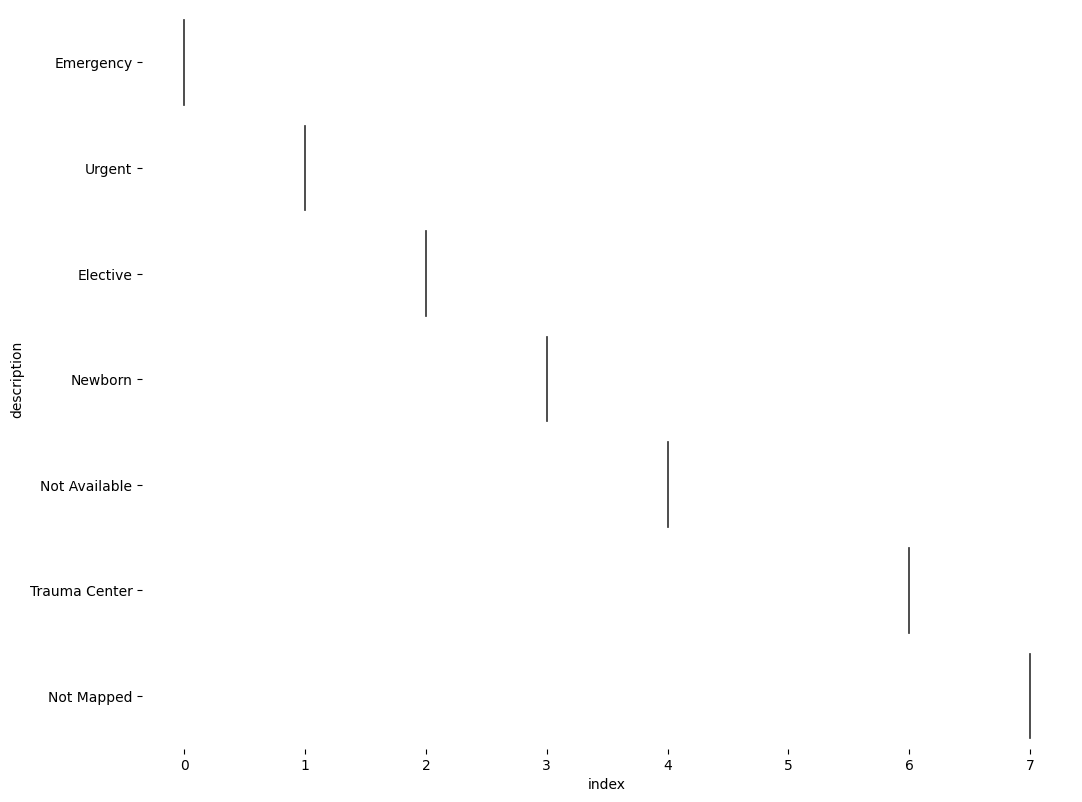

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

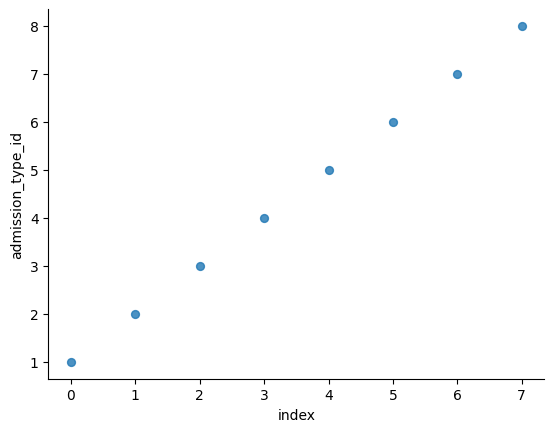

In [ ]:
from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='admission_type_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

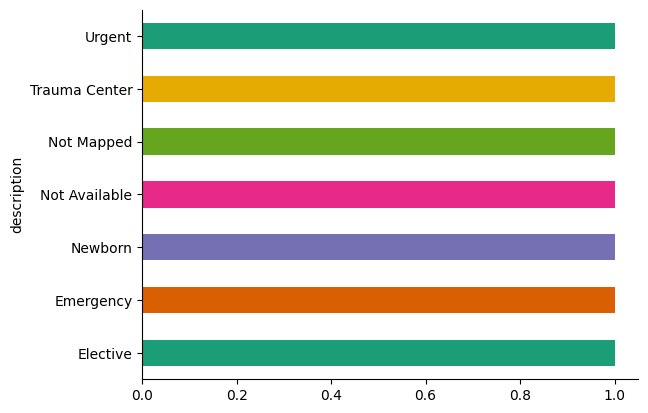

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

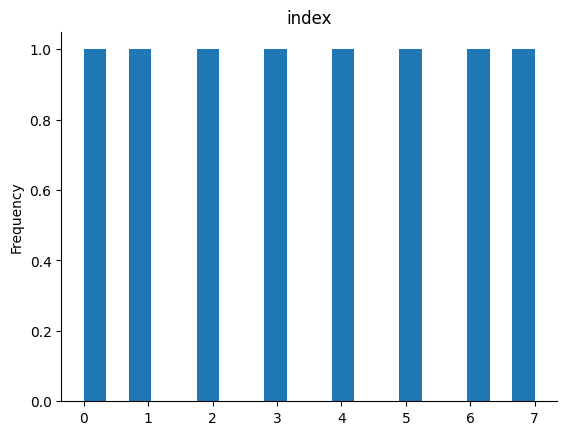

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
discharge_disposition_df

discharge_disposition_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                          9   
9                         10   
10                        11   
11                        12   
12                        13   
13                        14   
14                        15   
15                        16   
16                        17   
17                        18   
18                        19   
19                        20   
20                        21   
21                        22   
22                        23   
23                        24   
24                        25   
25                        26   
26                        30   
27                        27   
28                        28   

                                          description  
0                                  Discharged to home  
1   Discharged/transferred to another short term h...  
2                       Discharged/transferred to SNF  
3                       Discharged/transferred to ICF  
4   Discharged/transferred to another type of inpa...  
5   Discharged/transferred to home with home healt...  
6                                            Left AMA  
7   Discharged/transferred to home under care of H...  
8           Admitted as an inpatient to this hospital  
9   Neonate discharged to another hospital for neo...  
10                                            Expired  
11  Still patient or expected to return for outpat...  
12                                     Hospice / home  
13                         Hospice / medical facility  
14  Discharged/transferred within this institution...  
15  Discharged/transferred/referred another instit...  
16  Discharged/transferred/referred to this instit...  
17                                                NaN  
18           Expired at home. Medicaid only, hospice.  
19  Expired in a medical facility. Medicaid only, ...  
20    Expired, place unknown. Medicaid only, hospice.  
21  Discharged/transferred to another rehab fac in...  
22  Discharged/transferred to a long term care hos...  
23  Discharged/transferred to a nursing facility c...  
24                                         Not Mapped  
25                                    Unknown/Invalid  
26  Discharged/transferred to another Type of Heal...  
27  Discharged/transferred to a federal health car...  
28  Discharged/transferred/referred to a psychiatr...

from matplotlib import pyplot as plt
discharge_disposition_df['discharge_disposition_id'].plot(kind='hist', bins=20, title='discharge_disposition_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
discharge_disposition_df['discharge_disposition_id'].plot(kind='line', figsize=(8, 4), title='discharge_disposition_id')
plt.gca().spines[['top', 'right']].set_visible(False)

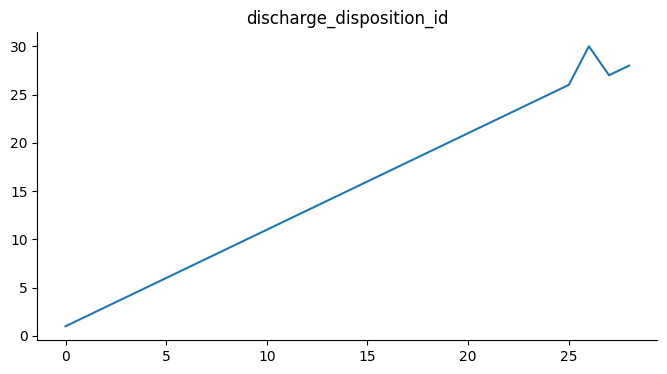

In [ ]:
from matplotlib import pyplot as plt
discharge_disposition_df['discharge_disposition_id'].plot(kind='line', figsize=(8, 4), title='discharge_disposition_id')
plt.gca().spines[['top', 'right']].set_visible(False)

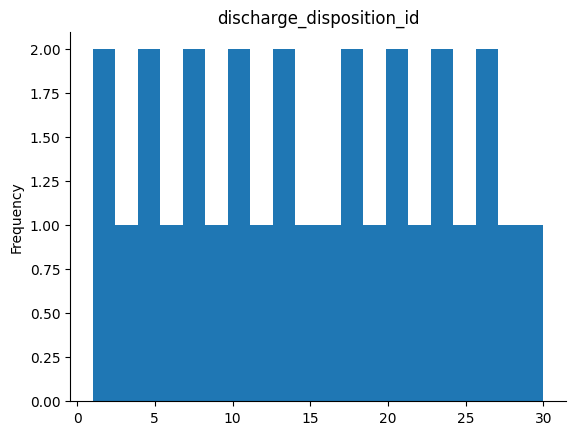

In [ ]:
from matplotlib import pyplot as plt
discharge_disposition_df['discharge_disposition_id'].plot(kind='hist', bins=20, title='discharge_disposition_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
admission_source_df


admission_source_id                                        description
0                     1                                 Physician Referral
1                     2                                    Clinic Referral
2                     3                                       HMO Referral
3                     4                           Transfer from a hospital
4                     5     Transfer from a Skilled Nursing Facility (SNF)
5                     6         Transfer from another health care facility
6                     7                                     Emergency Room
7                     8                              Court/Law Enforcement
8                     9                                      Not Available
9                    10              Transfer from critial access hospital
10                   11                                    Normal Delivery
11                   12                                 Premature Delivery
12                   13                                          Sick Baby
13                   14                                   Extramural Birth
14                   15                                      Not Available
15                   17                                                NaN
16                   18           Transfer From Another Home Health Agency
17                   19             Readmission to Same Home Health Agency
18                   20                                         Not Mapped
19                   21                                    Unknown/Invalid
20                   22   Transfer from hospital inpt/same fac reslt in...
21                   23                          Born inside this hospital
22                   24                         Born outside this hospital
23                   25            Transfer from Ambulatory Surgery Center
24                   26                              Transfer from Hospice

from matplotlib import pyplot as plt
admission_source_df['admission_source_id'].plot(kind='hist', bins=20, title='admission_source_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['admission_source_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'admission_source_id'}, axis=1)
              .sort_values('admission_source_id', ascending=True))
  xs = counted['admission_source_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = admission_source_df.sort_values('admission_source_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('admission_source_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
admission_source_df['admission_source_id'].plot(kind='line', figsize=(8, 4), title='admission_source_id')
plt.gca().spines[['top', 'right']].set_visible(False)

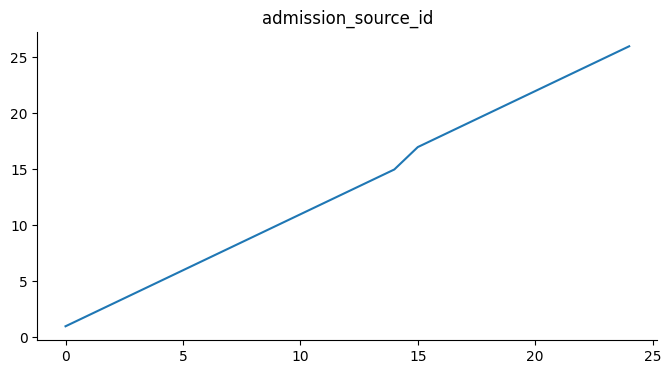

In [ ]:
from matplotlib import pyplot as plt
admission_source_df['admission_source_id'].plot(kind='line', figsize=(8, 4), title='admission_source_id')
plt.gca().spines[['top', 'right']].set_visible(False)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


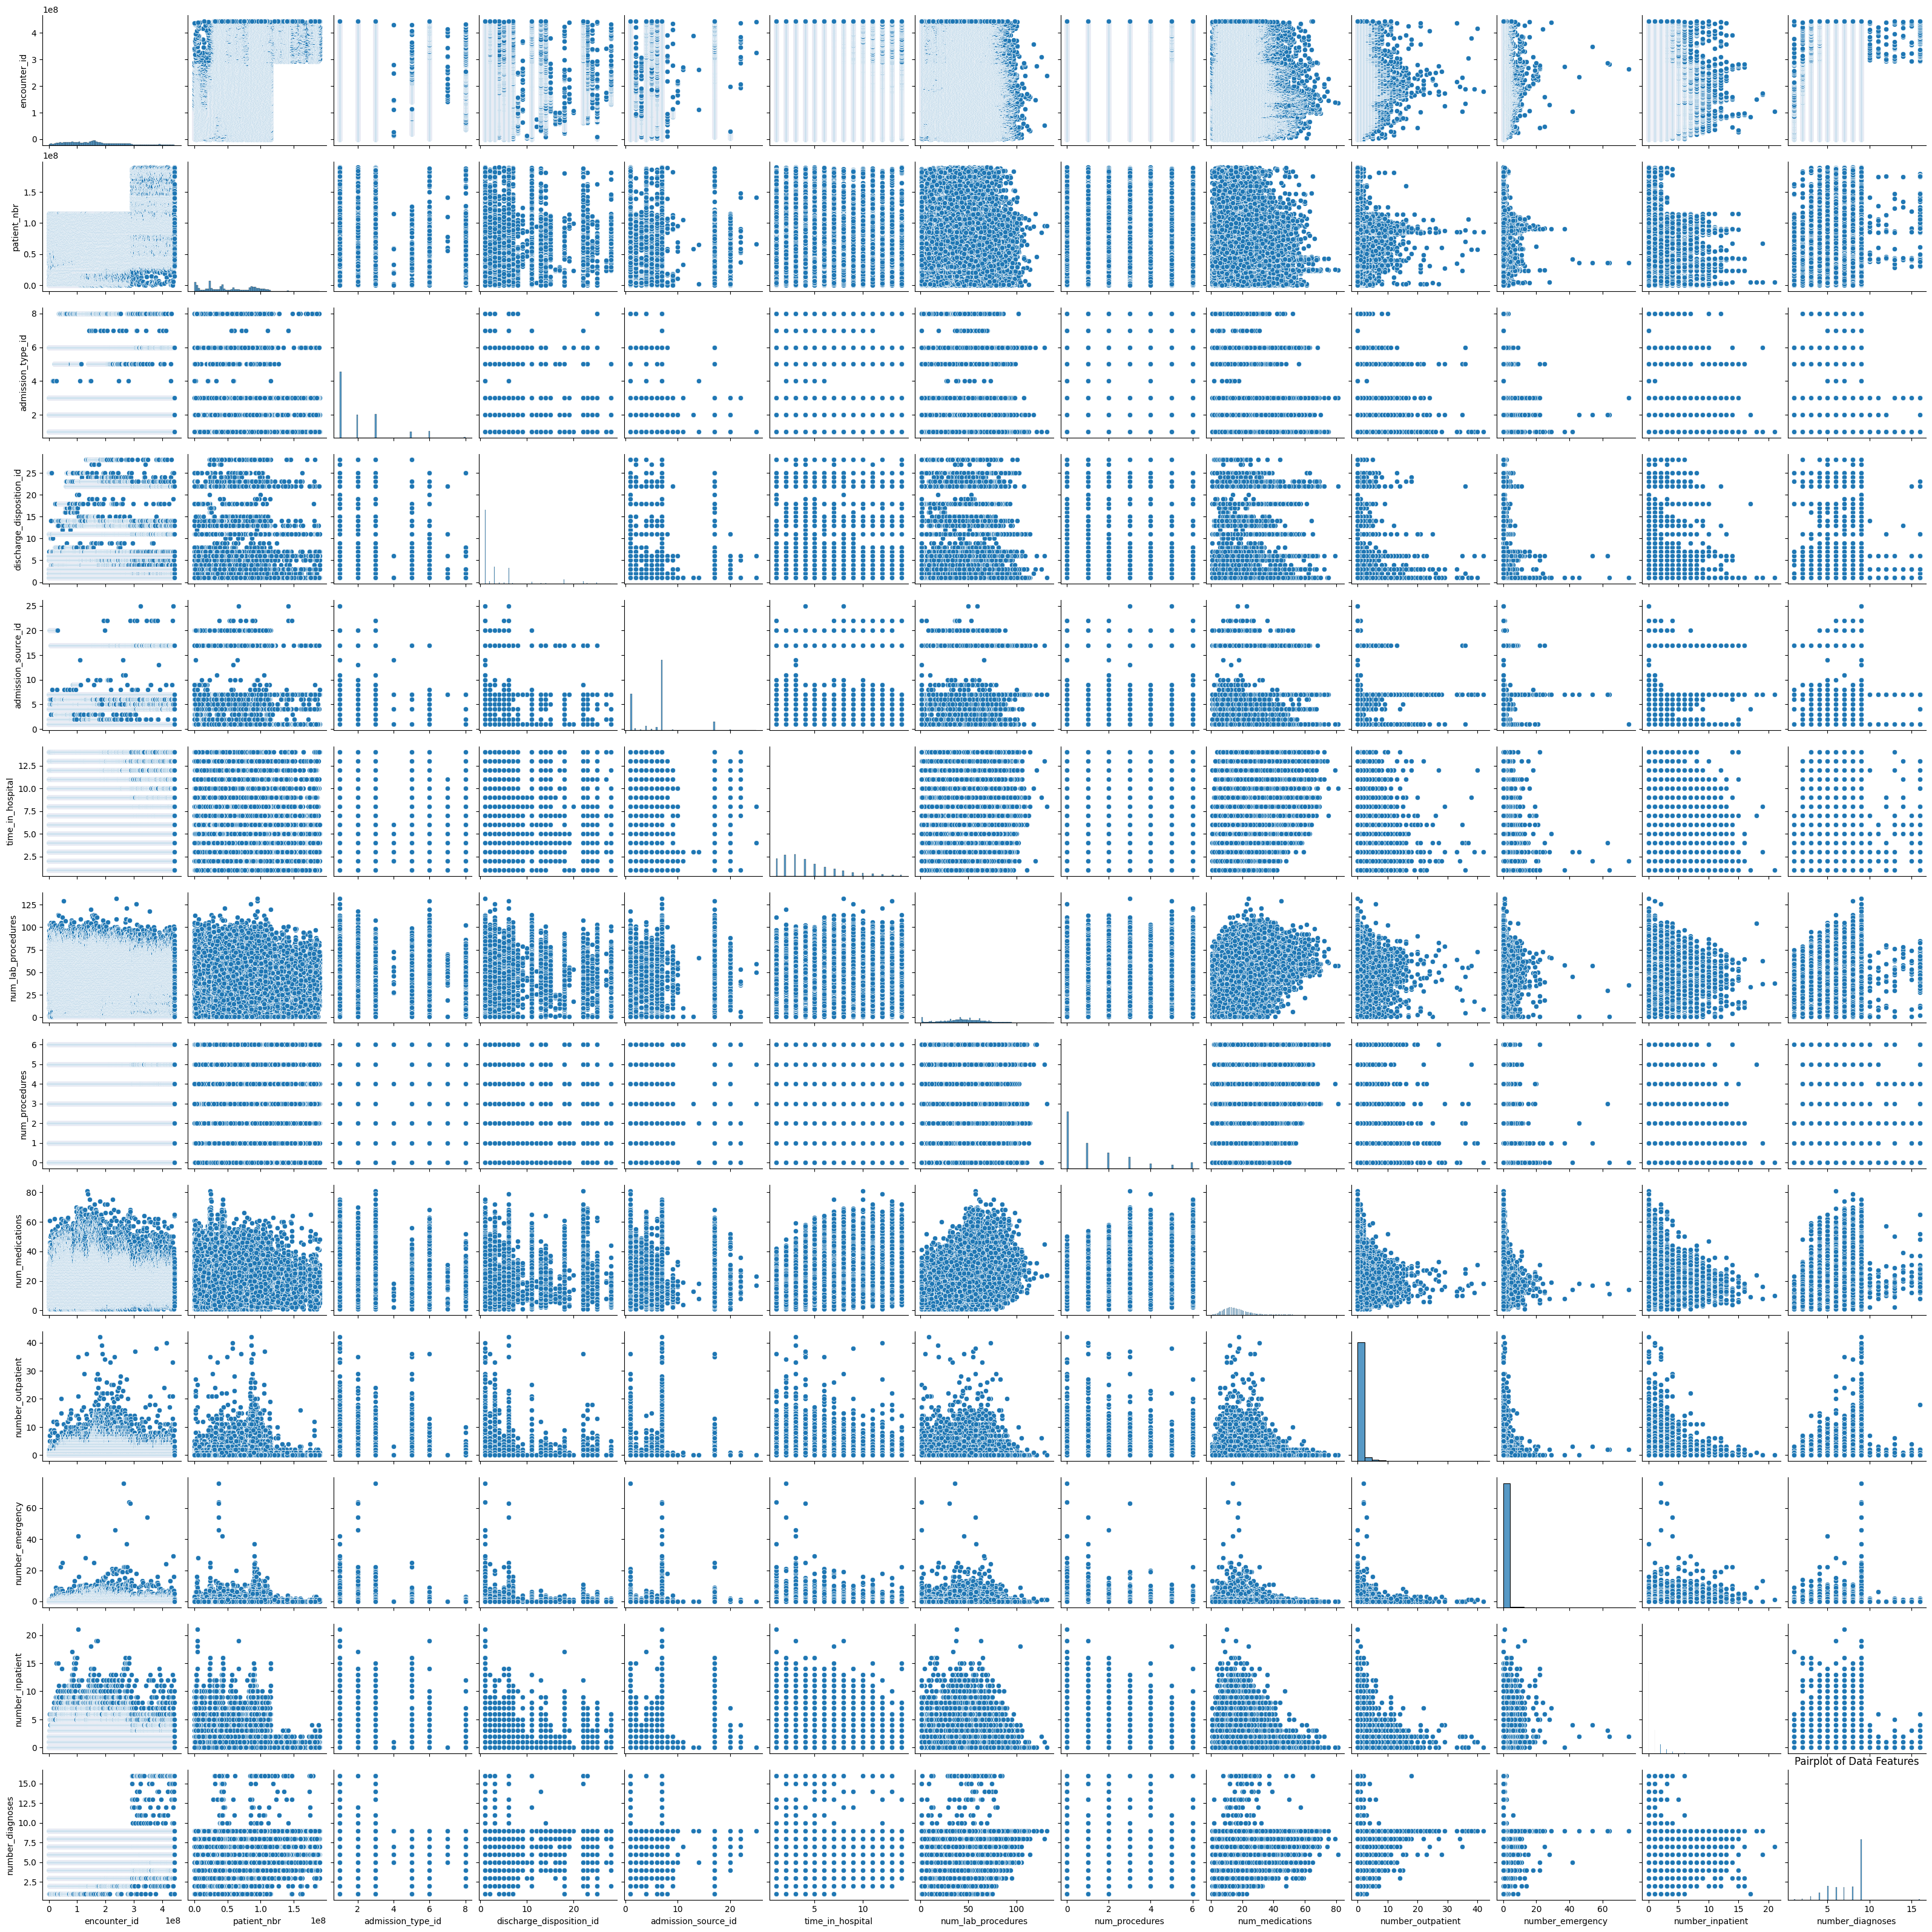

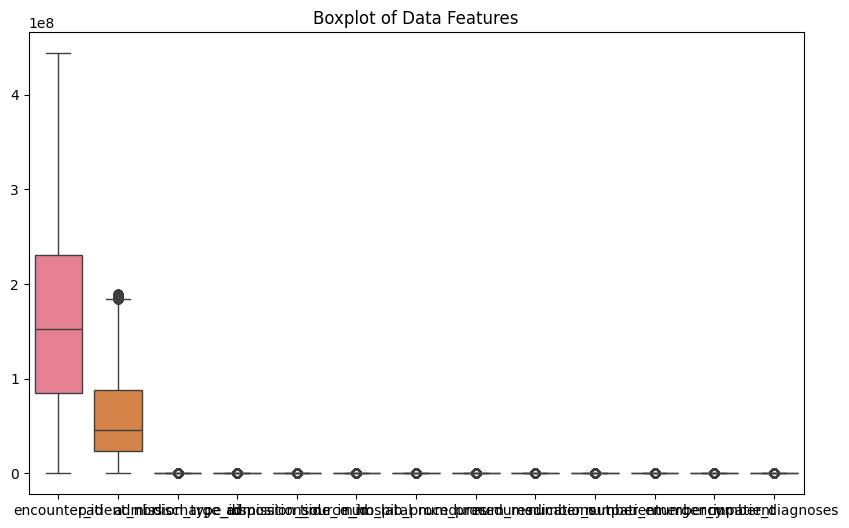

<Figure size 1000x600 with 0 Axes>

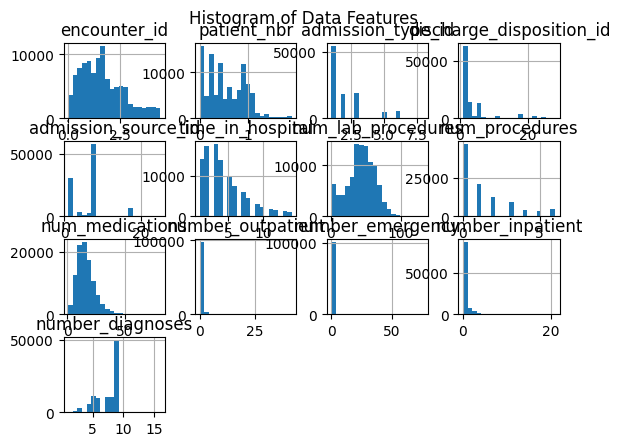

In [ ]:
# Scatter plot
sns.pairplot(diabetic_data_df)  # This will create a scatter plot matrix
plt.title('Pairplot of Data Features')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetic_data_df)
plt.title('Boxplot of Data Features')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
diabetic_data_df.hist(bins=20)
plt.suptitle('Histogram of Data Features', y=0.95)
plt.show()

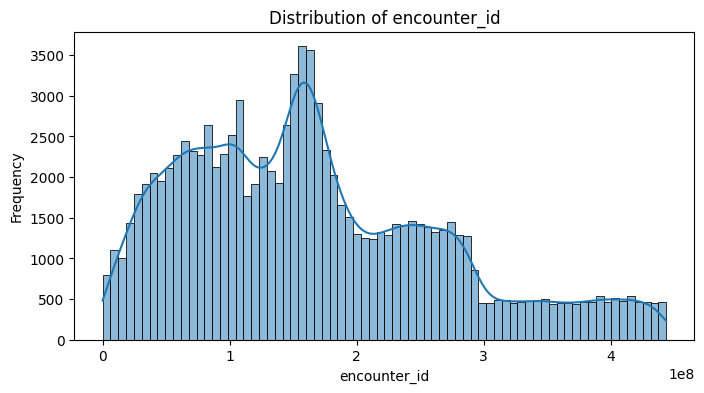

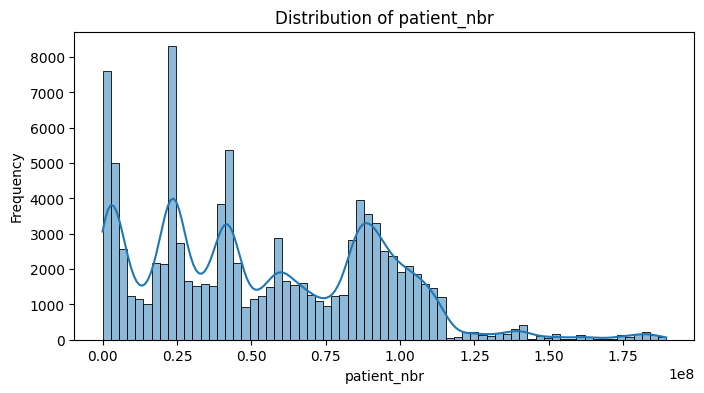

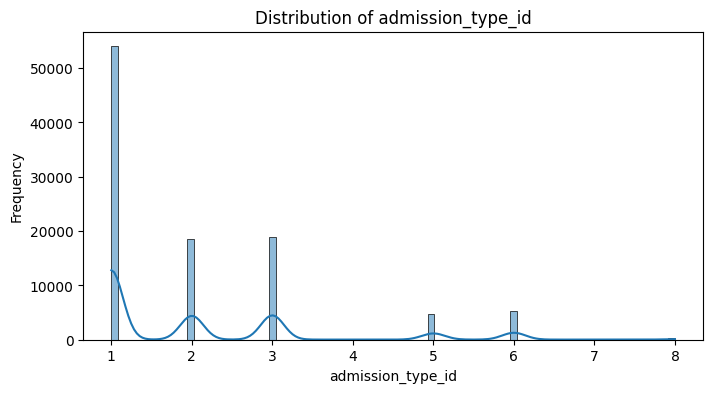

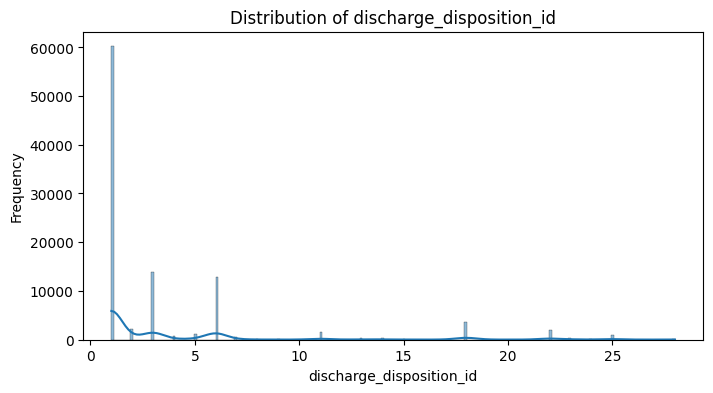

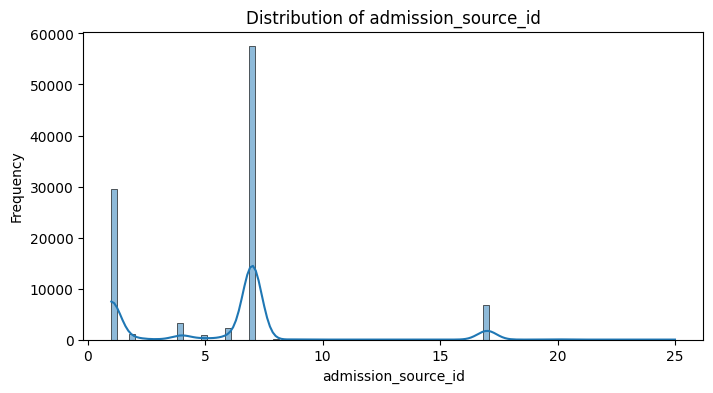

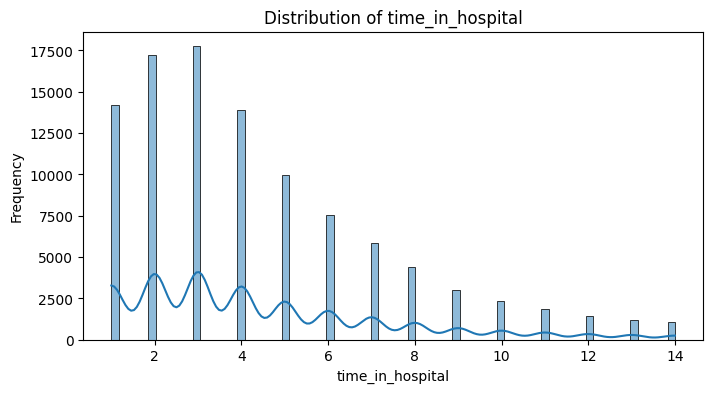

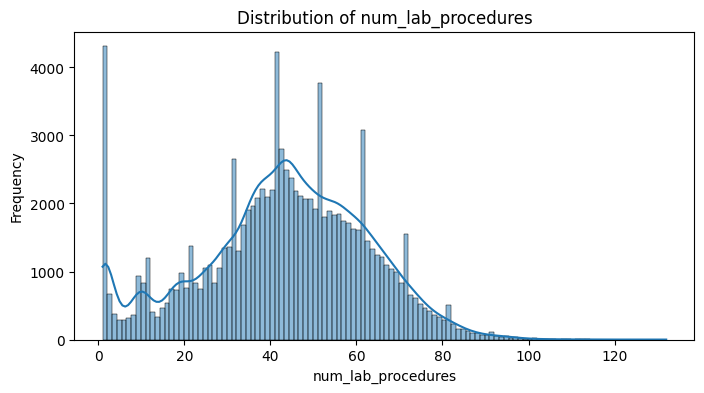

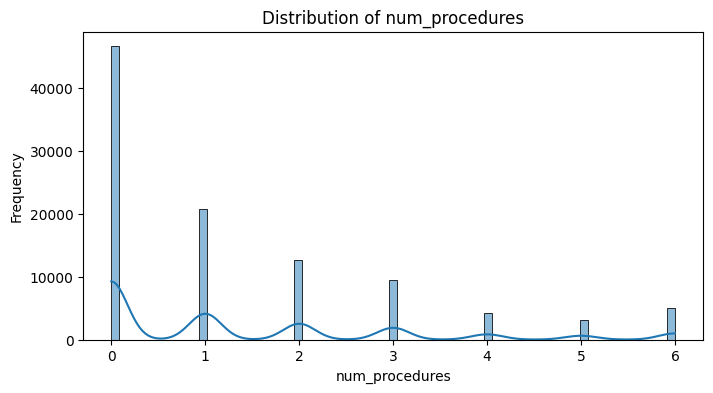

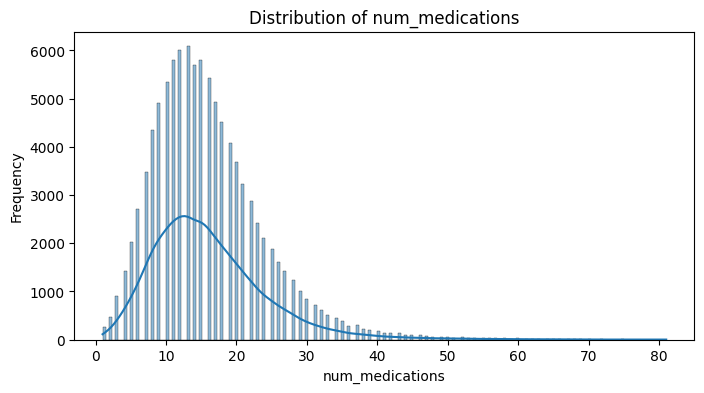

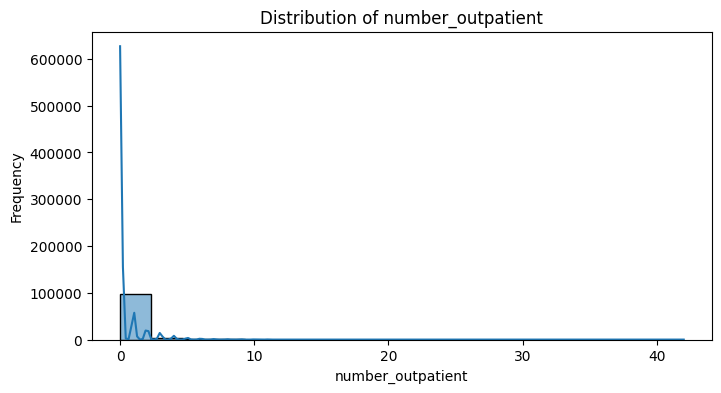

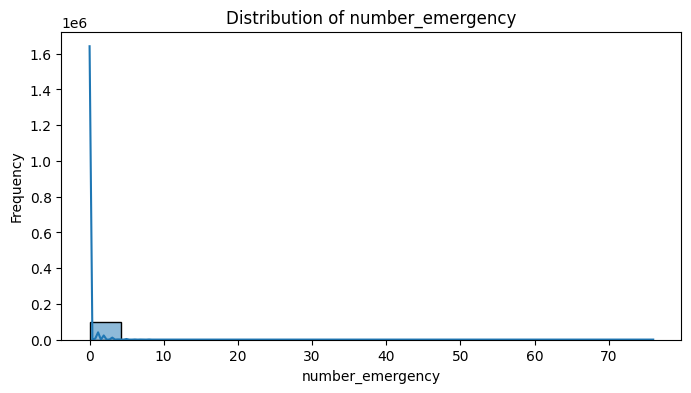

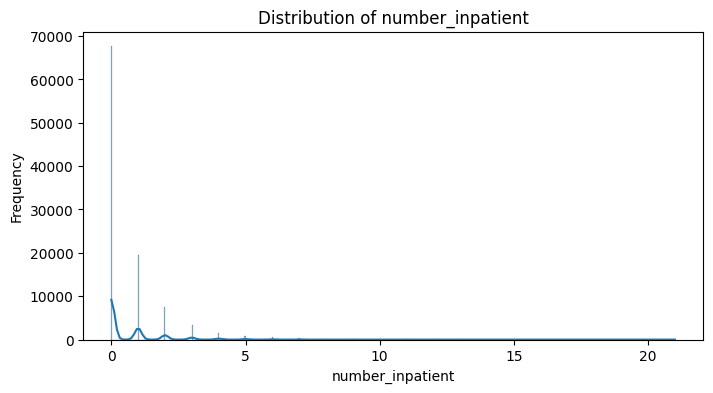

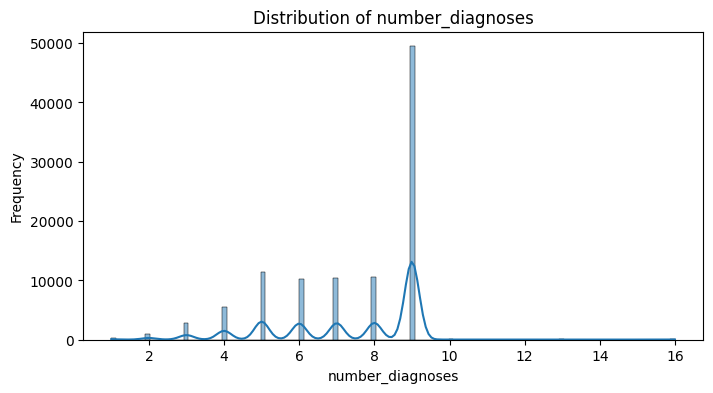

In [ ]:


# Assuming 'diabetic_data_df' is your DataFrame containing the numerical data

# Distribution plots for all numerical columns
for column in diabetic_data_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(diabetic_data_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

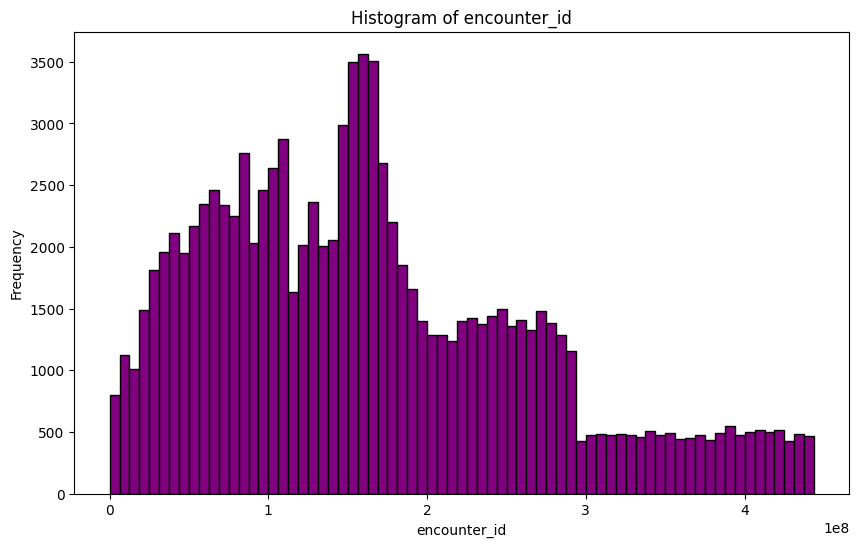

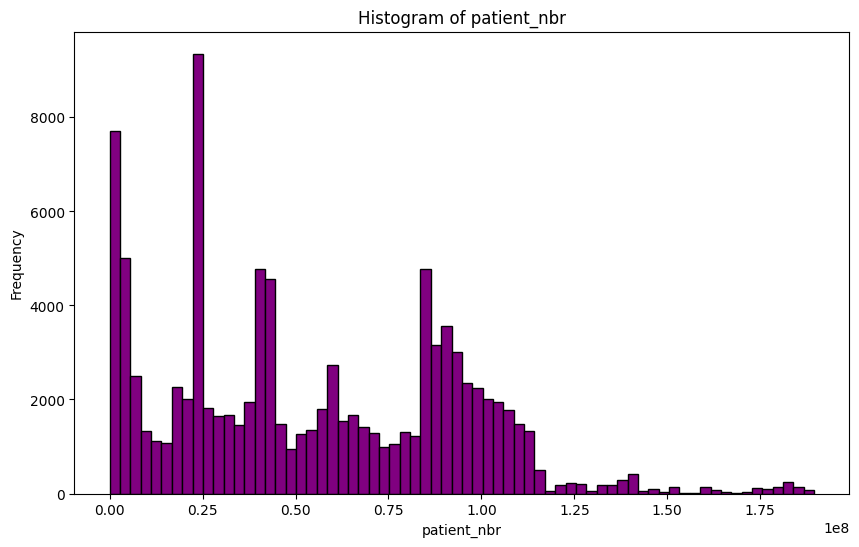

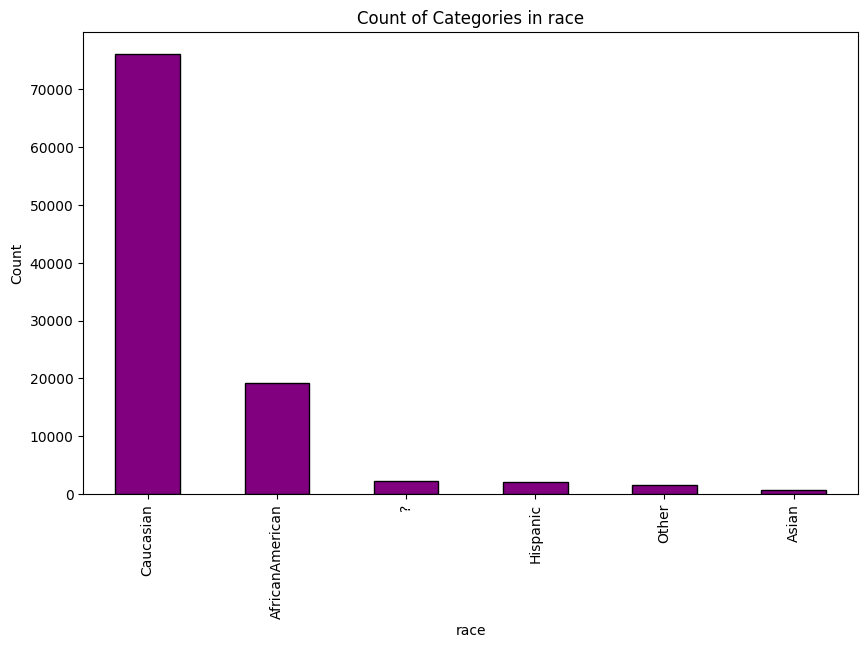

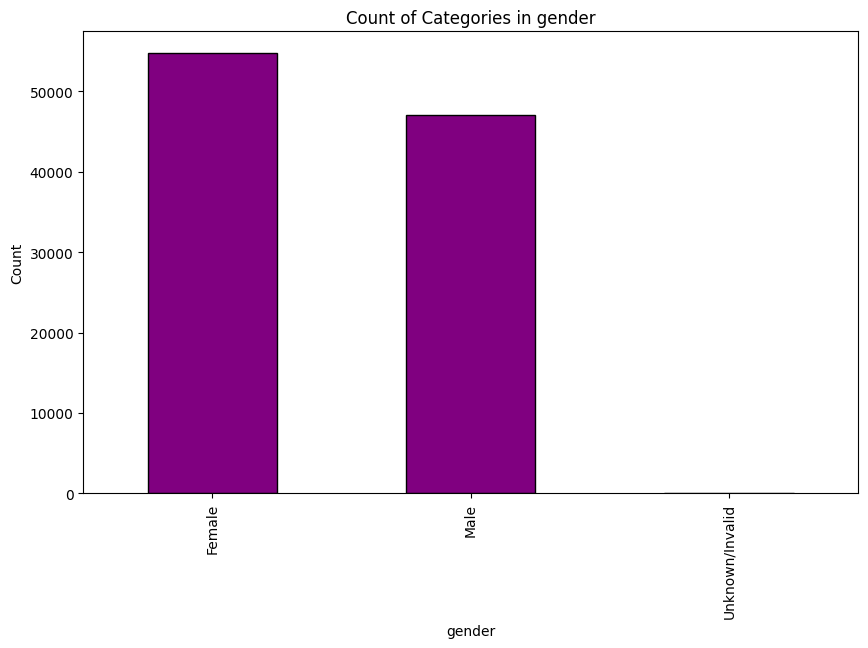

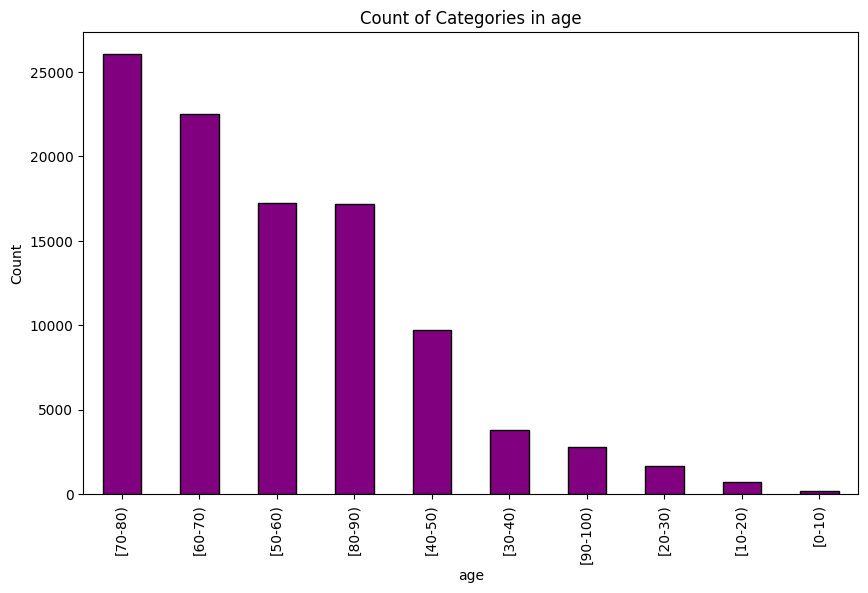

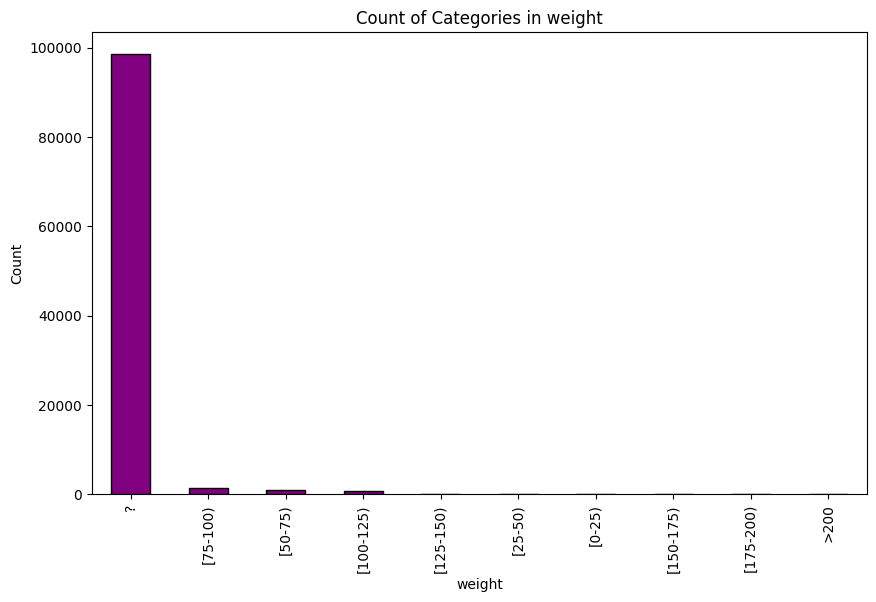

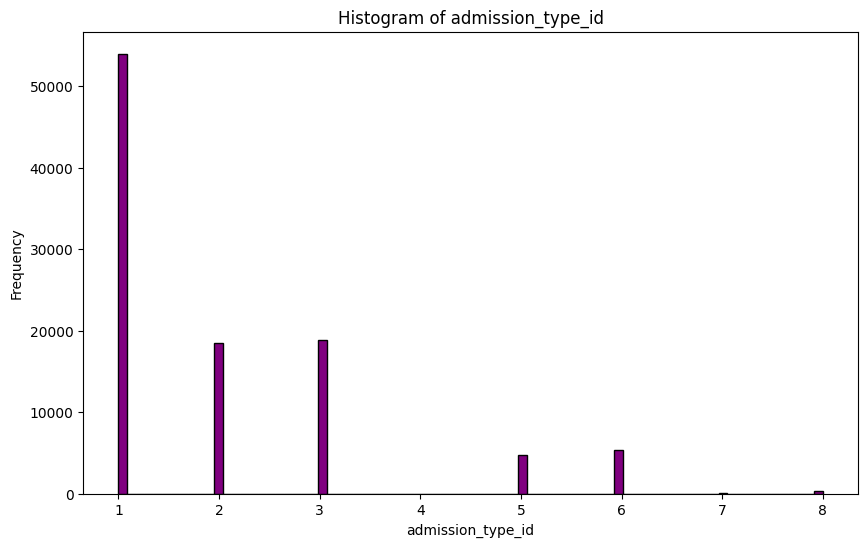

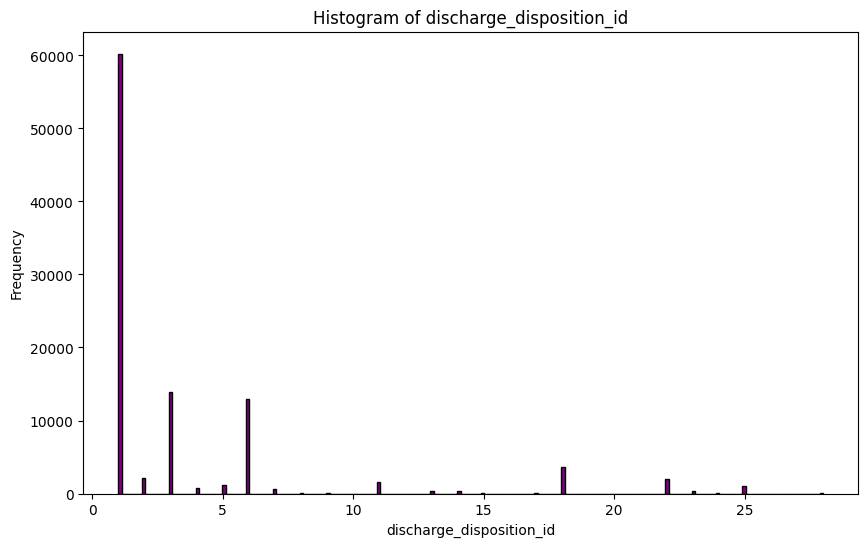

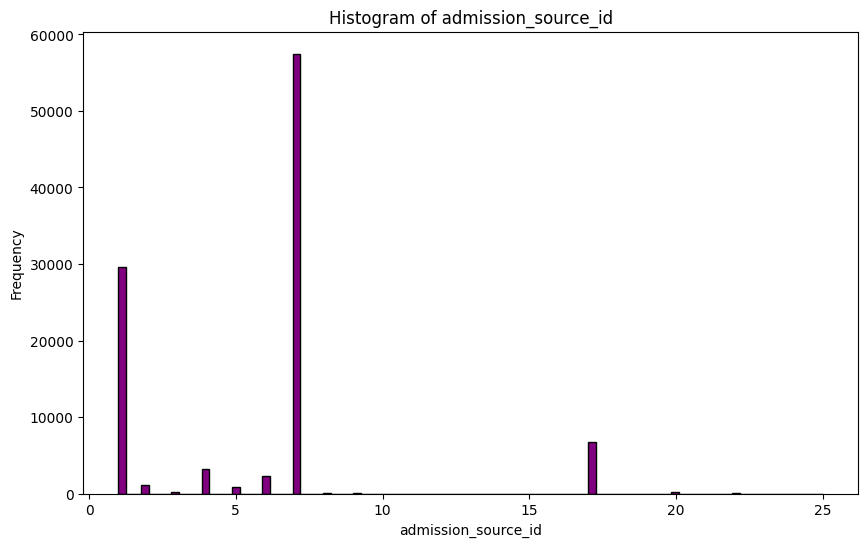

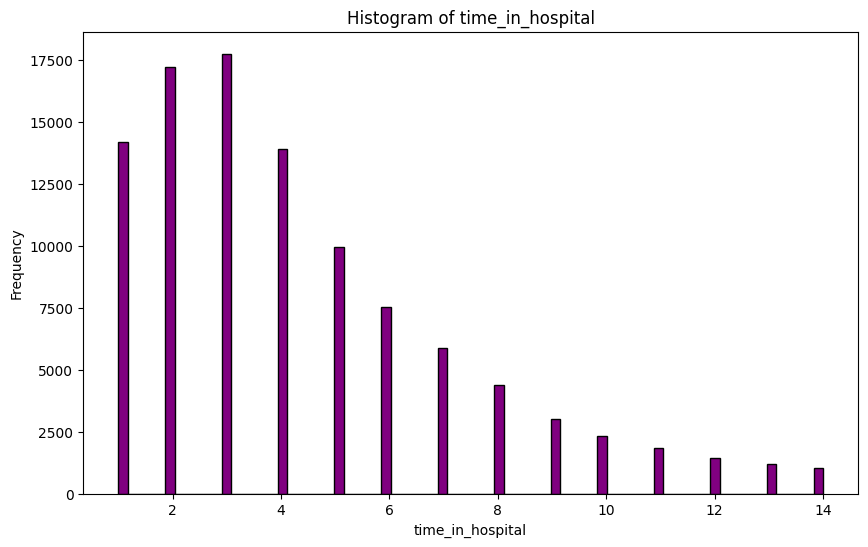

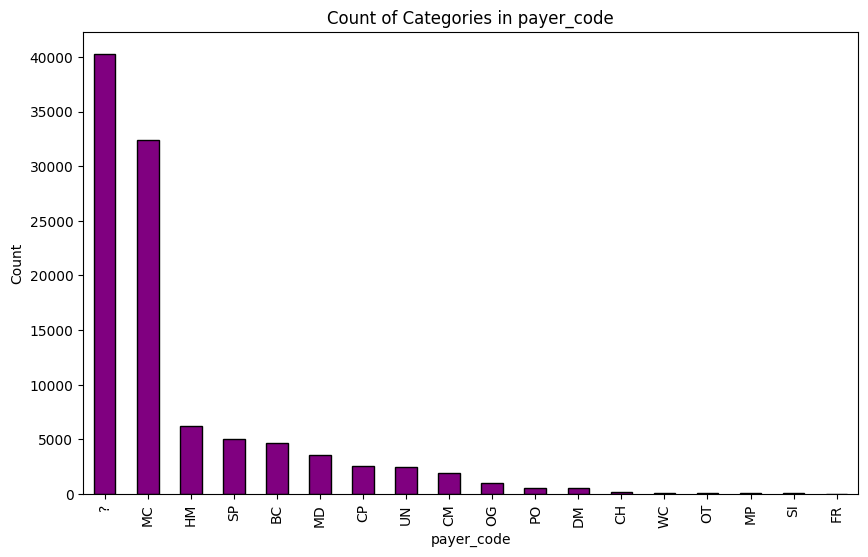

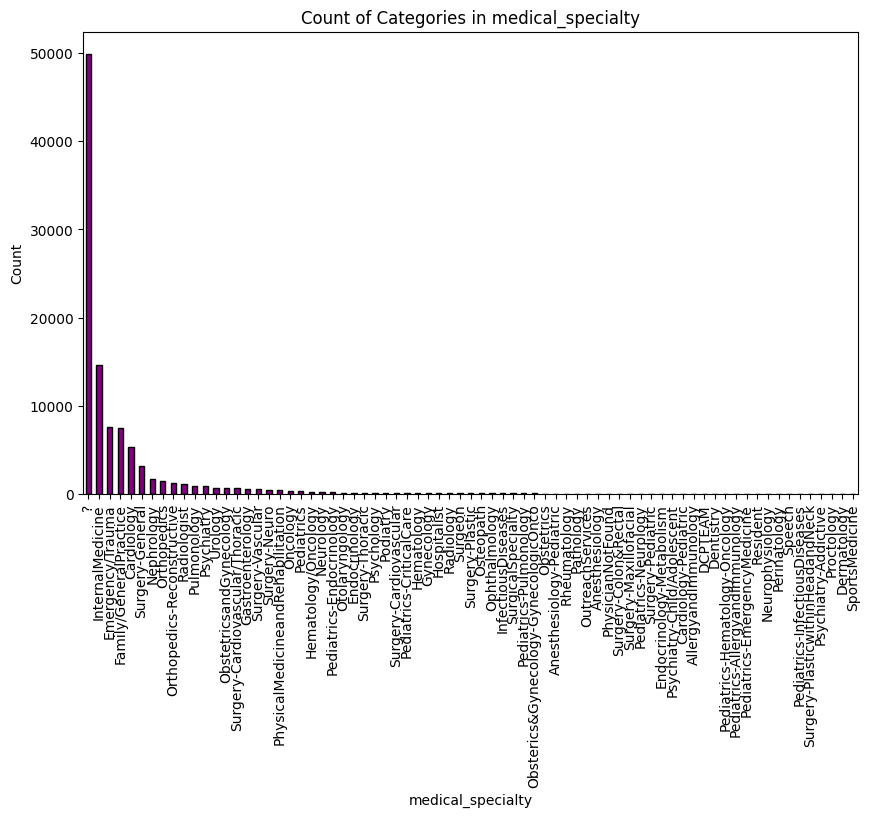

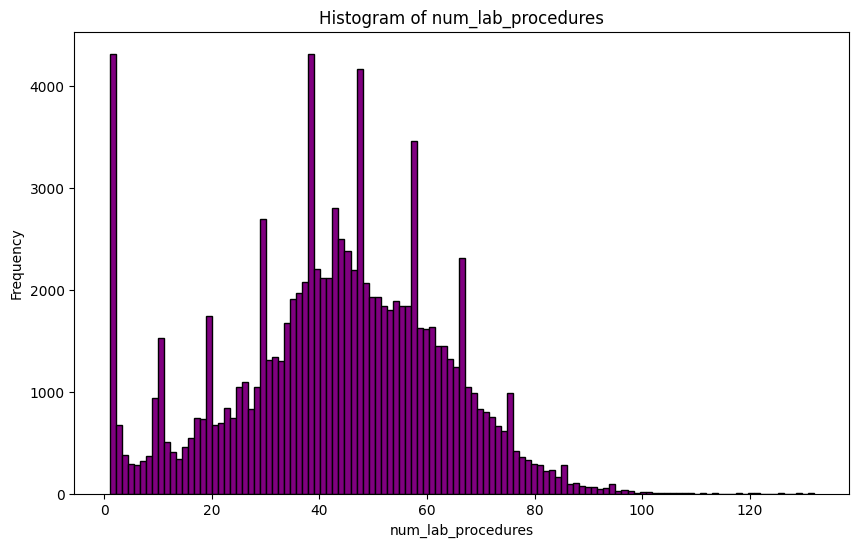

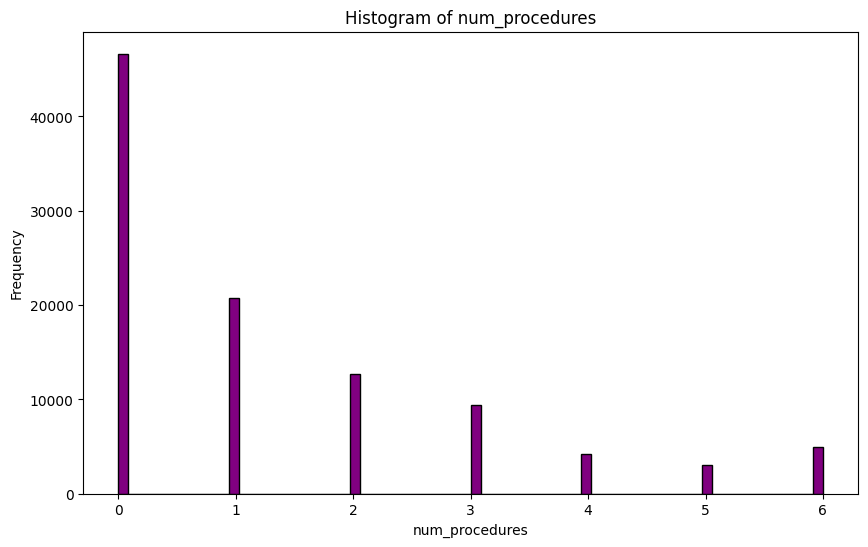

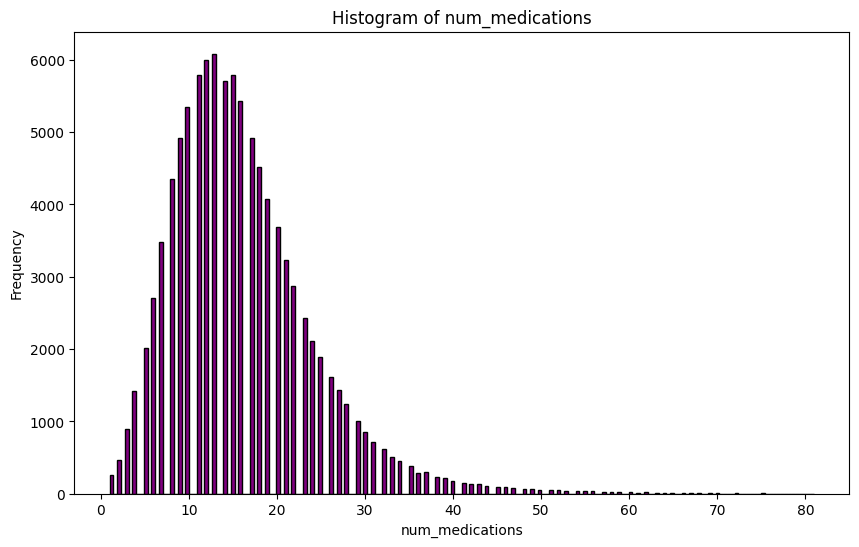

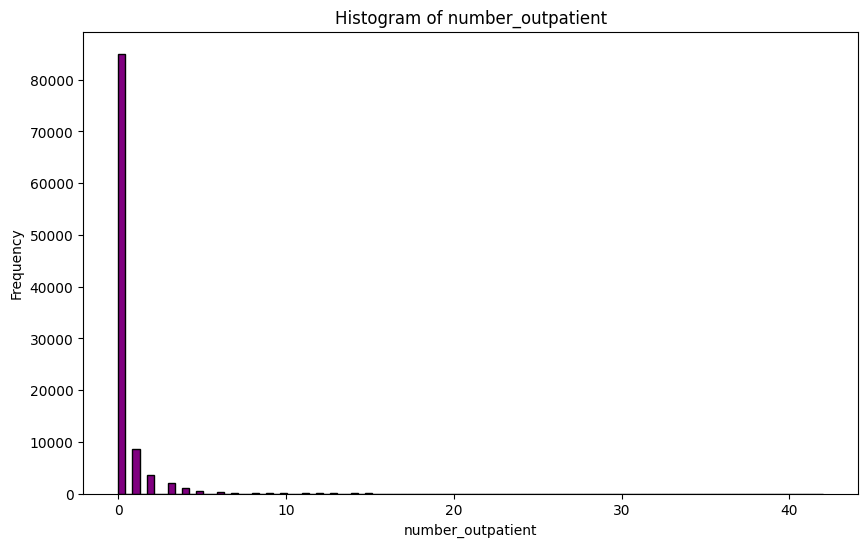

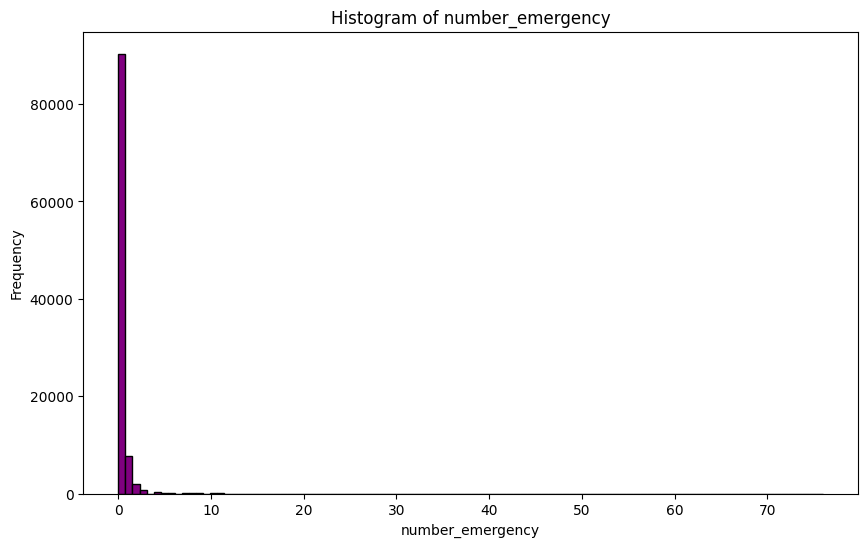

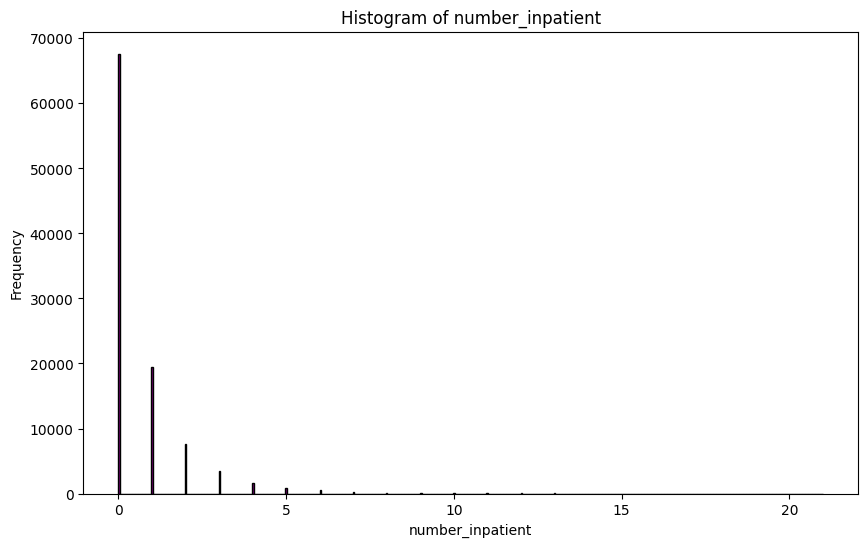

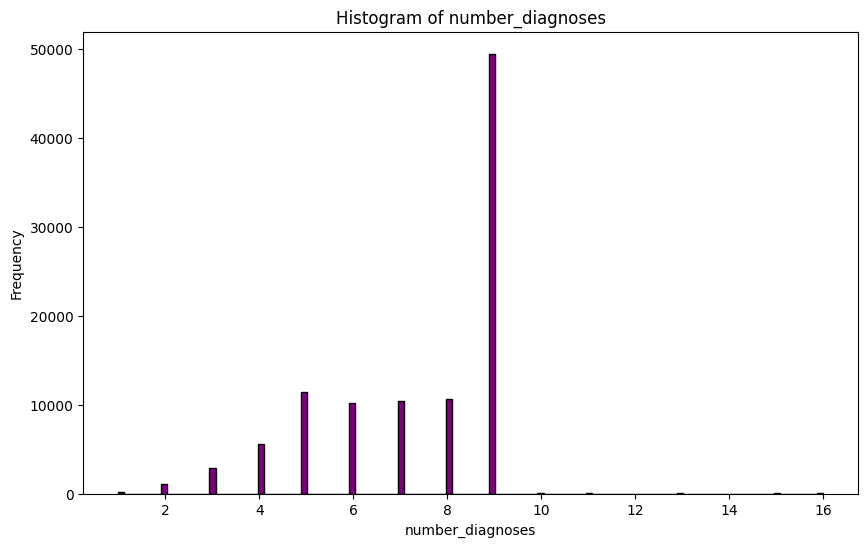

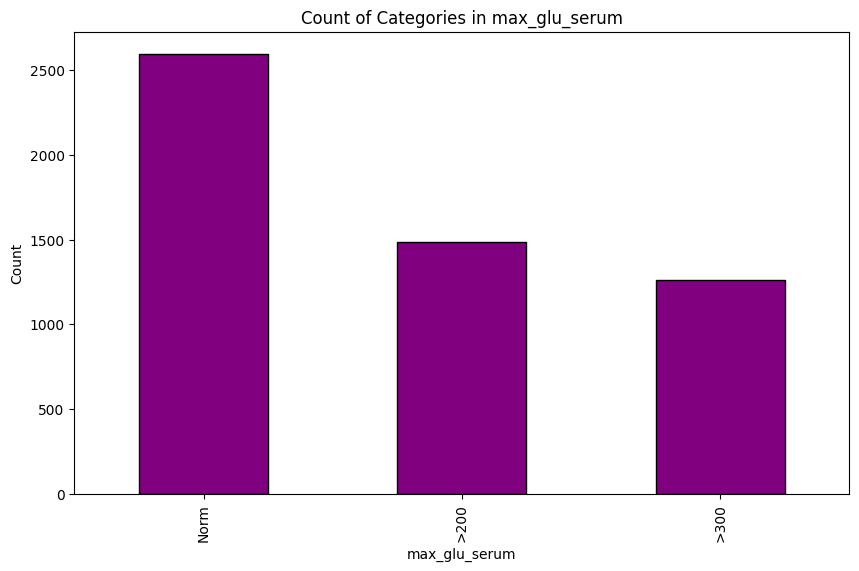

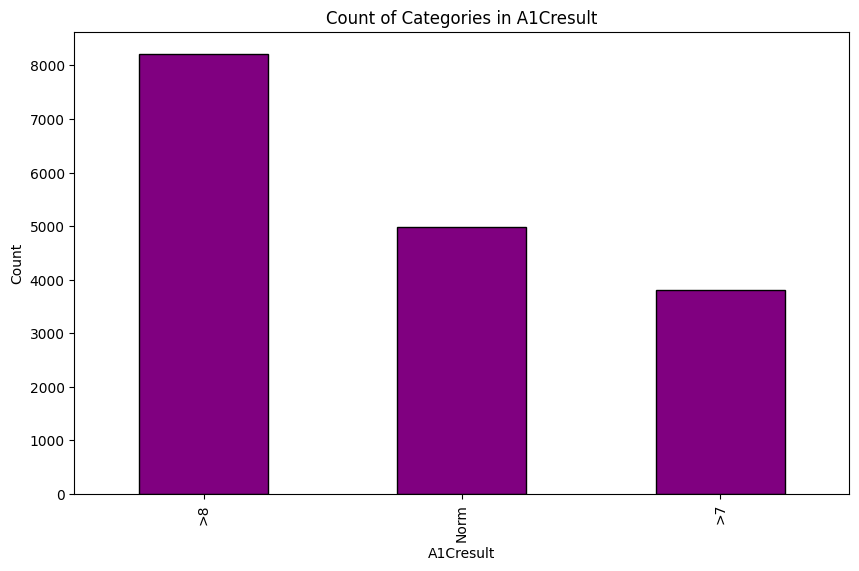

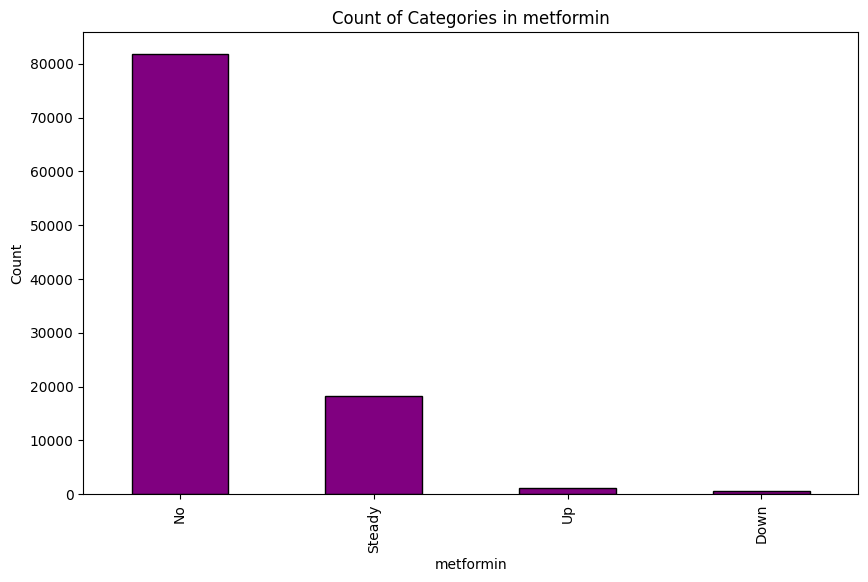

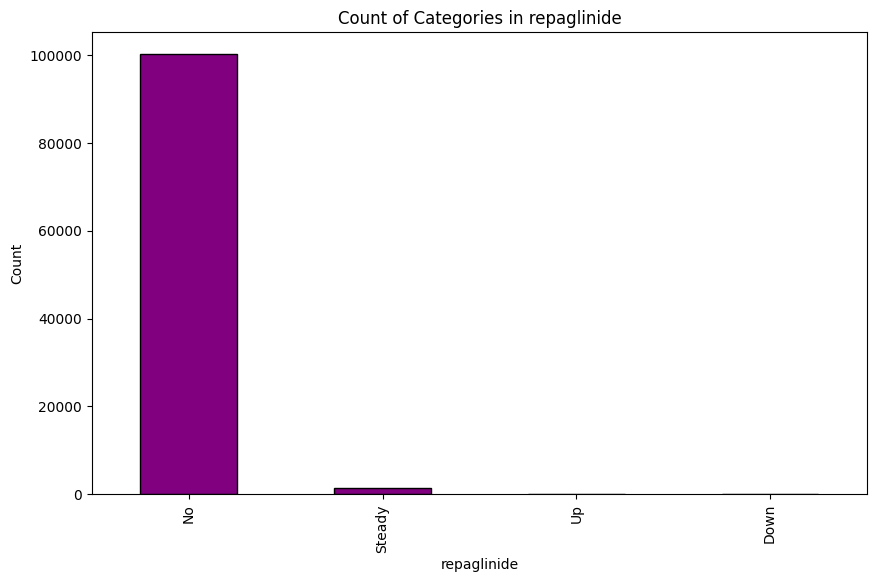

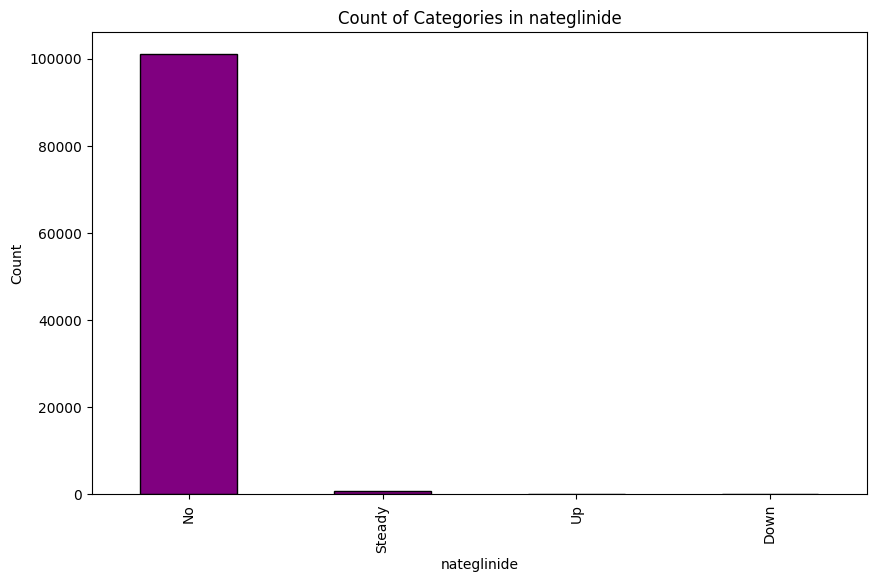

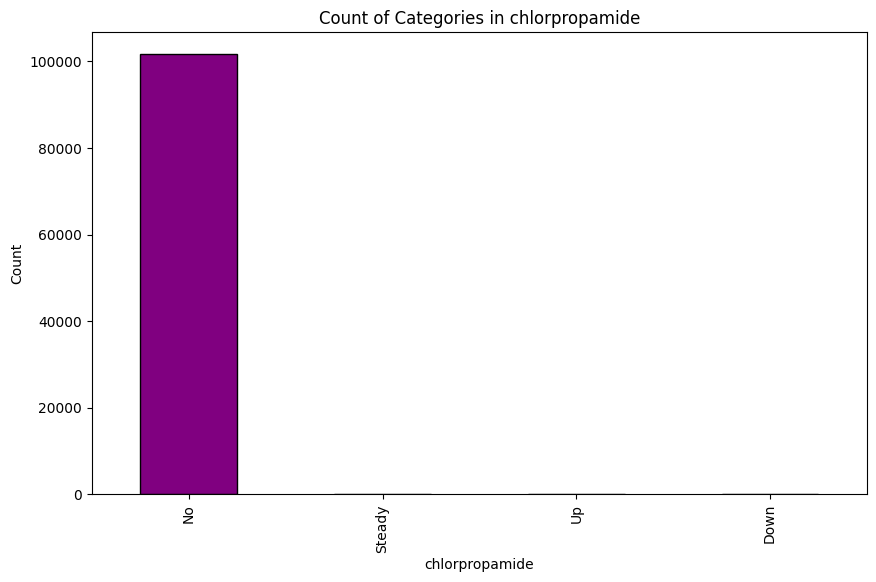

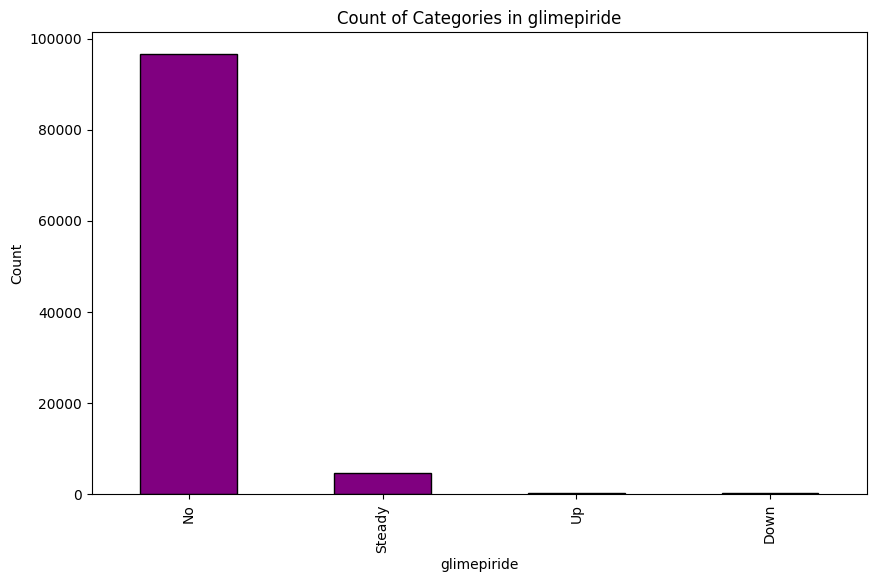

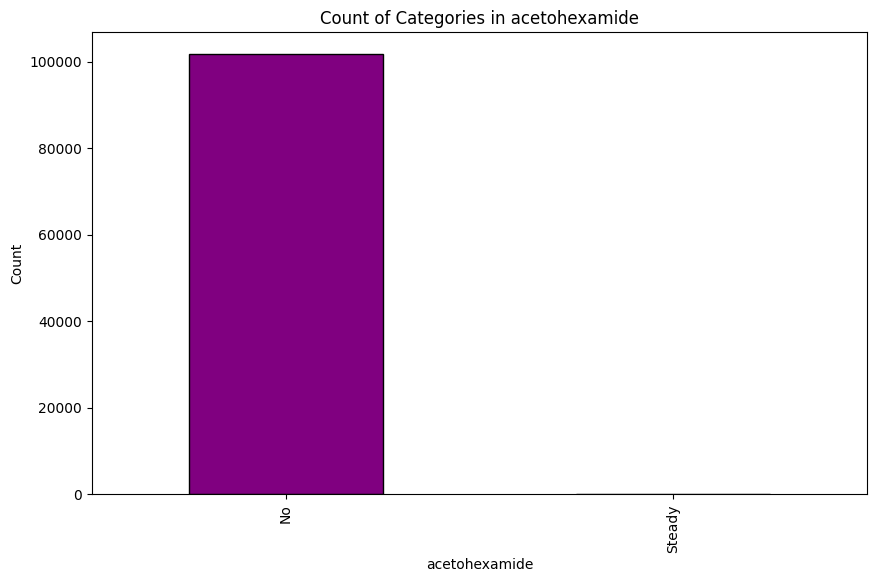

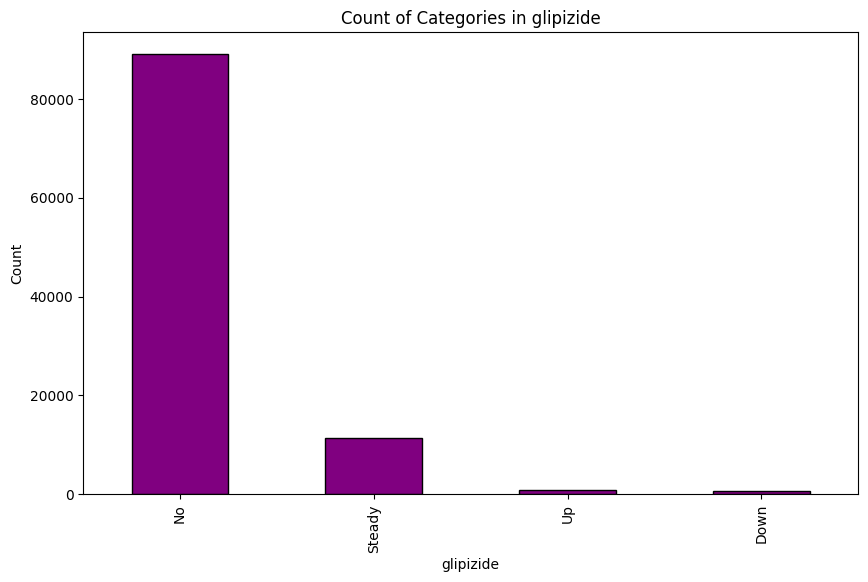

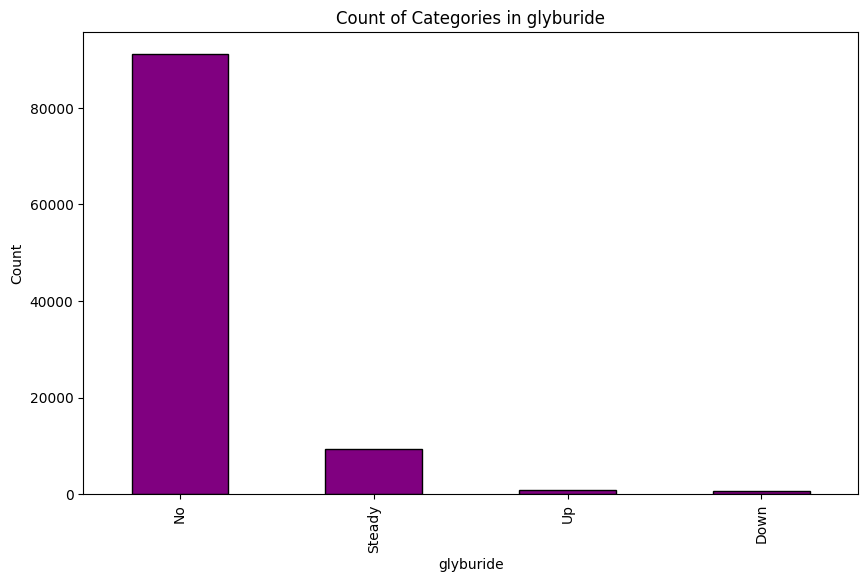

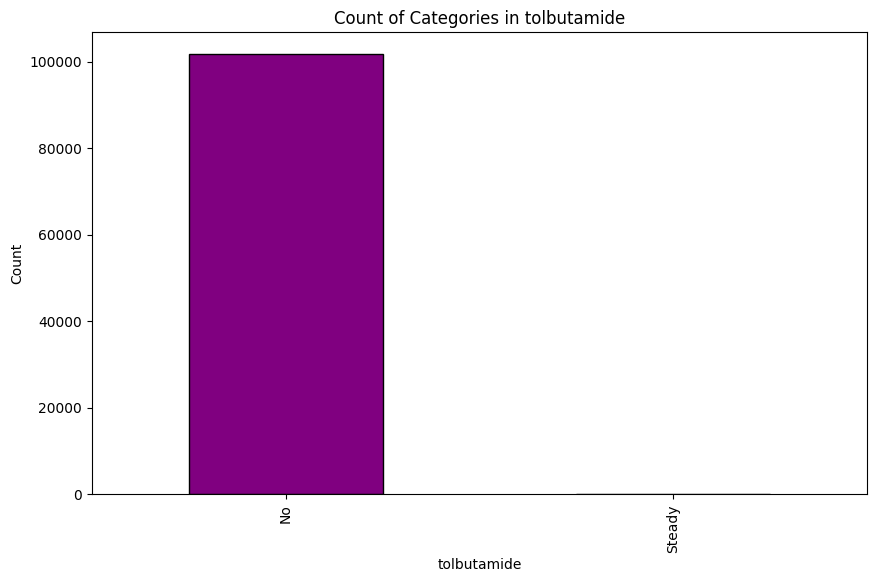

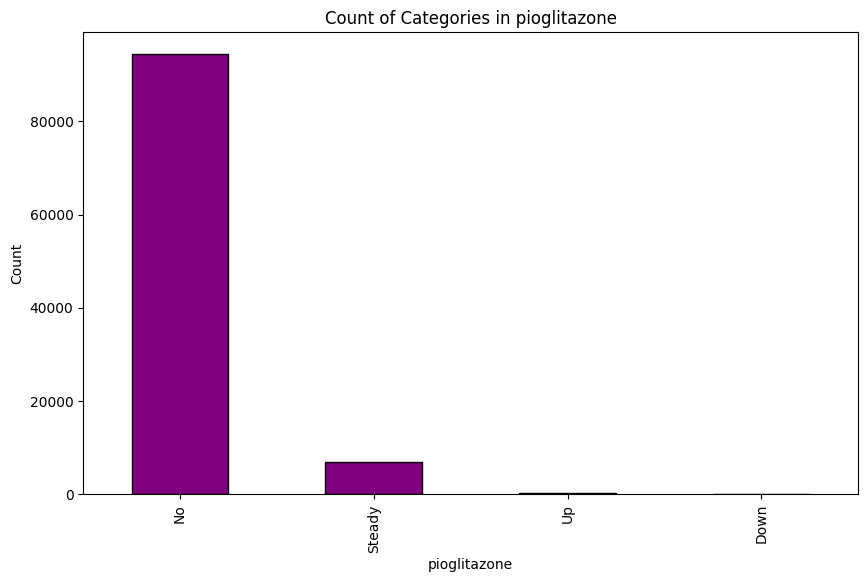

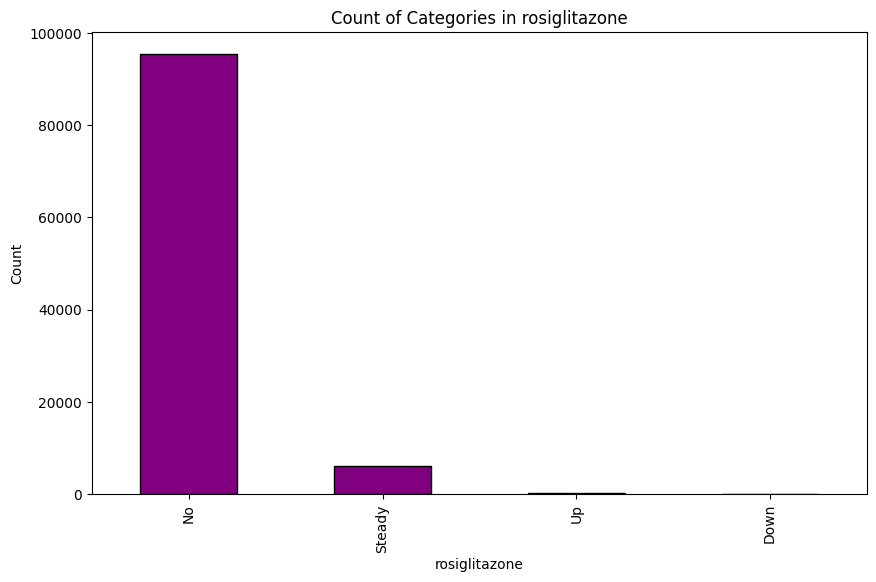

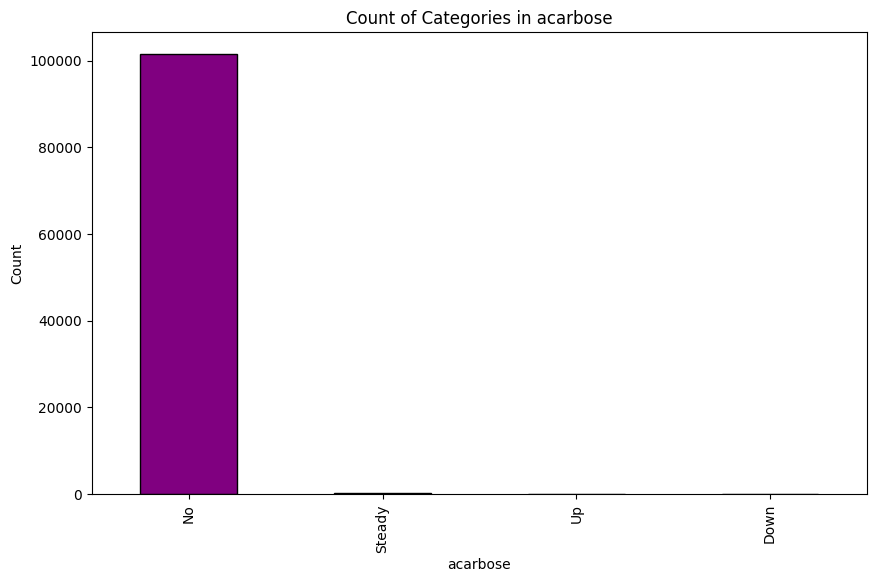

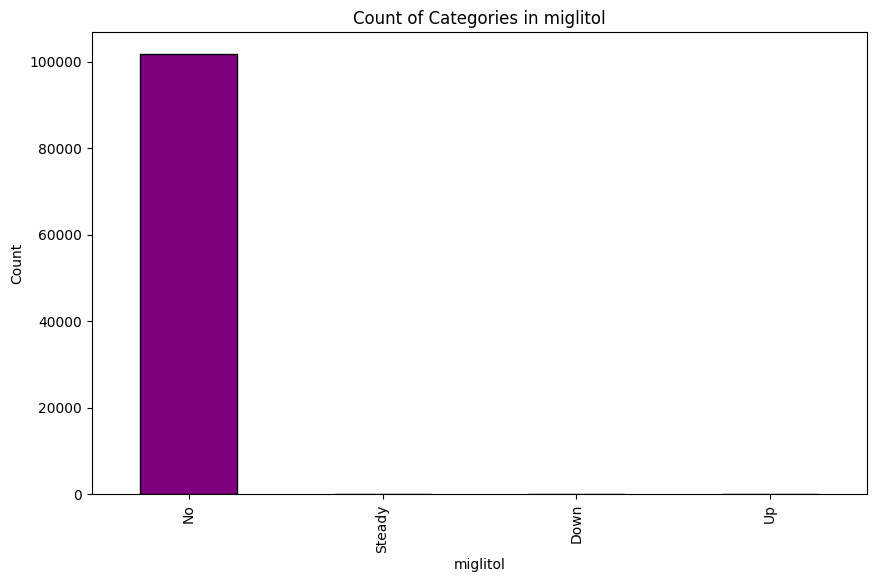

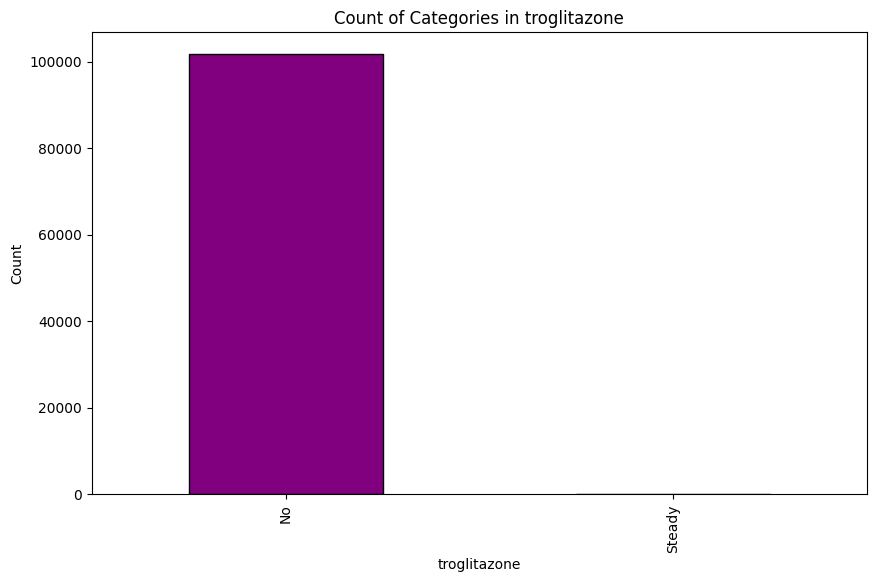

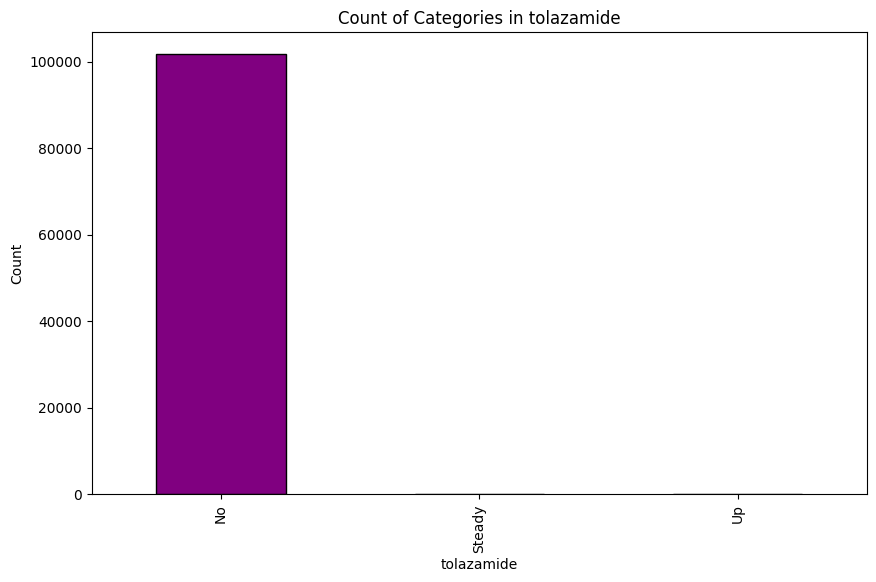

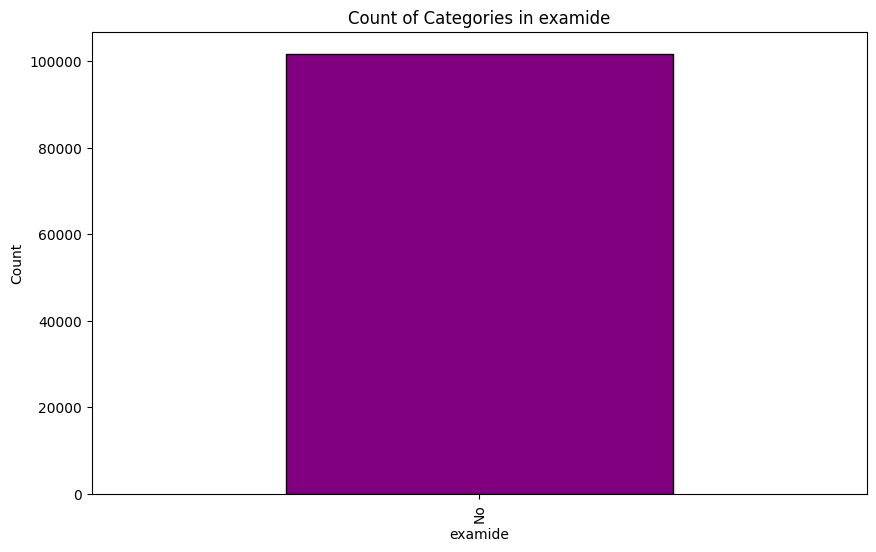

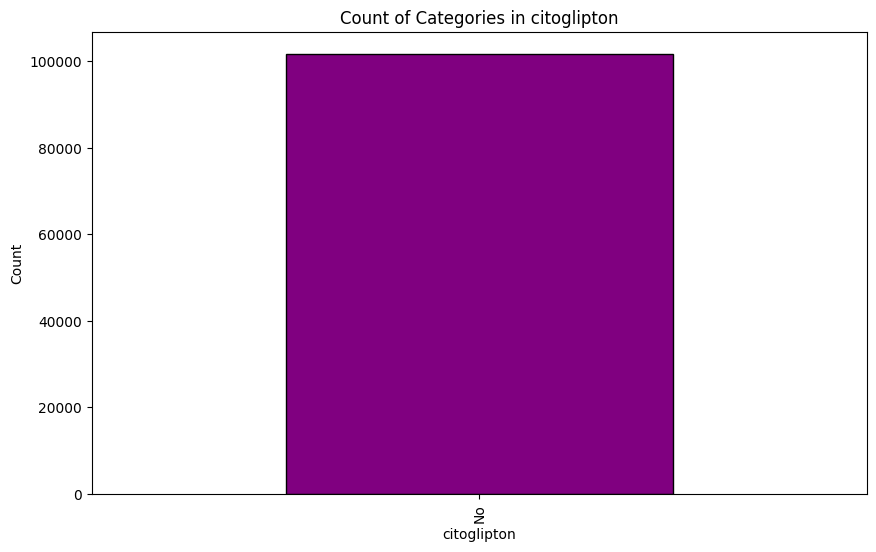

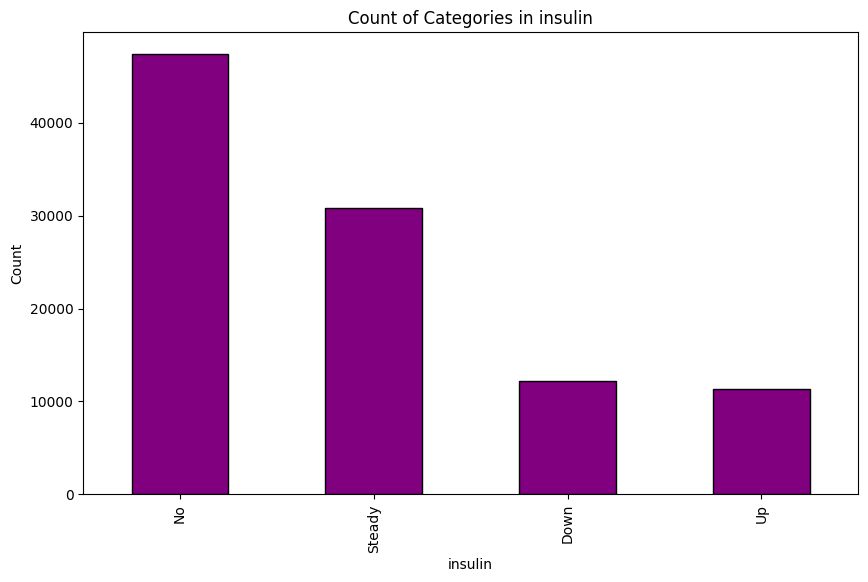

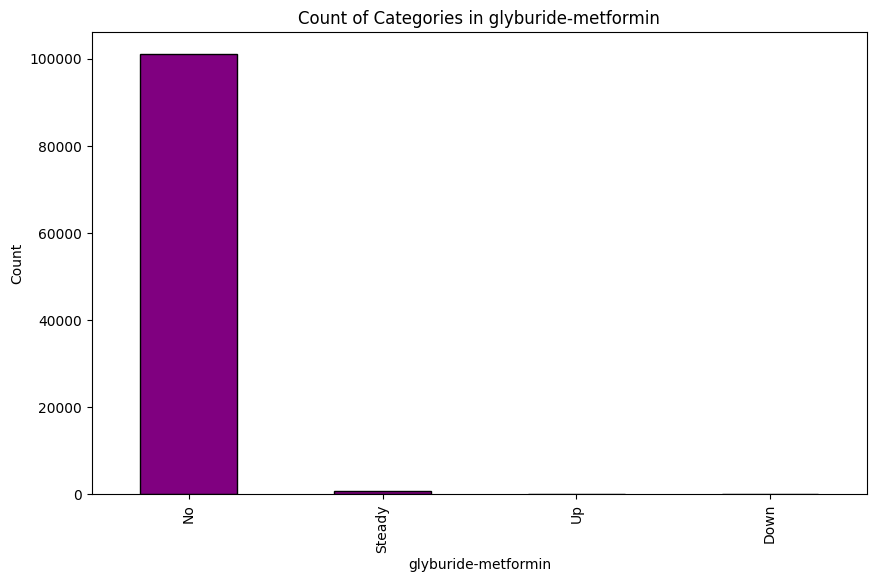

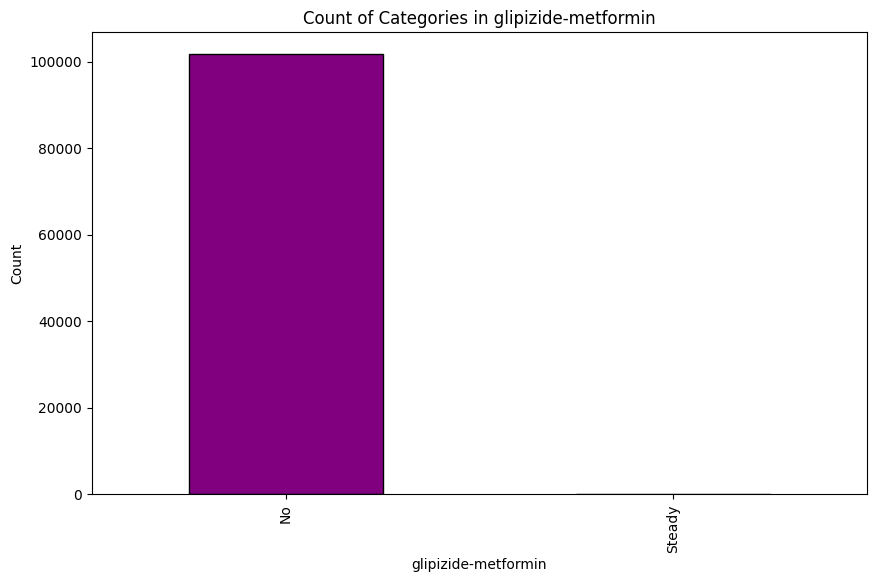

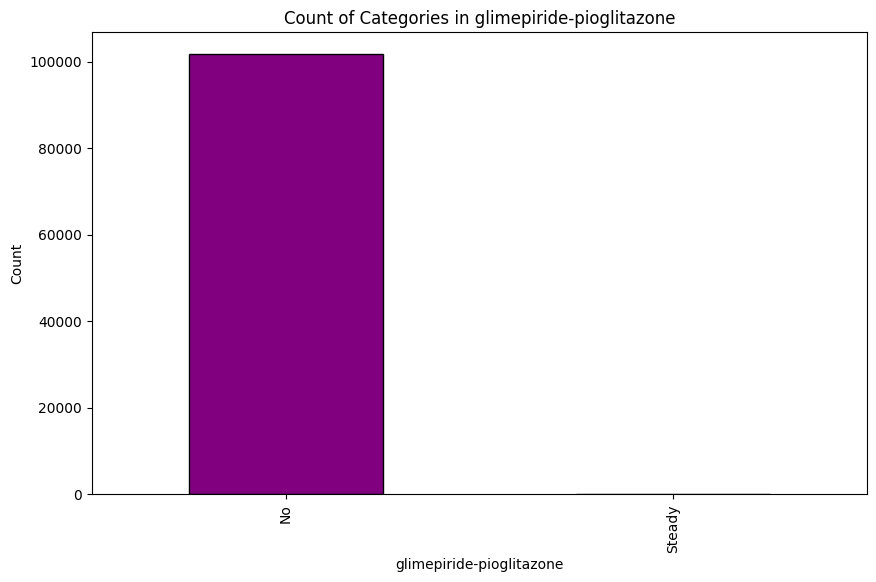

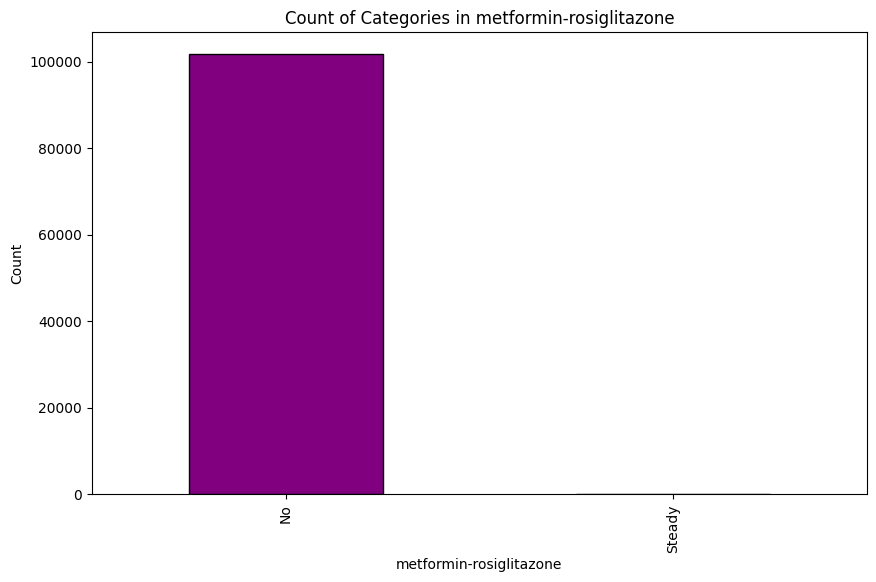

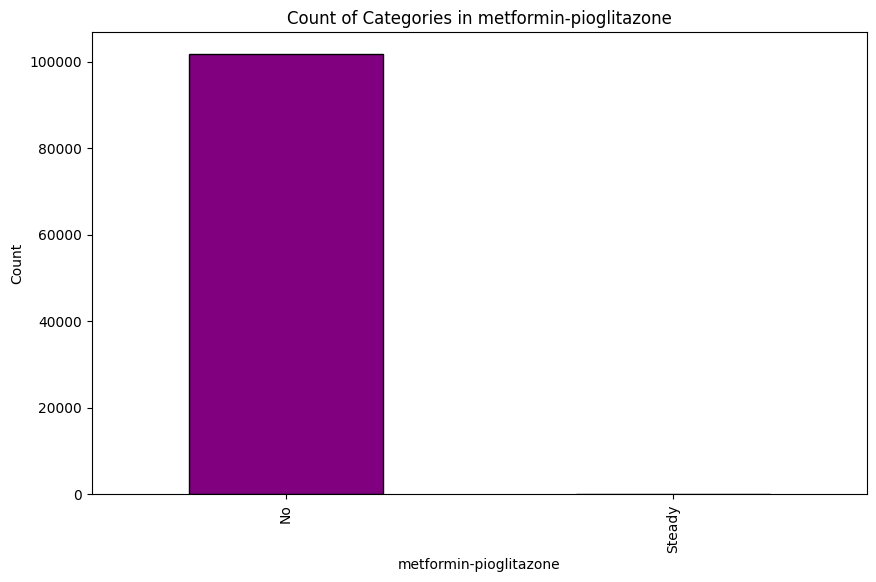

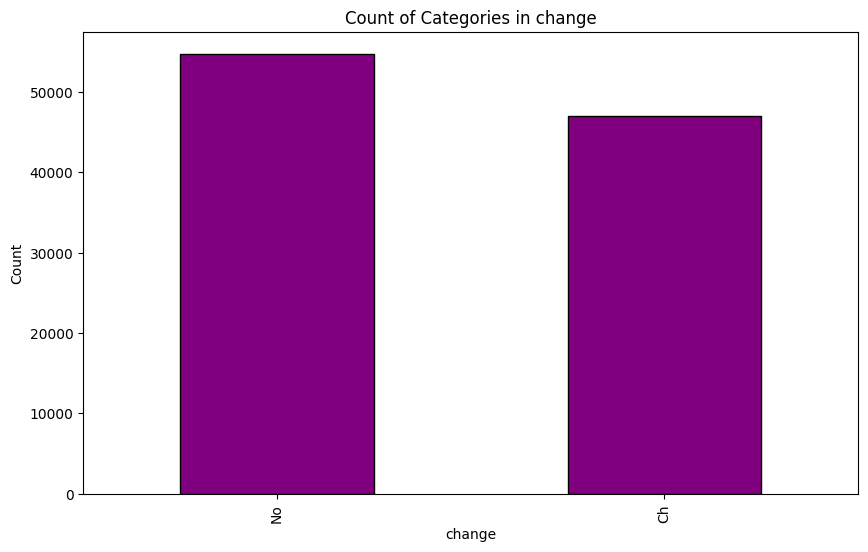

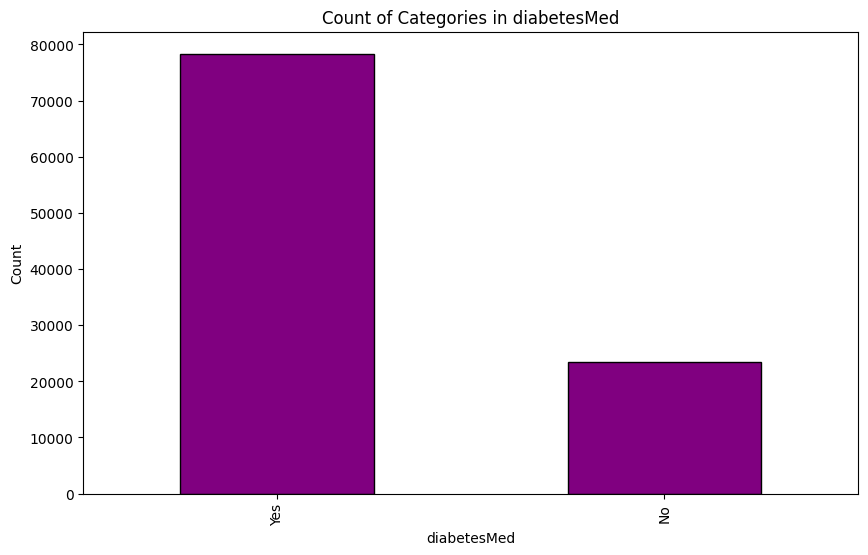

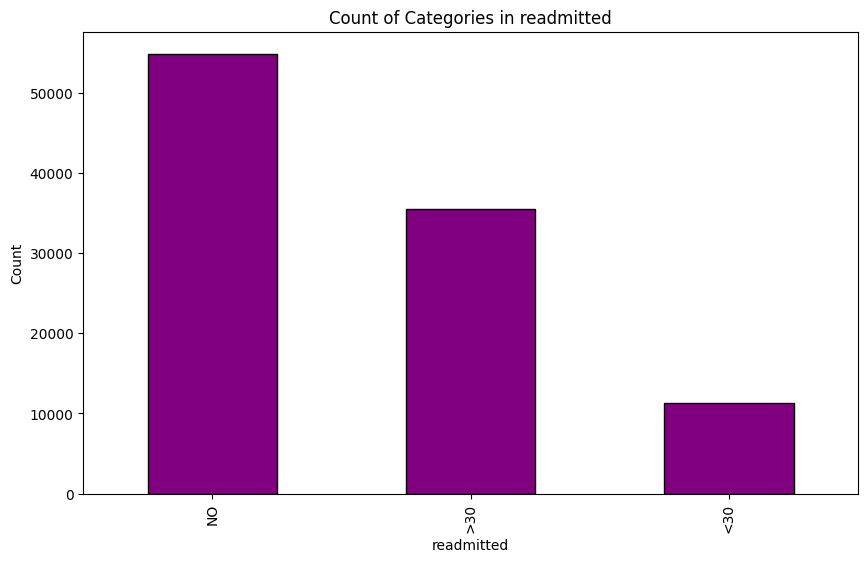

In [ ]:
def freedman_diaconis_bins(data):
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    if iqr == 0:
        bins = 100  #
    else:
        h = 2 * iqr / (len(data) ** (1/3))
        bins = int((data.max() - data.min()) / h)
    return bins
for column in diabetic_data_df.columns:
    if diabetic_data_df[column].dtype in [np.float64, np.int64]:  # Check if the column is numerical
        num_bins = freedman_diaconis_bins(diabetic_data_df[column])
        diabetic_data_df[column].plot(kind='hist', bins=num_bins, color='purple', edgecolor='black', figsize=(10, 6))
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    elif (column not in ["diag_1" , "diag_2" , "diag_3"]):
        category_counts = diabetic_data_df[column].value_counts()
        category_counts.plot(kind='bar', color='purple', edgecolor='black', figsize=(10, 6))
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count of Categories in {column}')
        plt.show()

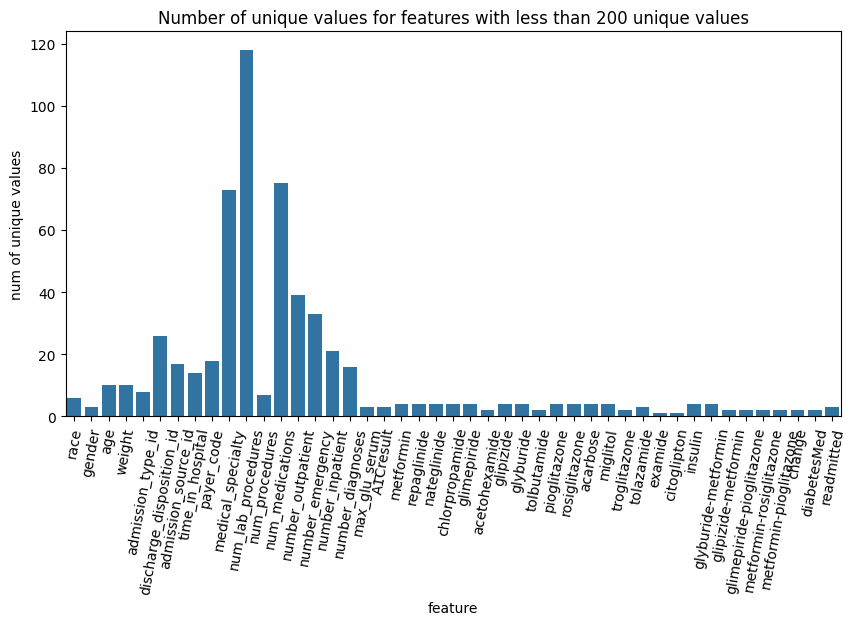

In [ ]:
nu = diabetic_data_df.nunique().reset_index()
nu = nu[nu[0] < 200]  # Filter based on the number of unique values
plt.figure(figsize=(10, 5))
plt.title("Number of unique values for features with less than 200 unique values")
plt.xticks(rotation=80)
nu.columns = ['feature', 'num of unique values']
ax = sns.barplot(x='feature', y='num of unique values', data=nu)

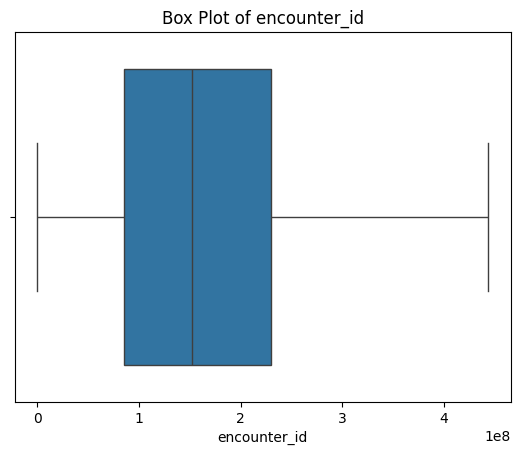

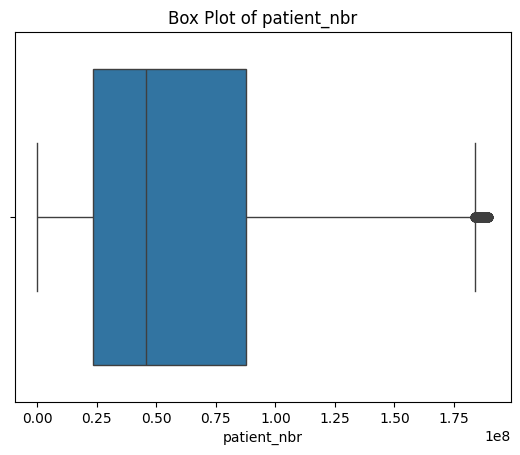

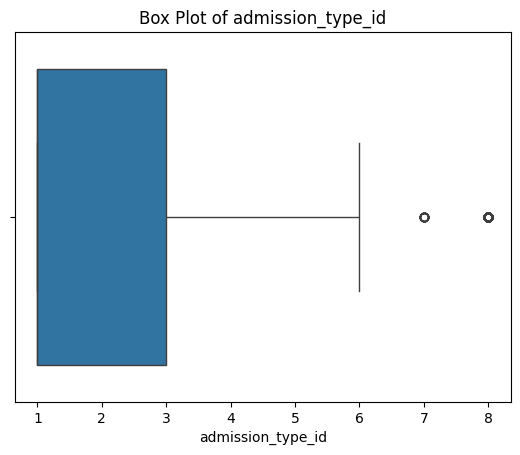

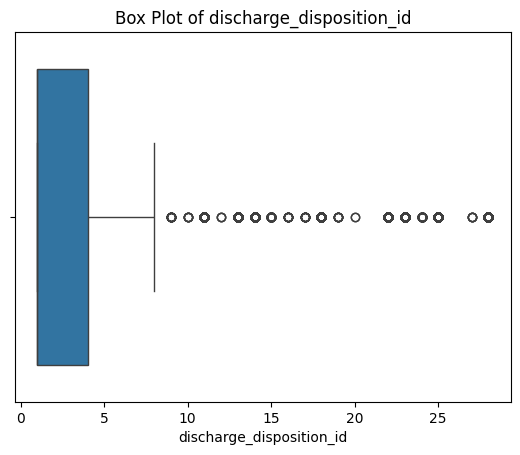

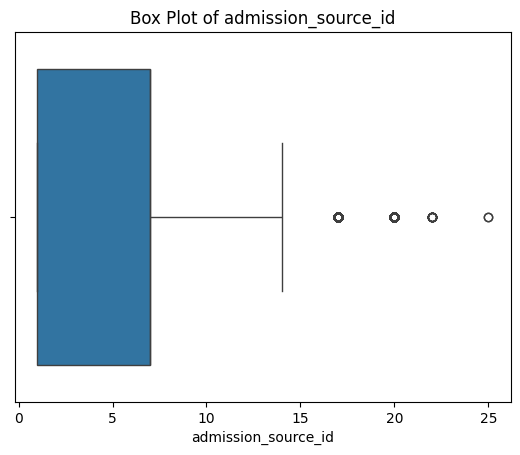

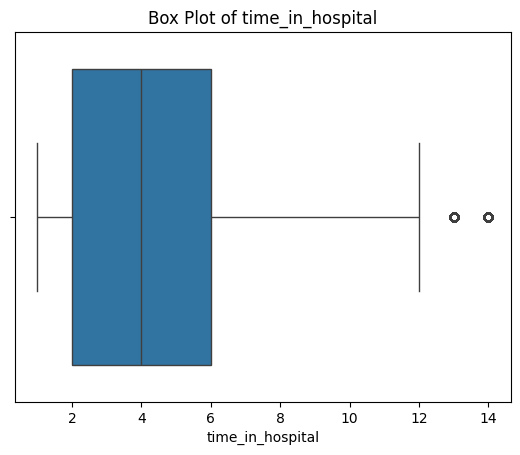

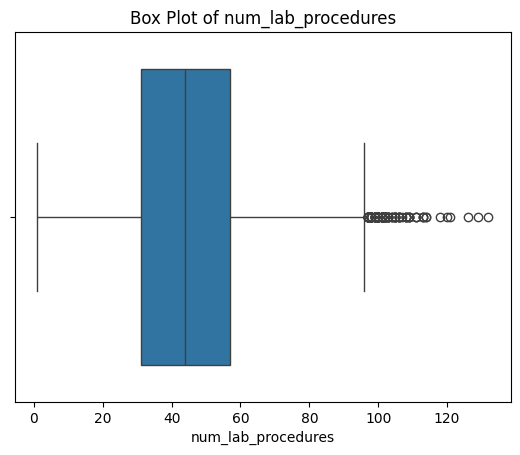

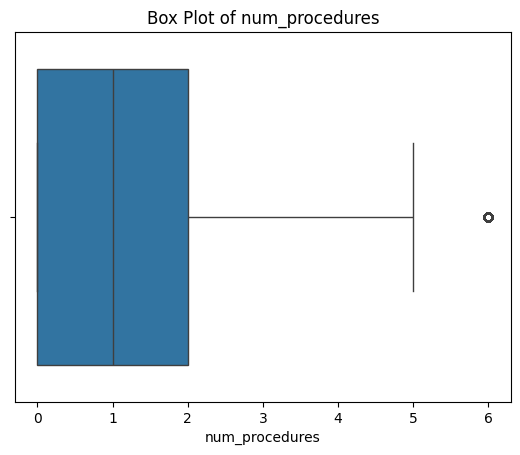

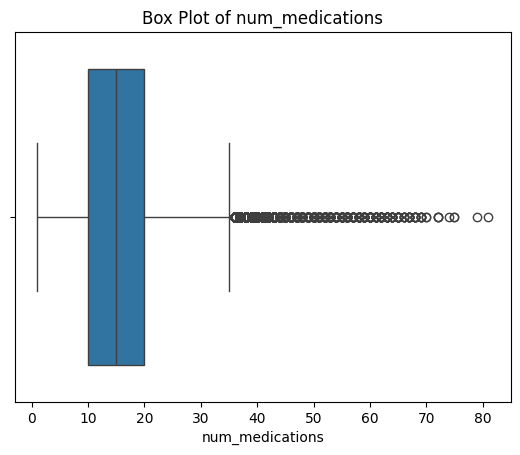

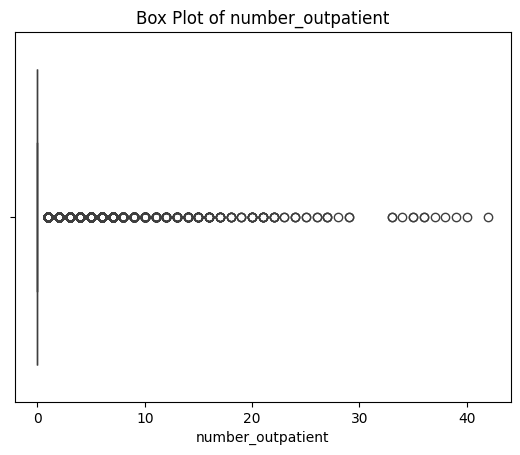

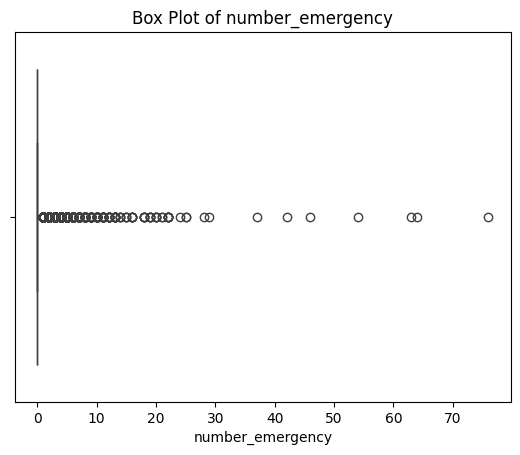

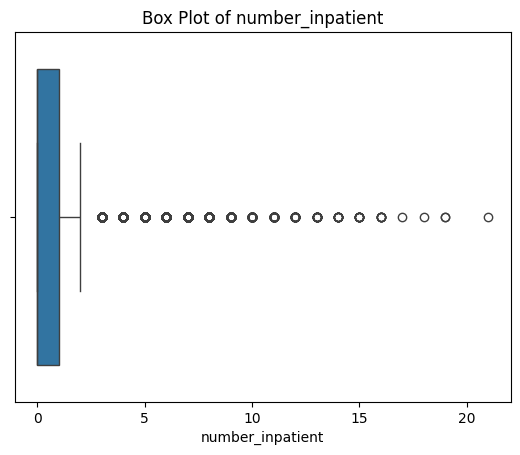

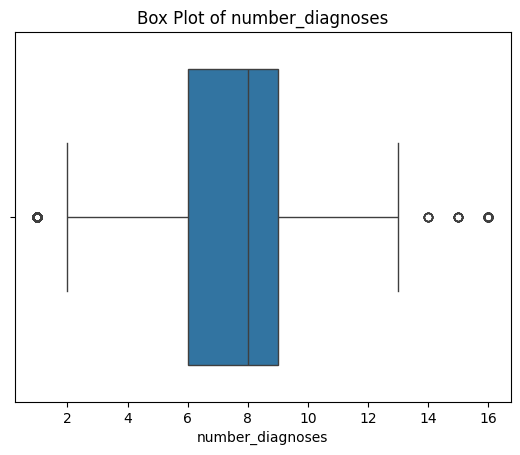

In [ ]:
for column in diabetic_data_df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=diabetic_data_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Handling missing values

Below we have calculated number of null values in each column.

Based on number of null values for each column we will choose which way to handle these null values.

In [ ]:
# Replace values where 'admission_type_id' is 5 with 6
diabetic_data_df['admission_type_id'] = diabetic_data_df['admission_type_id'].replace(5, 6)
diabetic_data_df['admission_type_id'] = diabetic_data_df['admission_type_id'].replace(8, 6)

first of all we replaced all **'Not available'**, **'Not valid'** or related things rows with Null  for **'admission_type_id'** and **'discharge_disposition_id'** and **'admission_source_id'**.

and then we printed number of null values in each column

In [ ]:
diabetic_data_df.to_csv('new_file.csv', index=False)

In [ ]:
diabetic_data_df.replace("?", np.nan, inplace=True)


In [ ]:
diabetic_data_df['admission_type_id'].replace(6, np.nan, inplace = True)

In [ ]:
diabetic_data_df['discharge_disposition_id'] = diabetic_data_df['discharge_disposition_id'].replace(25, 18)
diabetic_data_df['discharge_disposition_id'] = diabetic_data_df['discharge_disposition_id'].replace(26, 18)

In [ ]:
diabetic_data_df['discharge_disposition_id'].replace(18, np.nan, inplace = True)

In [ ]:
diabetic_data_df['admission_source_id'] = diabetic_data_df['admission_source_id'].replace(15, 9)
diabetic_data_df['admission_source_id'] = diabetic_data_df['admission_source_id'].replace(17, 9)
diabetic_data_df['admission_source_id'] = diabetic_data_df['admission_source_id'].replace(20, 9)
diabetic_data_df['admission_source_id'] = diabetic_data_df['admission_source_id'].replace(21, 9)


In [ ]:
diabetic_data_df['admission_source_id'].replace(9, np.nan, inplace = True)

Below we printed the number of **'?'** in each column. because **'?'** means **null** value or **unknown** value.

In [ ]:
# Counting '?' in each column
missing_values_count = (diabetic_data_df == '?').sum()

# Printing the counts
print("Number of rows with '?' in each column:")
print(missing_values_count)

Number of rows with '?' in each column:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0


In [ ]:
print("Number of missing values for each column of diabetic_data_df:")
print(diabetic_data_df.isnull().sum())

Number of missing values for each column of diabetic_data_df:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          7067
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide      

After printing number of Null values , we decided to delete columns that had more than 85% of missing values . because of the large amount of missing values , they cannot help us in analysing the data. these columns are **'max_glu_serum','A1Cresult', 'weight'**.

we also eliminated 'payer_code' column . because it wasn't a cruicial column and it had almost 40% of missing values.

In [ ]:
def dropping(df, columns):
    df.drop(columns=columns, inplace=True)
# List of columns to be dropped


columns_to_drop = ['max_glu_serum', 'A1Cresult', 'weight', 'payer_code', 'medical_specialty']

# Drop the columns
dropping(diabetic_data_df, columns_to_drop)




below we are replacing 'race', 'diag_1', 'diag_2', 'diag_3' missing values with mean and mode. because the amount of null values in these columns is really low.

In [ ]:


diabetic_data_df['race'] = diabetic_data_df['race'].fillna(diabetic_data_df['race'].mode()[0])
# Replace NaN values in 'diag_1', 'diag_2', and 'diag_3' columns with mean
diabetic_data_df[['diag_1', 'diag_2', 'diag_3']] = diabetic_data_df[['diag_1', 'diag_2', 'diag_3']].apply(pd.to_numeric, errors='coerce')
diabetic_data_df['diag_1'] = diabetic_data_df['diag_1'].fillna(diabetic_data_df['diag_1'].mode()[0])
diabetic_data_df['diag_2'] = diabetic_data_df['diag_2'].fillna(diabetic_data_df['diag_2'].mode()[0])
diabetic_data_df['diag_3'] = diabetic_data_df['diag_3'].fillna(diabetic_data_df['diag_3'].mode()[0])

In [ ]:
diabetic_data_df = diabetic_data_df[(diabetic_data_df["gender"] == "Female") | (diabetic_data_df["gender"] == "Male")]

Below we decided to fill null values of these three categorical columns with mode.

because number of null values were really small and outliers don't affect on mode . so it is a good way to replace with mode

In [ ]:
mode_value = diabetic_data_df['admission_source_id'].mode()[0]
diabetic_data_df['admission_source_id'] = diabetic_data_df['admission_source_id'].fillna(diabetic_data_df['admission_source_id'].mode()[0])

In [ ]:

mode_value = diabetic_data_df['discharge_disposition_id'].mode()[0]
diabetic_data_df['discharge_disposition_id'] = diabetic_data_df['discharge_disposition_id'].fillna(diabetic_data_df['discharge_disposition_id'].mode()[0])

In [ ]:

mode_value = diabetic_data_df['admission_type_id'].mode()[0]
diabetic_data_df['admission_type_id'] = diabetic_data_df['admission_type_id'].fillna(diabetic_data_df['admission_type_id'].mode()[0])

# deleting duplicates

Below we are checking if there are any duplicates.

we have duplication in patient_nbr but the rows of these duplicates are not the same. so we don't have any duplications to remove

In [ ]:
# Get unique values from 'patient_nbr' column
unique_patient_numbers = diabetic_data_df['patient_nbr'].unique()

# Print the unique values
print(unique_patient_numbers)

[  8222157  55629189  86047875 ... 140199494 120975314 175429310]


In [ ]:
# Find duplicated rows, keeping the first occurrence as not duplicated
duplicated_rows = diabetic_data_df[diabetic_data_df.duplicated(keep=False)]

# Display the duplicated rows
print(len(duplicated_rows))

0


In [ ]:
def show_unique_items(data, name):
    # Get the number of unique values for each column
    print(f"\nNumber of unique values for each column of {name}:")
    unique_counts = data.nunique()
    print(unique_counts)

    # Get the unique values for each column
    print(f"\nUnique values for each column of {name}:")
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"{column}: {list(unique_values)[:20]}")

In [ ]:
show_unique_items(diabetic_data_df, 'diabetic_data_df')


Number of unique values for each column of diabetic_data_df:
encounter_id                101763
patient_nbr                  71515
race                             5
gender                           2
age                             10
admission_type_id                5
discharge_disposition_id        24
admission_source_id             14
time_in_hospital                14
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         697
diag_2                         650
diag_3                         670
number_diagnoses                16
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide                        4
glyburide                   

# Convert categorical to numerical

Here we try to convert catgorical columns into numerical columns.

In [ ]:
diabetic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              71518 non-null  int64  
 1   patient_nbr               71518 non-null  int64  
 2   race                      71518 non-null  object 
 3   gender                    71518 non-null  object 
 4   age                       71518 non-null  object 
 5   admission_type_id         71518 non-null  int64  
 6   discharge_disposition_id  71518 non-null  int64  
 7   admission_source_id       71518 non-null  int64  
 8   time_in_hospital          71518 non-null  int64  
 9   num_lab_procedures        71518 non-null  int64  
 10  num_procedures            71518 non-null  int64  
 11  num_medications           71518 non-null  int64  
 12  number_outpatient         71518 non-null  int64  
 13  number_emergency          71518 non-null  int64  
 14  number_inp

first of all we want to see how many categories we have in each column . we can do this with **.unique()**

In [ ]:

label_encoder = preprocessing.LabelEncoder()

non_numerical_columns = [col for col in diabetic_data_df.columns if (diabetic_data_df[col].dtype == 'object' or diabetic_data_df[col].dtype == 'bool')]

for column in non_numerical_columns:
    print(f"Unique values for column '{column}':")
    print(diabetic_data_df[column].unique())
    print()

Unique values for column 'race':
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']

Unique values for column 'gender':
['Female' 'Male']

Unique values for column 'age':
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values for column 'metformin':
['No' 'Steady' 'Up' 'Down']

Unique values for column 'repaglinide':
['No' 'Up' 'Steady' 'Down']

Unique values for column 'nateglinide':
['No' 'Steady' 'Down' 'Up']

Unique values for column 'chlorpropamide':
['No' 'Steady' 'Down' 'Up']

Unique values for column 'glimepiride':
['No' 'Steady' 'Down' 'Up']

Unique values for column 'acetohexamide':
['No' 'Steady']

Unique values for column 'glipizide':
['No' 'Steady' 'Up' 'Down']

Unique values for column 'glyburide':
['No' 'Steady' 'Up' 'Down']

Unique values for column 'tolbutamide':
['No' 'Steady']

Unique values for column 'pioglitazone':
['No' 'Steady' 'Up' 'Down']

Unique values for column 'rosiglitazone':
['No' 'St

In [ ]:
def find_special_uniques(df, column):
    print(df[column].unique())

columns = ['metformin',	'repaglinide',	'nateglinide',	'chlorpropamide',	'glimepiride',	'acetohexamide',	'glipizide',	'glyburide',	'tolbutamide',	'pioglitazone',	'rosiglitazone',	'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	'examide',	'citoglipton',	'insulin',	'glyburide-metformin',	'glipizide-metformin',	'glimepiride-pioglitazone',	'metformin-rosiglitazone',	'metformin-pioglitazone'
]
for column in columns:
    print(column)
    find_special_uniques(diabetic_data_df, column)

metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide
['No' 'Steady' 'Down' 'Up']
glimepiride
['No' 'Steady' 'Down' 'Up']
acetohexamide
['No' 'Steady']
glipizide
['No' 'Steady' 'Up' 'Down']
glyburide
['No' 'Steady' 'Up' 'Down']
tolbutamide
['No' 'Steady']
pioglitazone
['No' 'Steady' 'Up' 'Down']
rosiglitazone
['No' 'Steady' 'Up' 'Down']
acarbose
['No' 'Steady' 'Up' 'Down']
miglitol
['No' 'Steady' 'Down' 'Up']
troglitazone
['No' 'Steady']
tolazamide
['No' 'Steady' 'Up']
examide
['No']
citoglipton
['No']
insulin
['No' 'Up' 'Steady' 'Down']
glyburide-metformin
['No' 'Steady' 'Down' 'Up']
glipizide-metformin
['No' 'Steady']
glimepiride-pioglitazone
['No' 'Steady']
metformin-rosiglitazone
['No' 'Steady']
metformin-pioglitazone
['No' 'Steady']


Below we want to know how many 'No' we have in each column to see how much variance we have

In [ ]:
no_counts = diabetic_data_df.apply(lambda x: (x == 'No').sum())

# Print the count for each column
print(no_counts)

encounter_id                     0
patient_nbr                      0
race                             0
gender                           0
age                              0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                           0
diag_2                           0
diag_3                           0
number_diagnoses                 0
metformin                    81776
repaglinide                 100224
nateglinide                 101060
chlorpropamide              101677
glimepiride                  96572
acetohexamide               101762
glipizide                    89078
glyburide                    91113
tolbutamide                 101740
pioglitazone        

In [ ]:
dropping(diabetic_data_df, ['examide', 'citoglipton' ,  'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin'])


In [ ]:
# Apply the mapping to each column

mapping = {'No':0, 'Steady': 1, 'Up': 2, 'Down': 3}
columns_to_encode = ['metformin',	'repaglinide','acetohexamide',	'troglitazone','nateglinide',	'chlorpropamide',	'glimepiride','glipizide','glyburide','tolbutamide',	'pioglitazone',	'rosiglitazone','acarbose',	'miglitol','tolazamide',	'insulin',	'glyburide-metformin'
]  # Replace with your actual column names
for column in columns_to_encode:
    diabetic_data_df[column] = diabetic_data_df[column].map(mapping)


In [ ]:

label_encoder = LabelEncoder()

diabetic_data_df['change'] = diabetic_data_df['change'].replace('Ch', 1)
diabetic_data_df['change'] = diabetic_data_df['change'].replace('No', 0)
diabetic_data_df['gender'] = diabetic_data_df['gender'].replace('Male', 1)
diabetic_data_df['gender'] = diabetic_data_df['gender'].replace('Female', 0)
diabetic_data_df['diabetesMed'] = diabetic_data_df['diabetesMed'].replace('Yes', 1)
diabetic_data_df['diabetesMed'] = diabetic_data_df['diabetesMed'].replace('No', 0)

def label_encoding(df, column):
    df[column] = label_encoder.fit_transform(df[column])

columns_to_encode = ['race','age','readmitted']

for column in columns_to_encode:
    label_encoding(diabetic_data_df, column)

In [ ]:
diabetic_data_df.to_csv('your_file.csv')

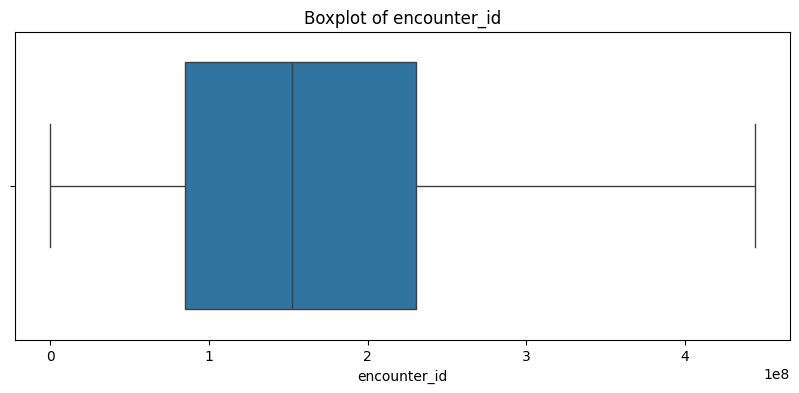

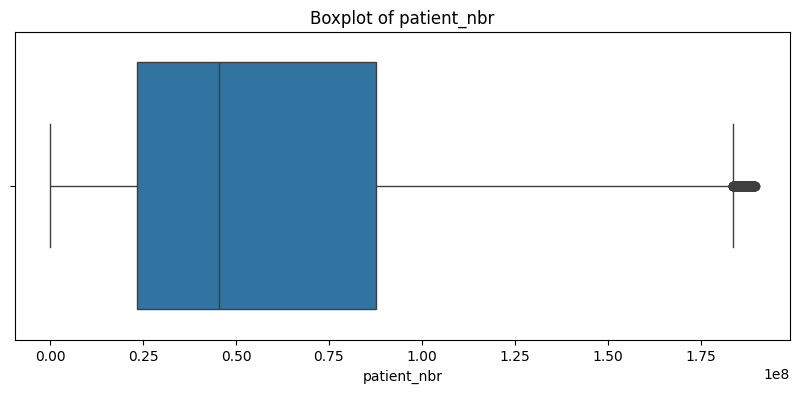

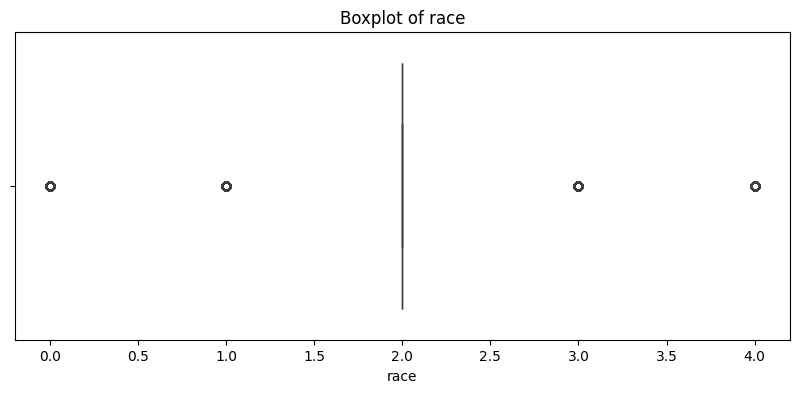

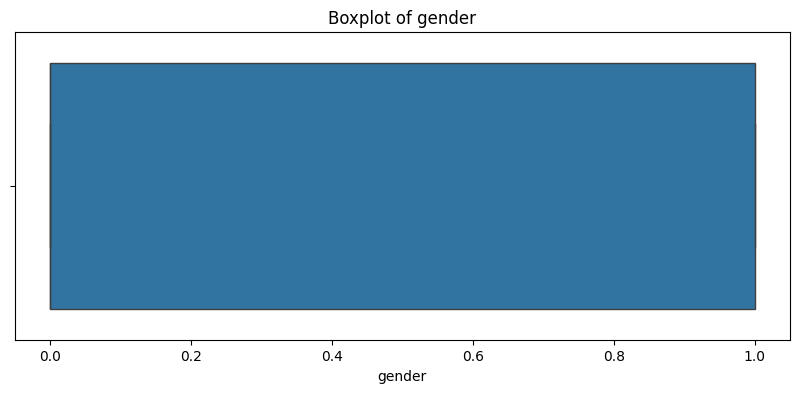

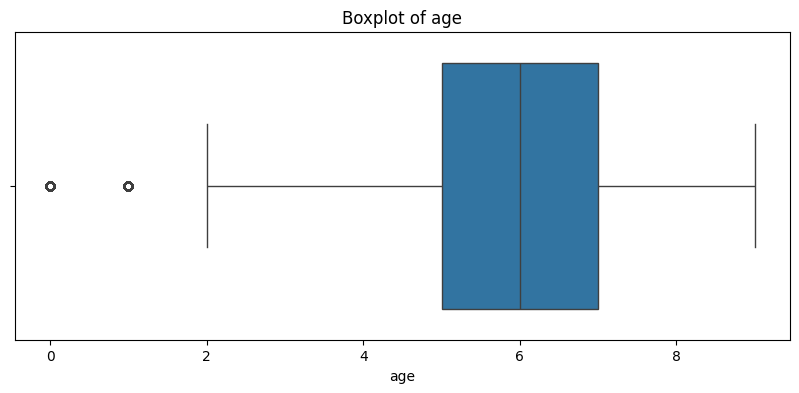

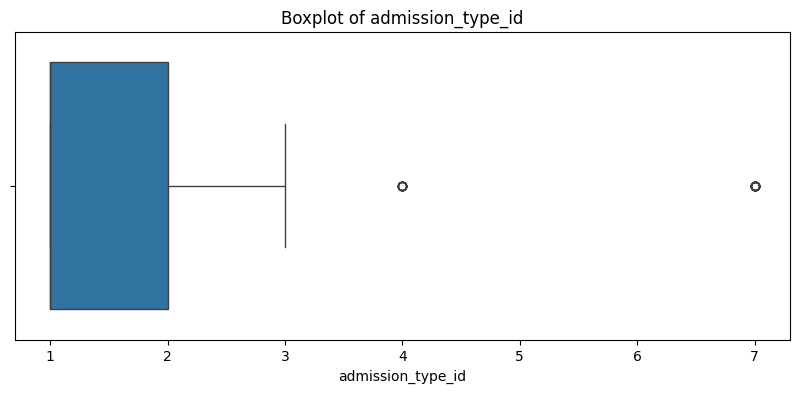

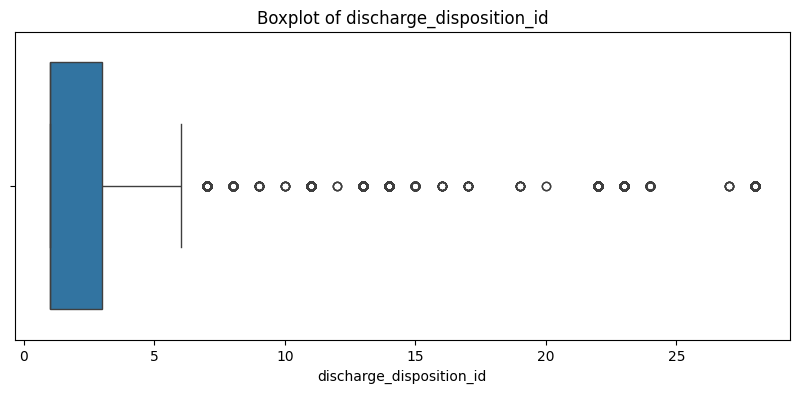

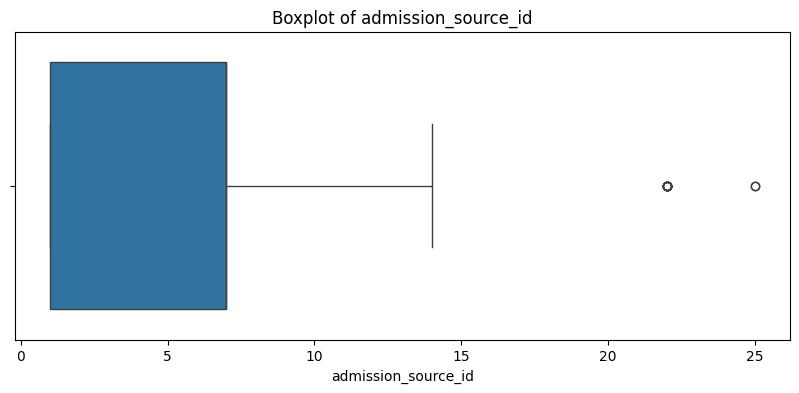

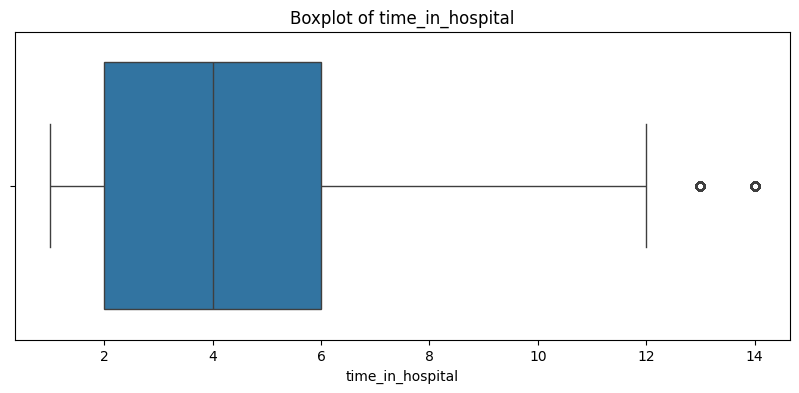

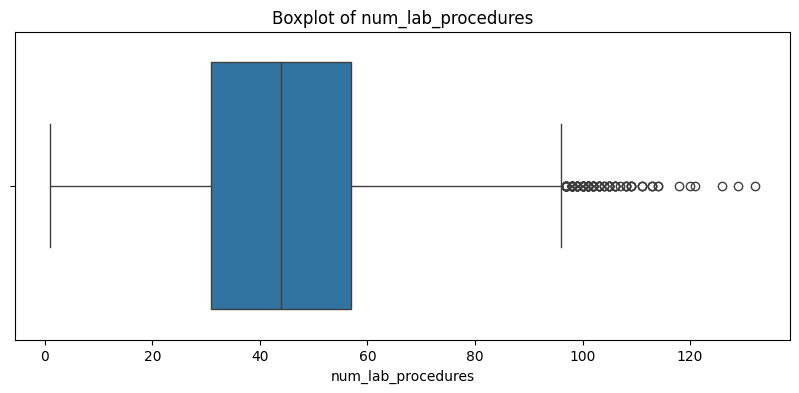

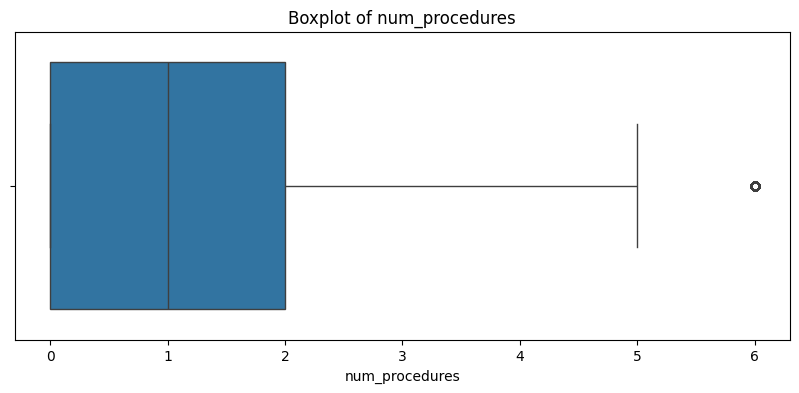

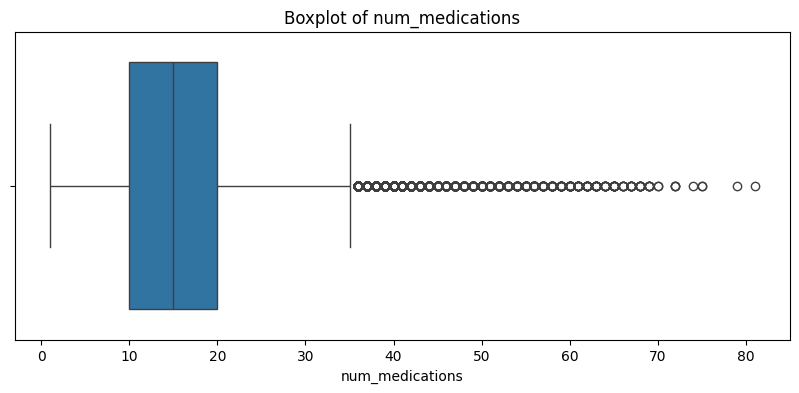

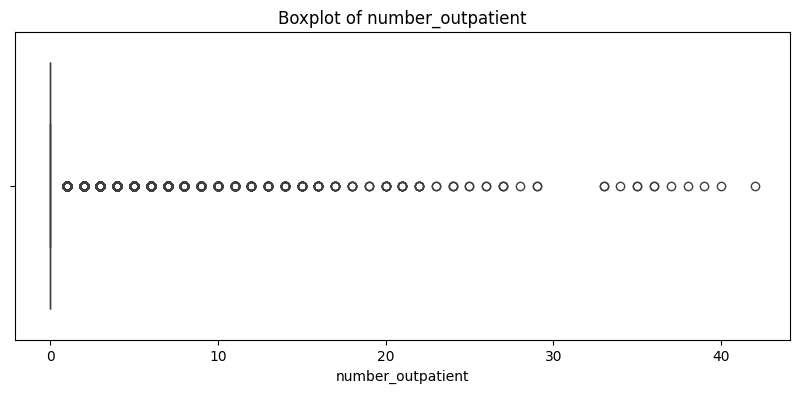

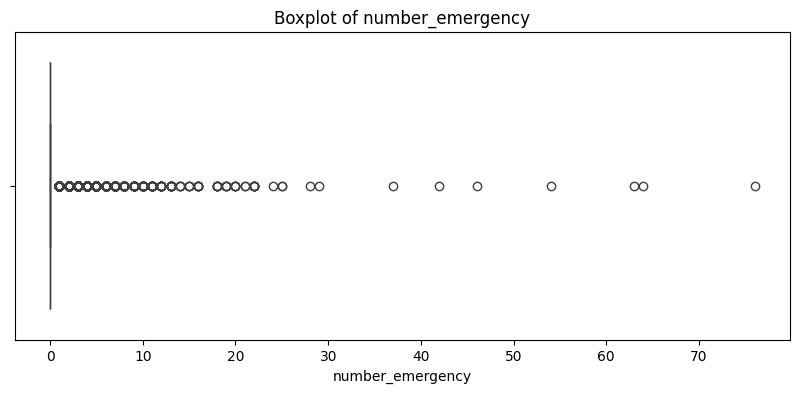

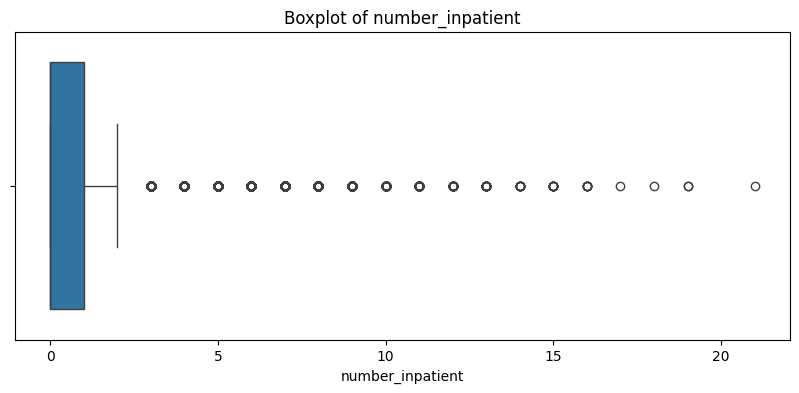

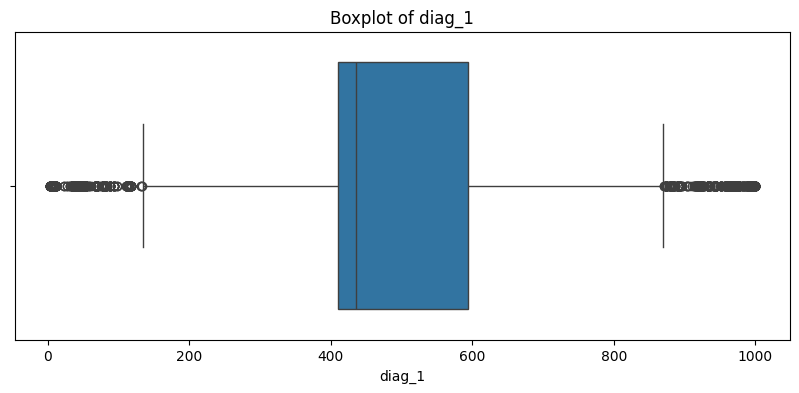

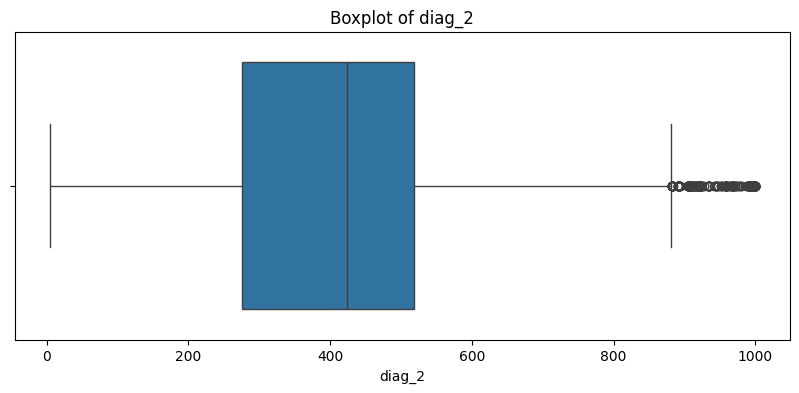

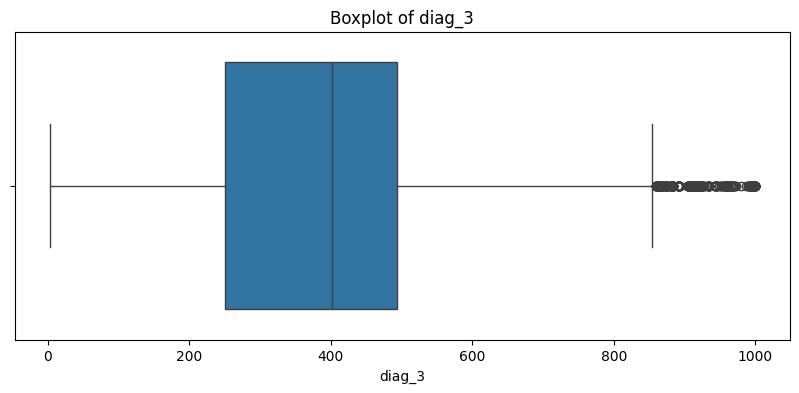

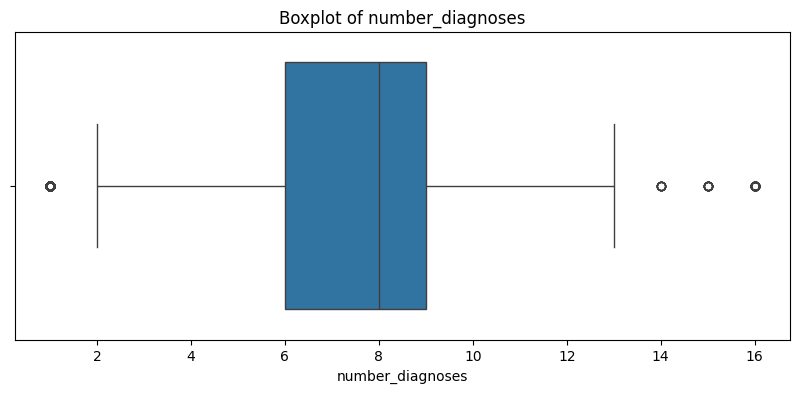

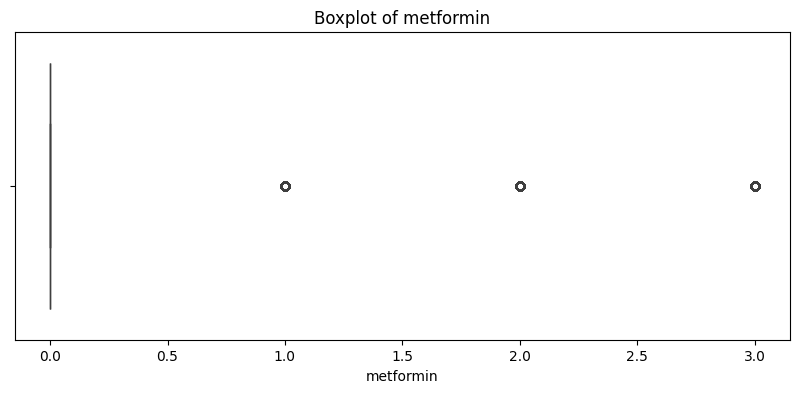

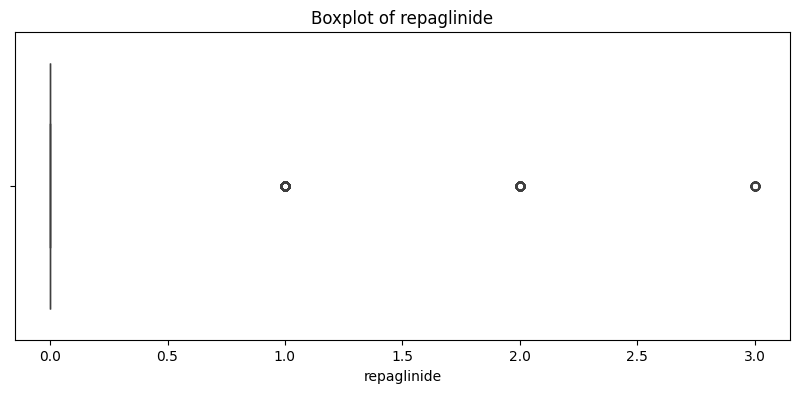

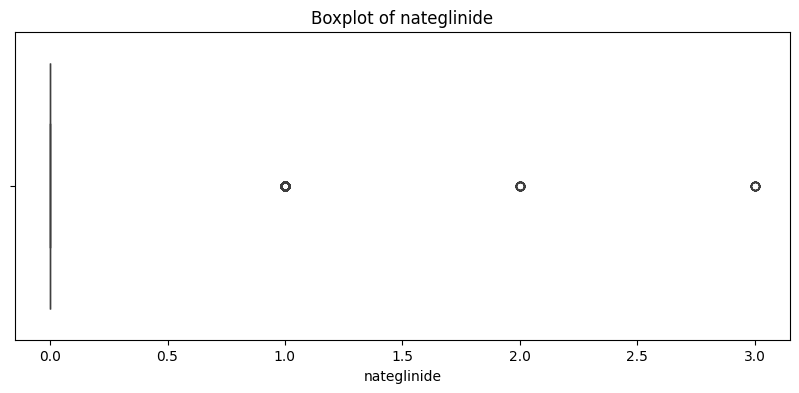

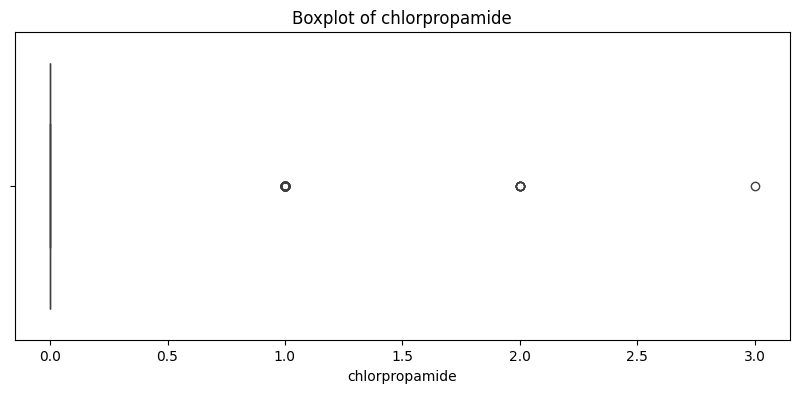

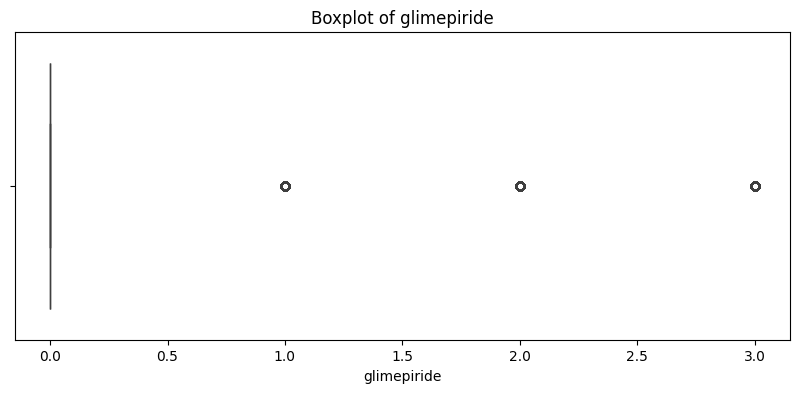

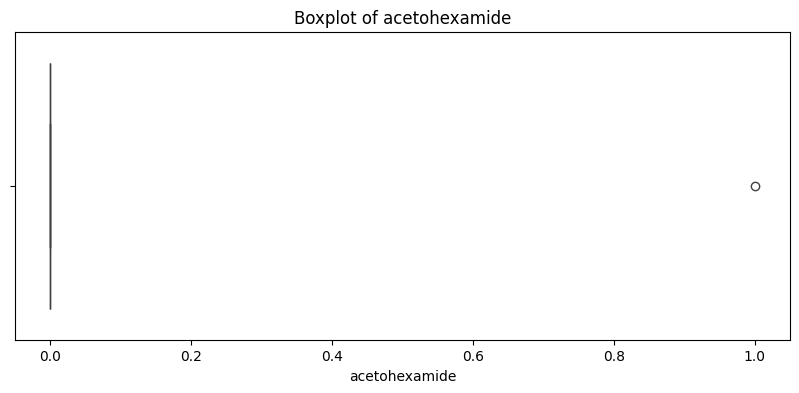

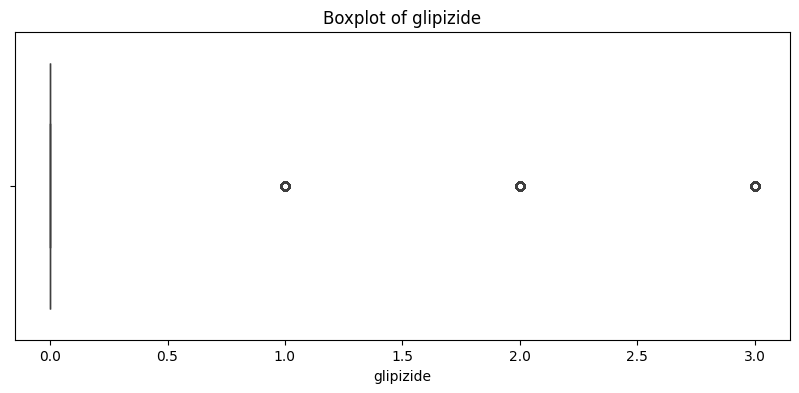

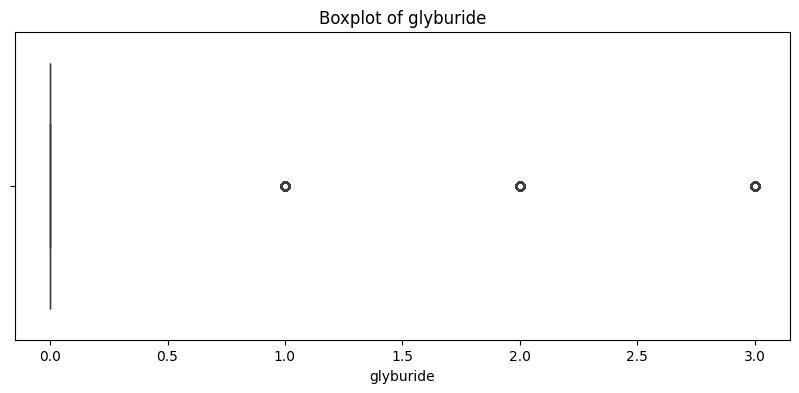

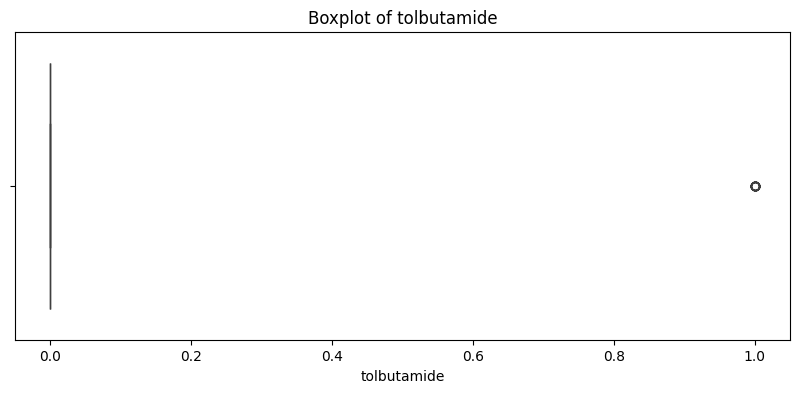

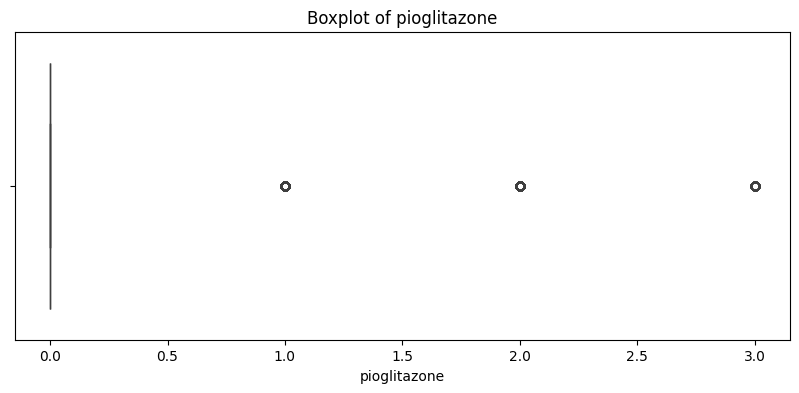

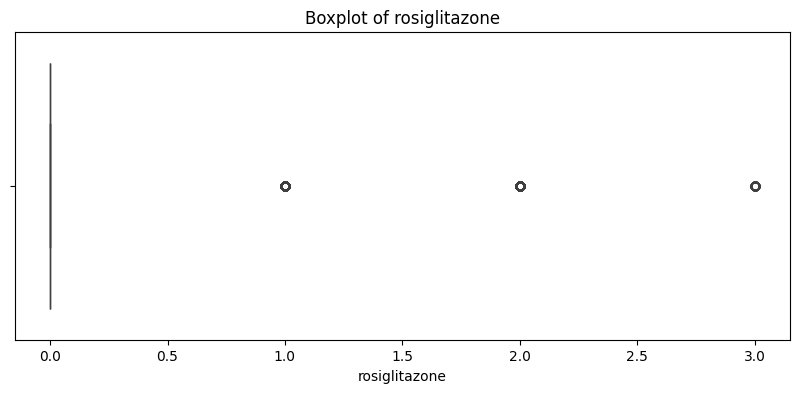

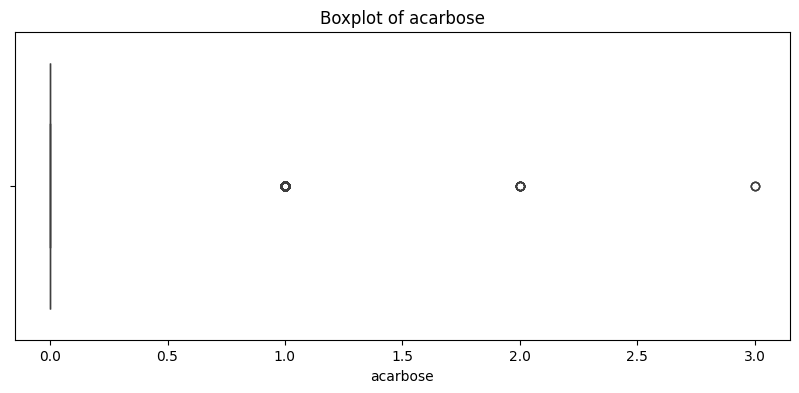

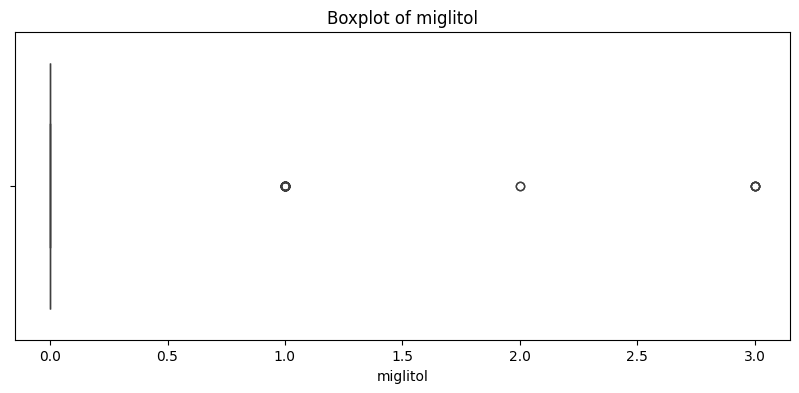

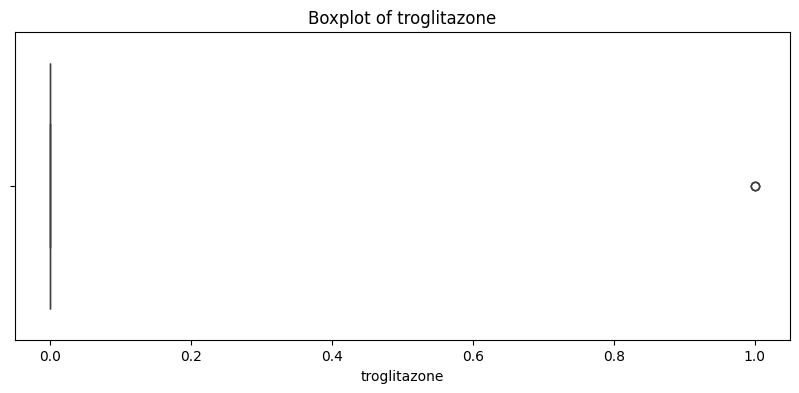

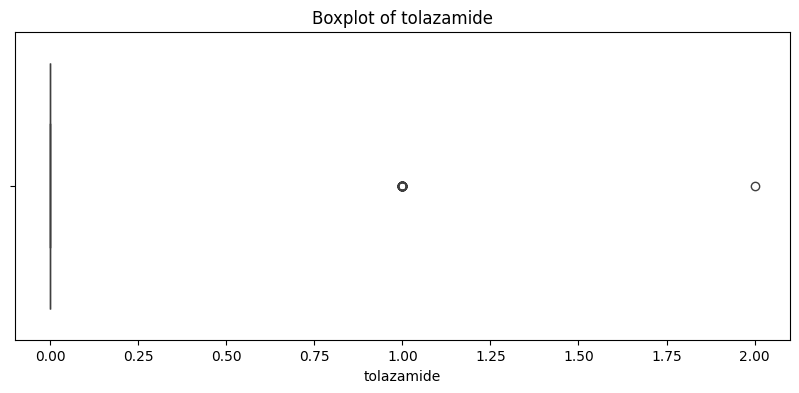

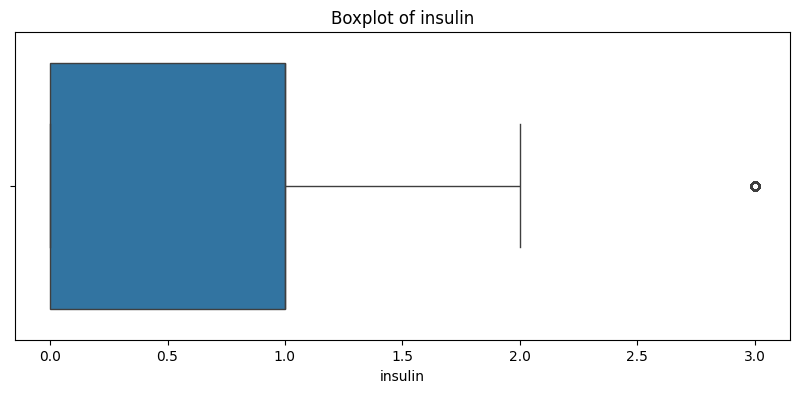

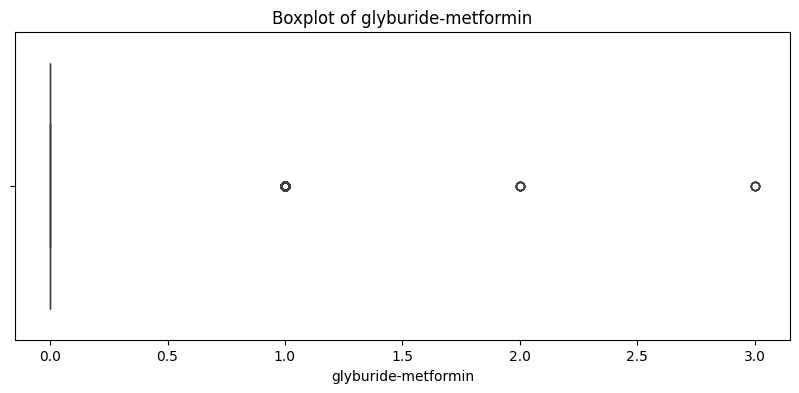

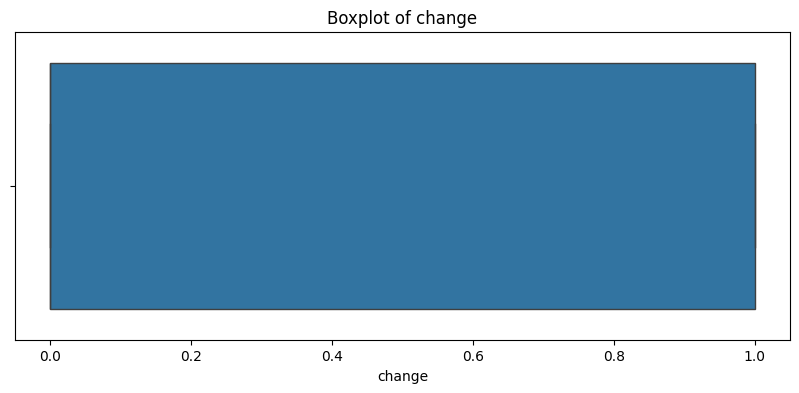

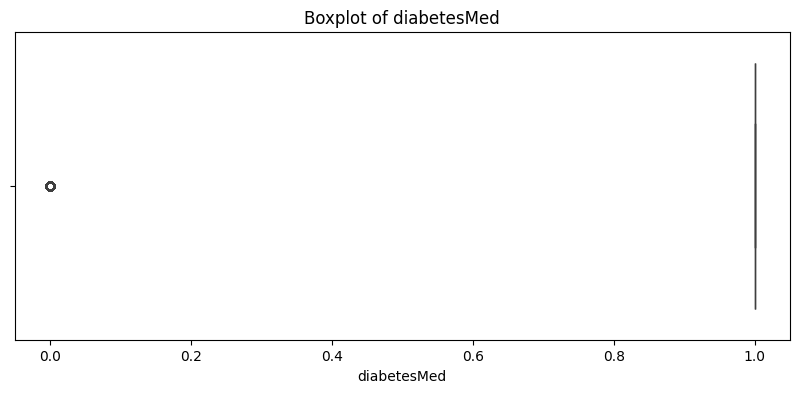

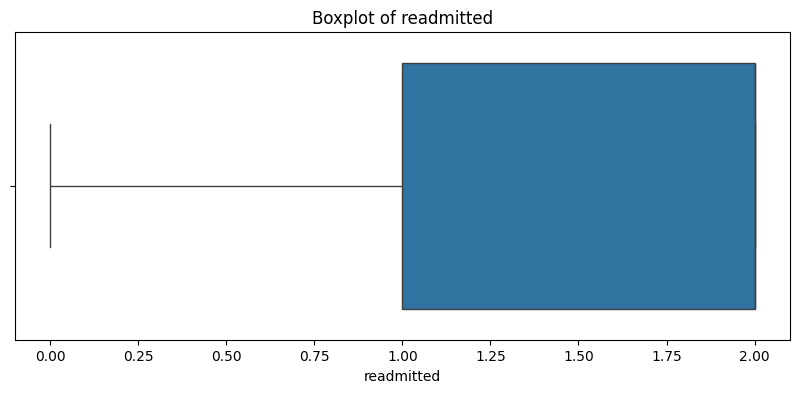

In [ ]:

# Assuming 'diabetic_data_df' is your DataFrame containing the numerical data

# Plotting a boxplot for each numerical column
for column in diabetic_data_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=diabetic_data_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


### Handling outliers

finding outliers

In [ ]:
z_scores = zscore(diabetic_data_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetic_data_df_no_outliers = diabetic_data_df[filtered_entries]
diabetic_data_df_no_outliers

encounter_id  patient_nbr  race  gender  age  admission_type_id  \
2              64410     86047875     0       0    2                1.0   
3             500364     82442376     2       1    3                1.0   
4              16680     42519267     2       1    4                1.0   
5              35754     82637451     2       1    5                2.0   
7              63768    114882984     2       1    7                1.0   
...              ...          ...   ...     ...  ...                ...   
101758     443842340    120975314     2       0    8                1.0   
101759     443842778     86472243     2       1    8                1.0   
101761     443847548    100162476     0       1    7                1.0   
101762     443847782     74694222     0       0    8                1.0   
101763     443854148     41088789     2       1    7                1.0   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
2                            1.0                  7.0                 2   
3                            1.0                  7.0                 2   
4                            1.0                  7.0                 1   
5                            1.0                  2.0                 3   
7                            1.0                  7.0                 5   
...                          ...                  ...               ...   
101758                       1.0                  7.0                 5   
101759                       1.0                  7.0                 1   
101761                       3.0                  7.0                 3   
101762                       4.0                  5.0                 5   
101763                       1.0                  7.0                 1   

        num_lab_procedures  ...  rosiglitazone  acarbose  miglitol  \
2                       11  ...              0         0         0   
3                       44  ...              0         0         0   
4                       51  ...              0         0         0   
5                       31  ...              0         0         0   
7                       73  ...              0         0         0   
...                    ...  ...            ...       ...       ...   
101758                  76  ...              0         0         0   
101759                   1  ...              0         0         0   
101761                  51  ...              0         0         0   
101762                  33  ...              0         0         0   
101763                  53  ...              0         0         0   

        troglitazone  tolazamide  insulin  glyburide-metformin  change  \
2                  0           0        0                    0       0   
3                  0           0        2                    0       1   
4                  0           0        1                    0       1   
5                  0           0        1                    0       0   
7                  0           0        0                    0       0   
...              ...         ...      ...                  ...     ...   
101758             0           0        2                    0       1   
101759             0           0        2                    0       1   
101761             0           0        3                    0       1   
101762             0           0        1                    0       0   
101763             0           0        3                    0       1   

        diabetesMed  readmitted  
2                 1           2  
3                 1           2  
4                 1           2  
5                 1           1  
7                 1           1  
...             ...         ...  
101758            1           2  
101759            1           2  
101761            1           1  
101762            1           2  
101763            1           2  

[67889 rows x 39 columns]

checking the nature of outliers

In [ ]:
Q1 = diabetic_data_df['admission_type_id'].quantile(0.25)
Q3 = diabetic_data_df['admission_type_id'].quantile(0.75)
IQR = Q3 - Q1
outliers = diabetic_data_df[(diabetic_data_df['admission_type_id'] < (Q1 - 1.5 * IQR)) | (diabetic_data_df['admission_type_id'] > (Q3 + 1.5 * IQR))]
outliers

encounter_id  patient_nbr  race  gender  age  admission_type_id  \
2043        13169532     20191257     2       1    5                4.0   
2203        14369772     59902119     2       1    8                4.0   
2461        16168812     21564738     0       1    7                4.0   
4823        26323434     20593143     2       0    6                4.0   
35877      110766078      2177469     0       1    6                4.0   
45829      141553326     58671981     2       1    6                7.0   
47548      146024844     58776723     3       1    4                4.0   
48711      148261332       217206     2       0    7                4.0   
49789      150377430     59077116     2       1    7                7.0   
52944      155954814     59155002     2       1    6                7.0   
56591      162365280     59456412     2       0    5                7.0   
56843      162861522     59460939     2       0    7                7.0   
65490      182582472     59980590     0       1    5                7.0   
65576      182808666     59986746     2       1    5                7.0   
68520      193579974     60150222     2       1    5                7.0   
71324      206605110     60332508     2       0    5                7.0   
75507      226623540     60635124     2       0    9                7.0   
80354      247730952     20103048     3       0    0                4.0   
80530      248407374     71493588     2       1    4                7.0   
80814      249703860     71494254     2       1    4                7.0   
82956      259028628     78120684     2       1    5                7.0   
85718      271666362    110250918     2       1    5                7.0   
87714      280652286     33119388     2       1    6                4.0   
91386      308496164    141501551     2       0    6                7.0   
91599      311376116    141459548     2       0    8                7.0   
94073      343730600    141434069     2       0    8                7.0   
97472      389059568    141433160     2       0    8                7.0   
98563      402583472    141357506     0       1    5                7.0   
98635      403231316    141466478     2       1    1                7.0   
99507      414312614     55774188     2       0    9                7.0   
100721     429690494    115019244     1       1    8                4.0   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
2043                         1.0                  4.0                 2   
2203                         1.0                  4.0                 2   
2461                         6.0                  4.0                 5   
4823                         6.0                  4.0                 2   
35877                        1.0                 14.0                 3   
45829                        2.0                  7.0                 3   
47548                        1.0                  7.0                 6   
48711                        6.0                  1.0                 4   
49789                        6.0                  7.0                 5   
52944                        3.0                  7.0                10   
56591                       22.0                  7.0                11   
56843                        3.0                  7.0                 5   
65490                        1.0                  7.0                 1   
65576                       22.0                  7.0                 8   
68520                       11.0                  7.0                 2   
71324                        1.0                  7.0                 7   
75507                        3.0                  7.0                 8   
80354                        1.0                  1.0                 2   
80530                        1.0                  7.0                 1   
80814                       11.0                  7.0                 1   
82956                        6.0

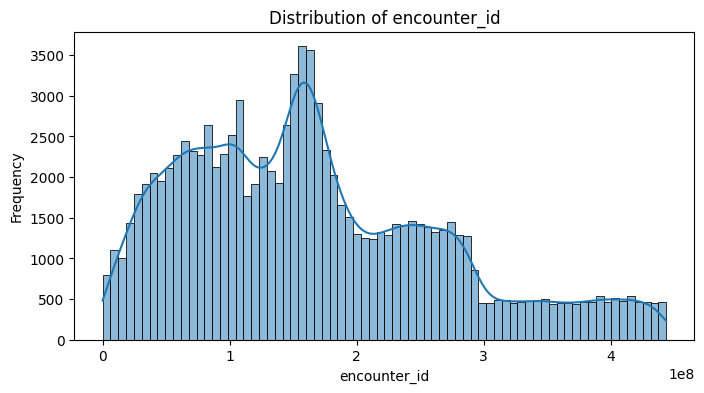

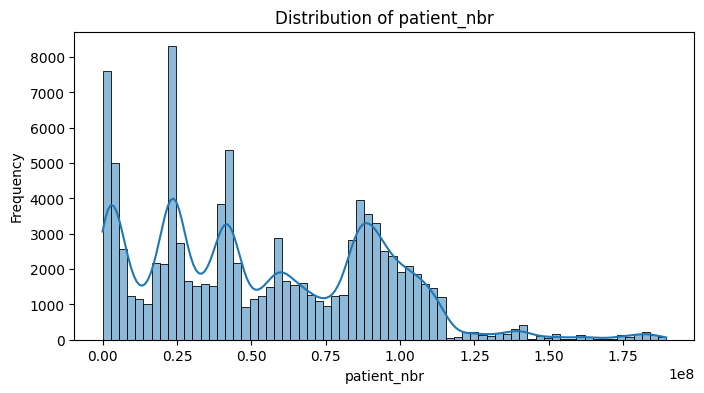

KeyboardInterrupt: 

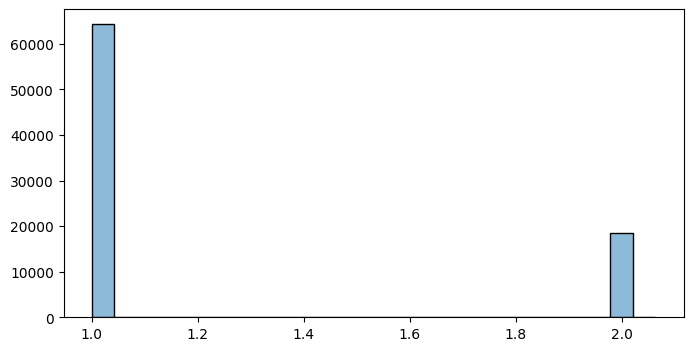

In [ ]:

for column in diabetic_data_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(diabetic_data_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

1) Identification: Before handling outliers, you need to identify them. This can be done through visualization (like boxplots) or statistical methods (like Z-scores or the Interquartile Range (IQR))

2) Assessment: Determine the nature of the outliers. Are they due to measurement errors, data entry mistakes, or are they natural variations in the data? If they’re errors, they should be corrected or removed2.

**Treatment:**

**Removal:** If outliers are due to errors or they are not part of the natural variation, you can remove them. However, this should be done cautiously as it can affect the distribution of your data2.

**Transformation:** Apply transformations to reduce the impact of outliers. Logarithmic, square root, or Box-Cox transformations are common.

**Imputation:** Replace outliers with estimates based on the rest of your data. This can be the mean, median, or a prediction from a model1.


In [ ]:

# Function to calculate IQR
def calculate_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Function to identify outliers using Z-score
def remove_with_zscore(data):
    z_scores = zscore(data)
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores < 3).all(axis=1)

# Function to remove outliers
def remove_outliers_with_q(data, Q1, Q3, IQR):
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

# Function to transform data
def apply_transformations(column):
    # Logarithmic transformation
    column_log = np.log(column + 1)  # Adding 1 to avoid log(0)

    # Square root transformation
    #column_sqrt = np.sqrt(column)

    # Box-Cox transformation (only for positive values)
    #column_boxcox, _ = boxcox(column[column > 0])

    return column_log

# Function to impute outliers with median
def impute_outliers_with_median(data, Q1, Q3, IQR, median_value):
    return np.where(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))), median_value, data)










# comment other methods if you choose one
for column in diabetic_data_df.select_dtypes(include=np.number).columns:
    Q1, Q3, IQR = calculate_iqr(diabetic_data_df[column])
    #diabetic_data_df[column] = remove_outliers_with_q(diabetic_data_df[column], Q1, Q3, IQR)
    diabetic_data_df[column ] = apply_transformations(diabetic_data_df[column])
    #median_value = diabetic_data_df[column].median()
    #diabetic_data_df[column] = impute_outliers_with_median(diabetic_data_df[column], Q1, Q3, IQR, median_value)

# Save the modified DataFrame to a new CSV file
diabetic_data_df.to_csv('diabetes_data_cleaned.csv', index=False)


In [ ]:
def detect_outliers_ensemble(df):
    iso_forest = IsolationForest(n_estimators=100)
    outliers = iso_forest.fit_predict(df)
    # Marking outliers as True/False
    return outliers == -1

# Applying the ensemble method to the DataFrame
outlier_flags = detect_outliers_ensemble(diabetic_data_df.select_dtypes(include=[np.number]))

# Adding the outlier flags to the DataFrame
diabetic_data_df['is_outlier'] = outlier_flags

# You can now choose to remove or treat the outliers based on the flags
df_no_outliers = diabetic_data_df[diabetic_data_df['is_outlier'] == False]

diabetic_data_df['is_outlier'] = label_encoder.fit_transform(diabetic_data_df['is_outlier'])

# Save the DataFrame with no outliers to a new CSV file
df_no_outliers.to_csv('diabetes_data_no_outliers.csv', index=False)

In [ ]:
categorical_columns = ['race', 'gender', 'age',
       'diag_1', 'diag_2', 'diag_3',  'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',  'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

In [ ]:
category_counts = {}
categorical_columns = list(categorical_columns)
categorical_columns.remove("glipizide-metformin")
categorical_columns.remove("glimepiride-pioglitazone")
categorical_columns.remove('metformin-rosiglitazone')
categorical_columns.remove('metformin-pioglitazone')


In [ ]:
diabetic_data_df.drop(columns = ["acetohexamide" , "troglitazone" ] , inplace = True)

In [ ]:
all_columns = diabetic_data_df.columns
numerical_cols = [col for col in all_columns if col not in categorical_columns]

<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to 

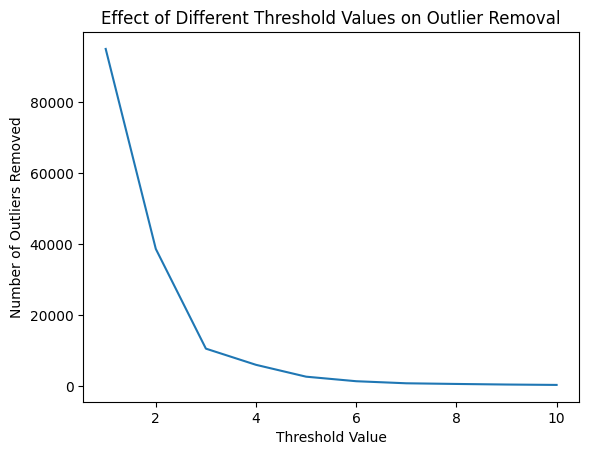

In [ ]:
def drop_numerical_outliers(df, cols, z_thresh=3):
    df_out = df.copy()
    for col in cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df_out[z_scores > z_thresh]
        df_out = df_out.drop(outliers.index)
    return df_out

threshold_values = range(1, 11)
outliers_removed = []
for threshold in threshold_values:
    df_cleaned = drop_numerical_outliers(diabetic_data_df, numerical_cols, threshold)
    num_outliers_removed = len(diabetic_data_df) - len(df_cleaned)
    outliers_removed.append(num_outliers_removed)

# Plot the number of outliers removed for each threshold value
plt.plot(threshold_values, outliers_removed)
plt.xlabel('Threshold Value')
plt.ylabel('Number of Outliers Removed')
plt.title('Effect of Different Threshold Values on Outlier Removal')
plt.show()

In [ ]:
diabetic_data_df = drop_numerical_outliers(diabetic_data_df, numerical_cols, 3)

<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]
<ipython-input-31-1c27b70177b3>:5: UserWarning: Boolean Series key will be reindexed to 

In [ ]:
df = diabetic_data_df.drop(columns = ["encounter_id"])

In [ ]:
df

patient_nbr  race  gender  age  admission_type_id  \
1          55629189     2       0    1                1.0   
2          86047875     0       0    2                1.0   
3          82442376     2       1    3                1.0   
4          42519267     2       1    4                1.0   
5          82637451     2       1    5                2.0   
...             ...   ...     ...  ...                ...   
101760     50375628     0       0    6                1.0   
101761    100162476     0       1    7                1.0   
101762     74694222     0       0    8                1.0   
101763     41088789     2       1    7                1.0   
101764     31693671     2       0    8                2.0   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                            1.0                  7.0                 3   
2                            1.0                  7.0                 2   
3                            1.0                  7.0                 2   
4                            1.0                  7.0                 1   
5                            1.0                  2.0                 3   
...                          ...                  ...               ...   
101760                       1.0                  7.0                 6   
101761                       3.0                  7.0                 3   
101762                       4.0                  5.0                 5   
101763                       1.0                  7.0                 1   
101764                       3.0                  7.0                10   

        num_lab_procedures  num_procedures  ...  pioglitazone  rosiglitazone  \
1                       59               0  ...             0              0   
2                       11               5  ...             0              0   
3                       44               1  ...             0              0   
4                       51               0  ...             0              0   
5                       31               6  ...             0              0   
...                    ...             ...  ...           ...            ...   
101760                  45               1  ...             0              1   
101761                  51               0  ...             0              0   
101762                  33               3  ...             0              0   
101763                  53               0  ...             0              0   
101764                  45               2  ...             1              0   

        acarbose  miglitol  tolazamide  insulin  glyburide-metformin  change  \
1              0         0           0        2                    0       1   
2              0         0           0        0                    0       0   
3              0         0           0        2                    0       1   
4              0         0           0        1                    0       1   
5              0         0           0        1                    0       0   
...          ...       ...         ...      ...                  ...     ...   
101760         0         0           0        3                    0       1   
101761         0         0           0        3                    0       1   
101762         0         0           0        1                    0       0   
101763         0         0           0        3                    0       1   
101764         0         0           0        2                    0       1   

        diabetesMed  readmitted  
1                 1           1  
2                 1           2  
3                 1           2  
4                 1           2  
5                 1           1  
...             ...         ...  
101760            1           1  
101761            1           1  
101762            1           2  
101763            1           2  
101764            1           2  

[91265 rows x 36 columns]

### Normalizing

**Min-Max Scaling:** This technique scales the data within a fixed range, usually 0 to 1, or -1 to 1 if negative values exist. It’s useful when you know the approximate minimum and maximum values of your data.

**Standardization (Z-score Normalization):** This method transforms the data to have a mean of 0 and a standard deviation of 1. It’s less affected by outliers compared to min-max scaling.

**Robust Scaling:** Similar to standardization, but it uses the median and the interquartile range, making it more robust to outliers.

In [ ]:





# Min-Max Scaling
min_max_scaler = MinMaxScaler()
diabetic_data_df_minmax = min_max_scaler.fit_transform(diabetic_data_df)

# Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
diabetic_data_df_standard = standard_scaler.fit_transform(diabetic_data_df)

# Robust Scaling
robust_scaler = RobustScaler()
diabetic_data_df_robust = robust_scaler.fit_transform(diabetic_data_df)





In [ ]:
diabetic_data_df_minmax

array([[0.32660833, 0.5       , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.50520199, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.48403345, 0.5       , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.43854262, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.24123899, 0.5       , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.18607853, 0.5       , 0.        , ..., 1.        , 1.        ,
        1.        ]])

hash

hazf kardan bayzi column ha khoobe ya na

amalkard ba outliers va beddon outliers

ye bar beddone outlier

ye bar ba outlier

### Converting Categorical Variables

[MASK] -> az diabetic_data_df estefadeh kon

### Normalizing Numerical Data

[MASK] -> az diabetic_data_df estefadeh kon

### comparing using outliers .

## Part 2 - Dimensionality Reduction

First we don't handle outliers and see what are the results
we will compare different ways of normalization

After examining kmeans we can see that robust narmalization is the best

In [ ]:
def pca_(data):
    pca = PCA()
    pca.fit(data)

    # Step 3: Explained Variance Ratio
    explained_variance = pca.explained_variance_ratio_

    # Step 4: Cumulative Explained Variance
    cumulative_variance = np.cumsum(explained_variance)

    # Step 5: Choose n_components
    # Find the number of components that explain at least 95% of the variance
    n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
    print(n_components)
    pca_optimal = PCA(n_components=n_components)
    transformed_data = pca_optimal.fit_transform(data)
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, index=diabetic_data_df.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    print(loadings_df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('PCA Explained Variance')
    plt.show()
    print(f"Explained variance ratio: {explained_variance_ratio}")
    return transformed_data

20
                               PC1       PC2       PC3       PC4       PC5  \
encounter_id             -0.012470 -0.000248 -0.003660 -0.004149 -0.011687   
patient_nbr              -0.013885  0.002613 -0.003840  0.012020 -0.017174   
race                     -0.000873  0.055813  0.053021 -0.045620 -0.005201   
gender                   -0.025207  0.994105 -0.061385  0.041891 -0.017257   
age                       0.007456 -0.007730  0.014407  0.033490 -0.012123   
admission_type_id        -0.007240  0.018133  0.286024 -0.136730  0.082405   
discharge_disposition_id -0.023166 -0.030944  0.054605  0.180607 -0.080097   
admission_source_id      -0.002535 -0.020479 -0.338982  0.178225 -0.116437   
time_in_hospital         -0.068303 -0.030313  0.248045  0.331040 -0.120600   
num_lab_procedures       -0.018104 -0.003356  0.006121  0.135590 -0.065973   
num_procedures           -0.004107  0.065337  0.829579  0.090137  0.062602   
num_medications          -0.065224 -0.010191  0.156930  0.099

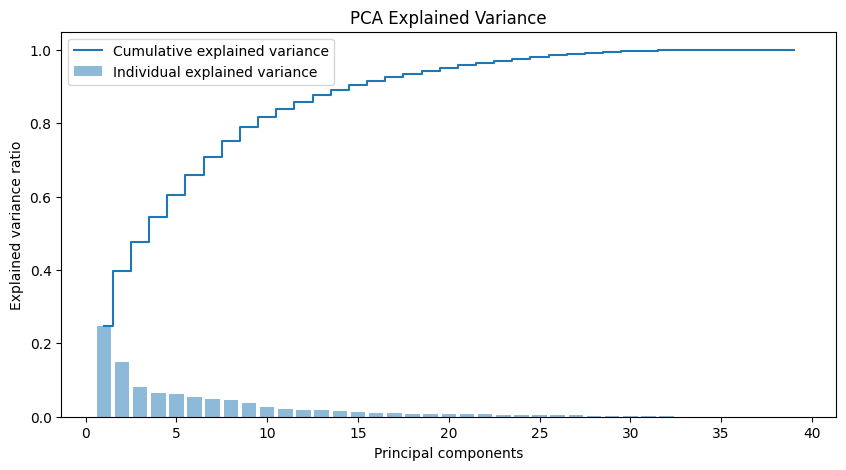

Explained variance ratio: [2.46557897e-01 1.50134404e-01 8.08551033e-02 6.58296410e-02
 6.08256596e-02 5.44651408e-02 4.84739690e-02 4.49061116e-02
 3.85751408e-02 2.72670254e-02 2.18734413e-02 1.92067673e-02
 1.75698504e-02 1.55414890e-02 1.27920117e-02 1.14711685e-02
 1.08348863e-02 8.60079249e-03 8.03879372e-03 7.33028085e-03
 6.99006933e-03 6.10485348e-03 5.68934270e-03 5.40412948e-03
 5.15796396e-03 4.87086966e-03 4.30414514e-03 2.66316603e-03
 2.50802816e-03 2.03993724e-03 1.11663885e-03 1.03684772e-03
 4.84639079e-04 1.43646326e-04 1.35349313e-04 9.47834718e-05
 8.24597745e-05 1.76599164e-05 5.89550321e-06]
34
                               PC1       PC2       PC3       PC4       PC5  \
encounter_id             -0.183153 -0.154696 -0.152583 -0.460497 -0.093372   
patient_nbr              -0.176217 -0.164933 -0.146697 -0.454920 -0.118288   
race                     -0.050646 -0.015995 -0.158143 -0.135592 -0.245078   
gender                    0.005756  0.057214 -0.009068 -0.02793

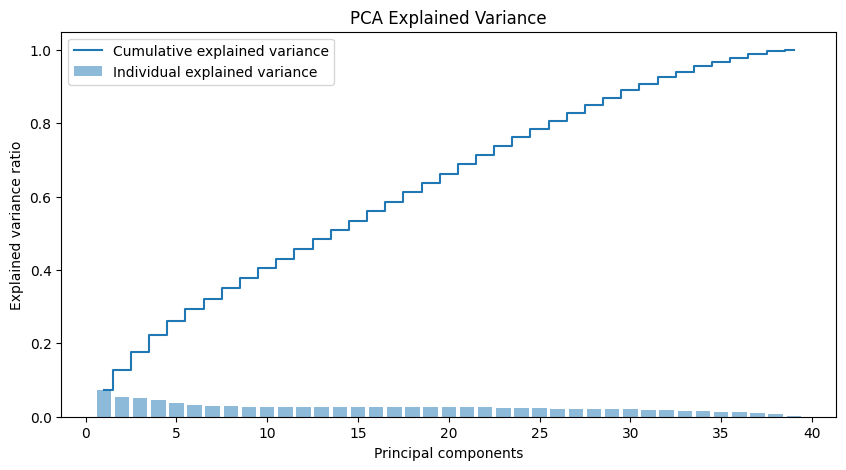

Explained variance ratio: [0.07219915 0.05438194 0.05080146 0.04634996 0.03780604 0.03179072
 0.02838474 0.02801899 0.02743058 0.02722932 0.02683286 0.0262531
 0.02593654 0.02577848 0.02569701 0.02566359 0.02563938 0.0255921
 0.02554853 0.02543336 0.02531271 0.0251728  0.02465573 0.02427654
 0.02293696 0.02226302 0.02150873 0.02066629 0.0203574  0.01995694
 0.01840769 0.01698551 0.01575459 0.01446261 0.01261099 0.01154977
 0.01074514 0.00653454 0.00307421]
19
                                   PC1       PC2       PC3       PC4  \
encounter_id              6.690729e-04  0.079494 -0.449810  0.258112   
patient_nbr              -1.930002e-03  0.116049 -0.665857  0.452055   
race                     -6.928522e-03  0.012342 -0.058652 -0.017142   
gender                    6.851438e-03  0.007121  0.005525  0.028037   
age                      -2.566803e-02 -0.091772 -0.277085 -0.561169   
admission_type_id        -2.702422e-02  0.116069 -0.024707 -0.072919   
discharge_disposition_id  2.0004

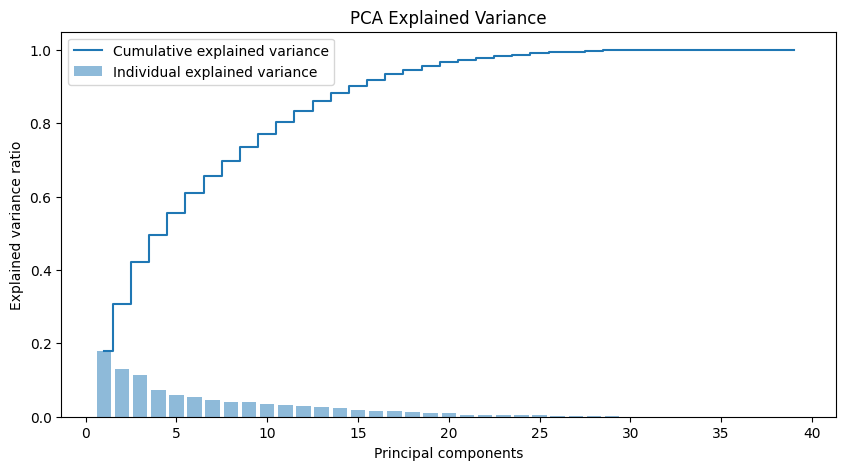

Explained variance ratio: [1.79631905e-01 1.28988353e-01 1.14336721e-01 7.17238363e-02
 6.04470632e-02 5.49491234e-02 4.62299046e-02 4.11388228e-02
 3.93635765e-02 3.55907463e-02 3.22367923e-02 3.04796830e-02
 2.61794847e-02 2.26661517e-02 1.80345373e-02 1.62008900e-02
 1.52685968e-02 1.21878721e-02 1.13706568e-02 1.08413920e-02
 5.85961186e-03 4.70528724e-03 4.66288866e-03 4.26604114e-03
 3.75610257e-03 2.60736767e-03 2.30902966e-03 1.77236938e-03
 1.01626220e-03 5.40039764e-04 2.40757257e-04 2.23489301e-04
 1.04496019e-04 3.09663943e-05 1.77794962e-05 1.28354825e-05
 7.29708257e-06 9.51934145e-07 3.17785583e-07]


In [ ]:
transformed_data_min_max = pca_(diabetic_data_df_minmax)
transformed_data_standard = pca_(diabetic_data_df_standard)
transformed_data_robust = pca_(diabetic_data_df_robust)

### Question 2:

When we perform Principal Component Analysis (PCA), the algorithm doesn’t select features in the traditional sense. Instead, it creates new variables called principal components (PCs), which are linear combinations of the original features. These principal components are ordered by the amount of variance they capture from the data.

The portion of the dataset we retain during dimensionality reduction is determined by the number of components we choose to keep. This is often based on the cumulative explained variance ratio. For example, if we retain components that together explain 95% of the variance, we’re essentially reducing the dimensionality of wer data while still retaining most of the information.

The rationale behind choosing the number of components often involves a trade-off between computational efficiency and information retention. By reducing the number of features, we simplify the model, which can lead to faster computation and less noise. However, we want to retain enough features to capture the essential patterns in the data.

In out code, we determined the number of components to keep by finding the smallest number of components that explain at least 95% of the variance.

This decision ensures that we’re keeping the most informative parts of wer data while discarding the rest, which may be considered noise or less informative. It’s a common approach to balance between dimensionality reduction and information loss.

In [ ]:
# Get the loadings
pca = PCA()


## Part 3 - Unsupervised Learning

In [ ]:
def find_k_value(data):
    sse = []
    list_k = list(range(2, 30))

    for k in list_k:
        km = KMeans(n_clusters=k, random_state=22)
        km.fit(data)

        sse.append(km.inertia_)

    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse)
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

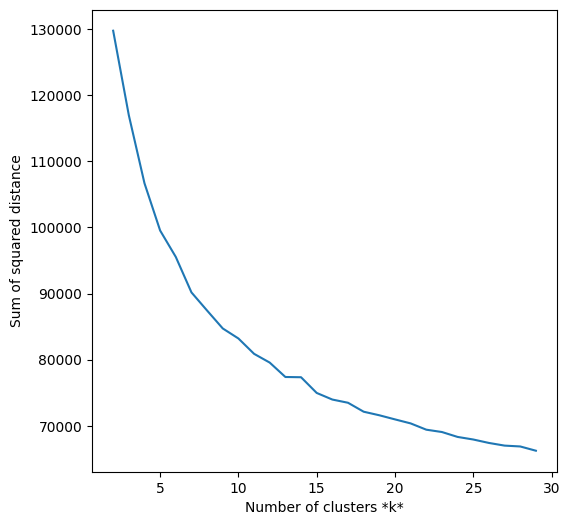

In [ ]:
find_k_value(transformed_data_min_max)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

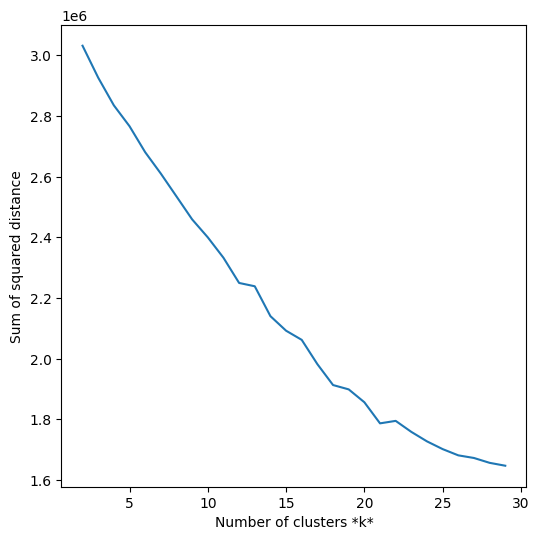

In [ ]:
find_k_value(transformed_data_standard)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

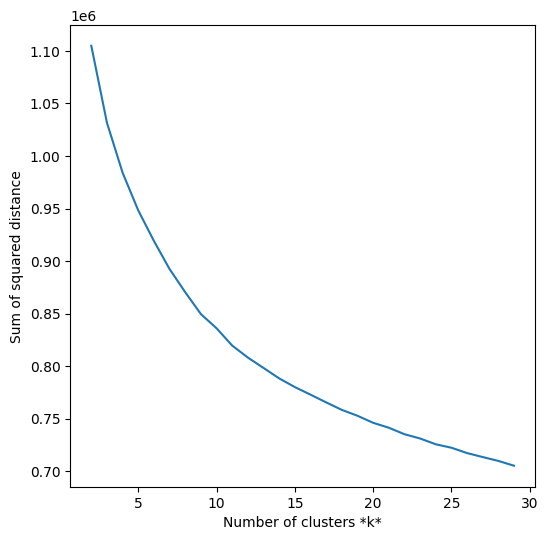

In [ ]:
find_k_value(transformed_data_robust)

In [ ]:
transformed_data_robust

array([[-1.69797826e+00, -1.22748673e+00,  2.59745928e-01, ...,
         8.12401624e-01, -2.52749292e-01,  3.91057800e-03],
       [-1.14405087e+00,  1.63749591e-03, -1.07058095e+00, ...,
        -2.89607210e-01, -8.69484274e-01, -6.28024359e-01],
       [-1.22121982e+00,  5.58806937e-01,  1.50715843e+00, ...,
        -9.82549207e-02, -7.86830651e-01, -1.28035075e+00],
       ...,
       [-7.86941650e-01,  8.41721711e-01, -2.78808147e-01, ...,
        -1.19612061e+00, -2.70775466e-01,  1.26605693e+00],
       [ 5.67554189e-01,  2.95457374e-01, -3.92819107e-01, ...,
         3.06214858e-01, -1.09571430e-01,  1.14316822e+00],
       [-9.09463859e-01, -7.79129703e-01,  8.47555793e-01, ...,
        -3.64694885e-01,  2.14901953e-01, -1.57955961e-01]])

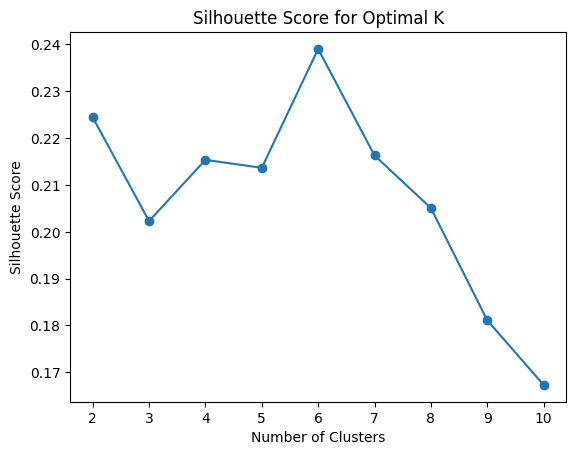

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(transformed_data_min_max)
    silhouette_avg = silhouette_score(transformed_data_min_max, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [ ]:
k = 6
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(transformed_data_min_max)
reduced_cluster_assignments = kmeans_model.labels_

In [ ]:
plt.scatter(transformed_data_min_max['PC1'], transformed_data_min_max['PC2'], c=reduced_cluster_assignments)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters Reduced Kmeans')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
silhouette_score(transformed_data_min_max, reduced_cluster_assignments)

0.23905032601049964

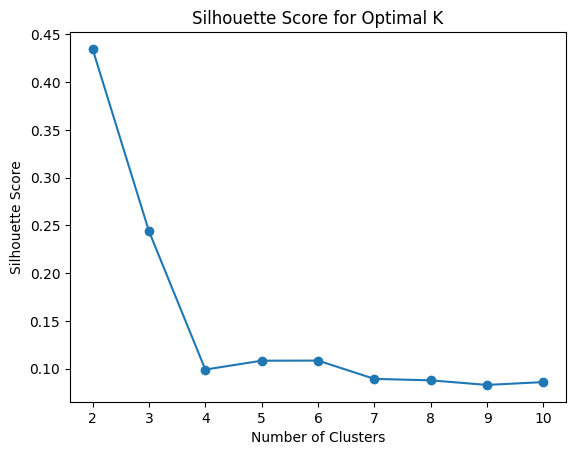

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(transformed_data_robust)
    silhouette_avg = silhouette_score(transformed_data_robust, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [ ]:
k = 2
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(transformed_data_robust)
reduced_cluster_assignments = kmeans_model.labels_

In [ ]:
silhouette_score(transformed_data_robust, reduced_cluster_assignments)

0.4348780556963814

Below we deleted the columns that had more than 99% 'No' . and we chose minimax normalization here(note that we reduced the impact of outliers)

Parameters: {'eps': 0.07, 'min_samples': 2} Silhouette Score: 0.06685498343736192
yess
yess
yess
yess
yess
Parameters: {'eps': 0.7, 'min_samples': 2} Silhouette Score: -0.4861839229069197
Parameters: {'eps': 0.7, 'min_samples': 5} Silhouette Score: -0.2290212564034636
Parameters: {'eps': 0.7, 'min_samples': 10} Silhouette Score: 0.0321838214031315
Parameters: {'eps': 0.7, 'min_samples': 20} Silhouette Score: 0.04691671419079143
yess
yess
Parameters: {'eps': 1, 'min_samples': 2} Silhouette Score: -0.5071846778873321
Parameters: {'eps': 1, 'min_samples': 5} Silhouette Score: -0.4006509434384202
Parameters: {'eps': 1, 'min_samples': 10} Silhouette Score: -0.2877667279561412
Parameters: {'eps': 1, 'min_samples': 20} Silhouette Score: -0.22738100063893354
Parameters: {'eps': 1, 'min_samples': 30} Silhouette Score: 0.025589802563138666
yess


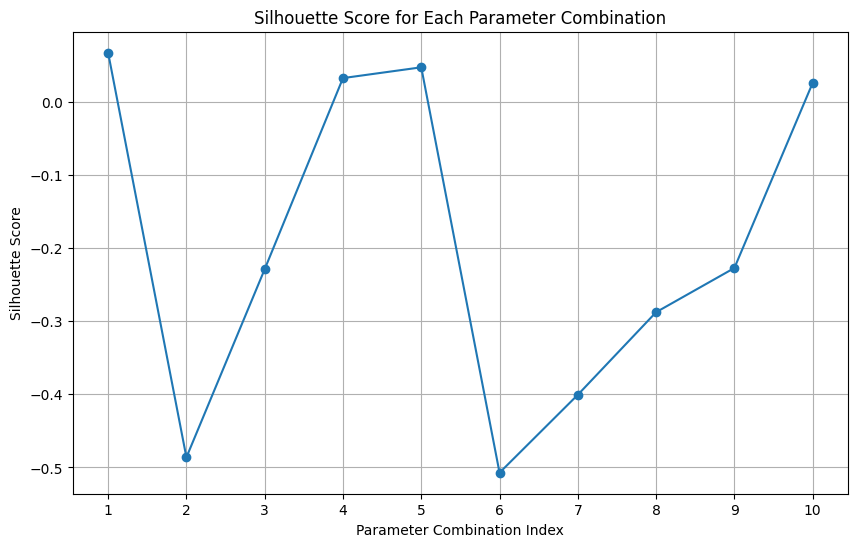

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

param_grid = {
    'eps': [0.07 , 0.7, 1 ],
    'min_samples': [ 2, 5, 10 , 20, 30, 40 ]
}

best_score = -1
best_params = None


silhouette_scores = []

# Loop through each parameter combination
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    cluster_labels = dbscan.fit_predict(transformed_data_robust)

    if len(np.unique(cluster_labels)) <= 1:
        print('yess')
        continue

    silhouette_avg = silhouette_score(transformed_data_robust, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print("Parameters:", params, "Silhouette Score:", silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Parameter Combination')
plt.xticks(range(len(silhouette_scores)), range(1, len(silhouette_scores) + 1))
plt.grid(True)
plt.show()

In [ ]:
db = DBSCAN(eps=0.07,               # The maximum distance between two samples for them to be considered as in the same neighborhood
            min_samples=2,         # The number of samples in a neighborhood for a point to be considered as a core point
            metric='euclidean',    # The metric to use when calculating distance between instances in a feature array
            metric_params=None,    # Additional keyword arguments for the metric function
            algorithm='auto',      # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
            leaf_size=30,          # Leaf size passed to BallTree or cKDTree
            p=None,                # The power of the Minkowski metric to be used to calculate distance between points
            n_jobs=None)           # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors


db.fit(transformed_data_robust)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 101761


2
3
4
5
6
7
8
9
10


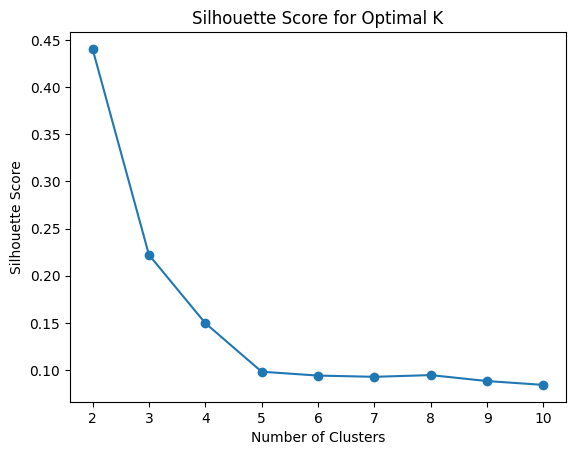

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(transformed_data_robust)
    silhouette_avg = silhouette_score(transformed_data_robust, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(k)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [ ]:
k = 2
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(transformed_data_robust)
reduced_cluster_assignments = kmeans_model.labels_

In [ ]:
silhouette_score(transformed_data_robust, reduced_cluster_assignments)

0.4404805890850886

In [ ]:
db = DBSCAN(eps=0.03,               # The maximum distance between two samples for them to be considered as in the same neighborhood
            min_samples=2,         # The number of samples in a neighborhood for a point to be considered as a core point
            metric='euclidean',    # The metric to use when calculating distance between instances in a feature array
            metric_params=None,    # Additional keyword arguments for the metric function
            algorithm='auto',      # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
            leaf_size=30,          # Leaf size passed to BallTree or cKDTree
            p=None,                # The power of the Minkowski metric to be used to calculate distance between points
            n_jobs=None)           # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors


db.fit(transformed_data_robust)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 101763


### Question 3:

Here we plot the coefficients without eliminating columns with high amount of 'No' and without eliminating outliers

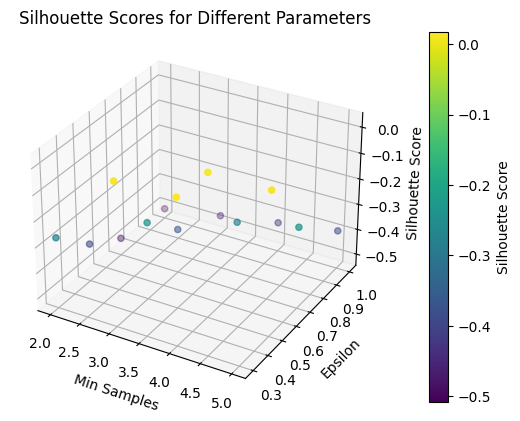

In [ ]:
eps_values = [0.3, 0.5, 0.7, 1]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of parameters and scores


# Unpack the data
min_samples, epsilons, scores = zip(*silhouette_scores_dbscan)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(min_samples, epsilons, scores, c=scores, cmap='viridis', marker='o')

# Add color bar which maps values to colors
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Silhouette Score')

# Labels for the axes
ax.set_xlabel('Min Samples')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Silhouette Score')

# Title
plt.title('Silhouette Scores for Different Parameters')

# Show plot
plt.show()


In [ ]:
def kmeans_plot(silhouette_scores):
    range_n_clusters = list(range(2,11))
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.title('Silhouette Coefficient for KMeans Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)
    plt.savefig('kmeans_silhouette.png')
    plt.show()

In [ ]:
def dbscan_plot(silhouette_scores_dbscan):
    eps_values = [0.3, 0.5, 0.7, 1]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of parameters and scores


# Unpack the data
min_samples, epsilons, scores = zip(*silhouette_scores_dbscan)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(min_samples, epsilons, scores, c=scores, cmap='viridis', marker='o')

# Add color bar which maps values to colors
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Silhouette Score')

# Labels for the axes
ax.set_xlabel('Min Samples')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Silhouette Score')

# Title
plt.title('Silhouette Scores for Different Parameters')

# Show plot
plt.show()


Below we deleted the columns that had more than 99% 'No' . and we chose minimax normalization here(note that we reduced the impact of outliers)

In [ ]:
kmeans_plot(silhouette_scores)
dbscan_plot(silhouette_scores_dbscan)

### Save to csv

In [ ]:
results = {
    'encounter_id':diabetic_data_df['encounter_id'],
    'kmean_label':kmeans_response,
    'dbscan_label':dbscan_response
}
results_df = pd.DataFrame(results)
results_df.to_csv('output.csv')


## Questions

### Question 4:
**Elbow Method:**

Plot the sum of squared distances of samples to their closest cluster center for different numbers of clusters (k).
Look for the “elbow” point where the rate of decrease sharply changes, indicating that additional clusters do not significantly improve the fit.

**Silhouette Score:**
Calculate the silhouette score for different numbers of clusters.
The silhouette score measures how similar an object is to its own cluster compared to other clusters.
The optimal number of clusters is the one with the highest average silhouette score.

**Gap Statistic:**
Compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.
The optimal number of clusters is the value of k at which the gap statistic is maximized.

**Davies-Bouldin Index:**
The Davies-Bouldin index is a metric for evaluating clustering algorithms.
It is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The optimal number of clusters is the one that minimizes the Davies-Bouldin index.

**Calinski-Harabasz Index:**
Also known as the Variance Ratio Criterion.
It is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters.
The optimal number of clusters is the one that maximizes the Calinski-Harabasz index.

### Question 5:

**minPts:** A common rule of thumb is to set minPts at least as large as the dimensionality of the data, D. So, minPts should be greater than or equal to D+1. For 2D data, minPts = 4 is a good starting point. For larger datasets with noise, you might consider minPts = 2 * D.

**Epsilon (ε):** To find the optimal ε, you can use the k-distance graph method. Here’s how you can do it:
For each point, compute the distance to its kth nearest neighbor, where k = minPts - 1.
Sort these distances in ascending order.
Plot these distances on the Y-axis against the point index on the X-axis.
Look for the “elbow” or “knee” in the plot, which indicates a sharp change in the distance values.
The ε value corresponding to the “elbow” is considered to be the optimal choice


### Question 6:

K-Means is best used when:

You have a large dataset and need to find a simple structure.

The clusters are roughly spherical and evenly sized.

You can specify the number of clusters (K) in advance.

The scale of measurement for all features is similar, so that the Euclidean distance is meaningful.

K-Means works by assigning data points to the nearest cluster centroid, and then moving the centroid to the mean of the points in that cluster. This process repeats until the centroids no longer move significantly.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is more suitable when:

The dataset has noise (outliers) and you want to identify and exclude them.

Clusters are of arbitrary shape and not necessarily evenly distributed.

You do not know the number of clusters in advance.

The data has a density-based structure.